# Shell (In)Direct from the Source Challenge 

#### (Supervised Classification - Statistical Methods)
#### Date: July, 2022
#### Authors: Anuola Osinaike

## Citation
The dataset used in this notebook was made publicly available by Xeek for the Shell (In)Direct from the Source Challenge. You can find more information about the challenge and download the dataset here https://xeek.ai/challenges/in-direct-from-the-source/overview

## Background Information

### Geologic Background

![](Pluto-cross-section.png)


The Pluto Basin is a typical continental margin.  There are three main megasequences, each with potential source rocks:
1. Paleozoic Foreland Basin - oil from this sequence 1 is typed to a Kerogen `Type 1 Ordovician` source rock.
2. Rift - Rifting took place in two stages: 2a and 2b.  Few wells have penetrated this section, so source rock presence is unknown.  However, the conjugate basin to Pluto (i.e., the matching basin on the other side of the ocean) has a Kerogen `Type I Lacustrine` source rock.
3. Passive Margin - The passive margin phase has two potential source rocks.  The base of this megasequence is timed with a global anoxia event generating a Kerogen `Type II Marine` source rock.  Also, the sequence contains numerous coal-rich intervals capable of being `Type III Deltaic` source rocks.

The above is a bit of geological fun.  The main point is that there are four different oils families in the basin that need to be identified.  To learn more about source rocks, kerogen types, and oil generation, here's a place to start

https://wiki.aapg.org/Petroleum_source_rocks


### Notes from the Geochemist
The last Geochemist to work in the Pluto Basin has provided some helpful information to get started.

* An internal report `global_ranges_oil_families.csv`  contains the ranges for different oil families.  This report can be used to build a model for identifying oil families from the Pluto Basin.
* A basin model for the Pluto Basin has shown where the oil kitchens are for the Lacustrine and Marine source rocks.  A source rock kitchen is an area where the source rock is present and in the oil generation window.  There is a central gap in the Lacustrine kitchen because the source rock is deeply buried here and is likely gas mature.  This map will be helpful to assess the accuracy of the model.
* Oil migration in the basin is assumed to be vertical out of the kitchen.  However, some incised valleys in the NE portion of the basin (black arrows on kitchens map) could cause oil to migrate updip.
* Over the decades, three different labs processed oil samples from the Pluto Basin (see Lab column).  Each lab had slightly different standards, so the scaling is different for each lab.  The shape of the chromatograph is what matters, not its absolute value.
* Some common data errors include anomalously high values at variable 21 (oil-based drilling mud contamination) and errors in data collection that show up as 0's.!

![](Pluto-kitchen-labels.png)

## Contents

__1. Data Loading__

__2. Data Exploration__
> 2.1 Data Inspection
>> 2.1.1 Descriptive Statistics<br>
>> 2.1.2 Missing Values<br>
>> 2.1.3 Data Count

> 2.2 Data Visualization
>> 2.2.1 Base Map<br>
>> 2.2.2 Cross Section

> 2.3 Data Distribution
>> 2.3.1 Violin Plot<br>
>> 2.3.2 Histogram Plot<br>
>> 2.3.3 Scatter Plot<br>
>> 2.3.4 Chromatograph Plot

__3. Data Preprocessing__
> 3.1 Outlier Detection
>> 3.1.1 Supervised (Statistical) Anomaly Detection<br>
>> 3.1.2 Unsupervised (Machine Learning) Anomaly Detection<br>
>> 3.1.3 Inlier Inspection
>>> 3.1.3.1 Count Plot<br>
>>> 3.1.3.2 Violin Plot<br>
>>> 3.1.3.3 Histogram Plot<br>
>>> 3.1.3.4 Scatter Plot<br>
>>> 3.1.3.5 Chromatograph Plot

> 3.2 Missing Data
>> 3.2.1 Missing Indicator<br>
>> 3.2.2 Data Imputation

> 3.3 Synthetic Sampling

__4. Feature Engineering__
> 4.1 Min-Max Normalization<br>
> 4.2 Covariance Estimation

__5. Dimensionality Reduction__
> 5.1 t-distributed Stochastic Neighbor Embedding (t-SNE)

__6. Supervised Classification__
> 6.1 Model Selection and Evaluation
>> 6.1.1 Cross-Validation and Hyper-Parameterization
>>> 6.1.1.1 Model Training<br>
>>> 6.1.1.2 Model Prediction

>> 6.1.2 Metrics and Scoring
>>> 6.1.2.1 Confusion Matrix<br>
>>> 6.1.2.2 Metric Score<br>
>>> 6.1.2.3 Receiver Operating Characteristic (ROC) Curve

>> 6.1.3 Validation Curves
>>> 6.1.3.1 Learning Curve

> 6.2 Model Inspection and Visualization
>> 6.2.1 Inspection Plots
>>> 6.2.1.1 Count Plot<br>
>>> 6.2.1.2 Class Plot<br>
>>> 6.2.1.3 Embedding Plot

>> 6.2.2 Feature Importance
>>> 6.2.2.1 Permutation Feature Importance (PFI)

__7. Test Submission__
> 7.1 Model Prediction<br>
> 7.2 Inpection Plots
>> 7.2.1 Count Plot<br>
>> 7.2.2 Class Plot<br>
>> 7.2.3 Embedding Plot

> 7.3 Final Vote

## 1. Data Loading

```python
# install dependencies
pip install pandas==1.2.4
pip install numpy==1.22.4
pip install seaborn==0.11.1
pip install matplotlib==3.5.2
pip install scikit-learn==1.1.2
pip install threadpoolctl==3.1.0
pip install xgboost==1.5.0
pip install lightgbm==3.3.1
```

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier as HGBClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [3]:
# import the data to a dataframe and index by sample
source = pd.read_csv('InDirect_From_Source_Geochemistry_Samples.csv', index_col=0)
source.head()

Lab    y    x          19          20           21          22  \
Sample                                                                     
0       Lab_2  380  590   20.763486   13.947363     1.952259   16.486101   
1       Lab_1  140  470  118.643361  130.716833  1152.234830    0.000000   
2       Lab_1  350  440  123.998274  119.186570     0.000000  157.329488   
3       Lab_2  790  160   13.753847   18.599869  1555.472651    9.205427   
4       Lab_3  240  600   22.143712   20.548714     5.660628   21.590330   

              23         24          25          26         27          28  \
Sample                                                                       
0       0.000000   4.700927    0.000000   22.170079   9.838302    0.000000   
1       0.000000  97.190520  183.275260  172.616987  74.513555  227.625892   
2       9.416534  66.115133  116.153357  141.570068   0.000000  195.406313   
3       7.676030  23.369460   18.861401    0.000000   6.889721   18.959263   
4       7.199149  16.221228   28.281983   24.309612   7.921879   31.266928   

               29         30         31          32         OL         GA  
Sample                                                                     
0        9.655032   4.117457   1.156801   25.926844   6.734488   4.471749  
1       85.241758  23.851172   0.000000  200.715642  75.290342   0.000000  
2       51.625043  19.935382  57.203727    0.000000  42.262010  33.352354  
3        6.308057   8.018402   0.000000   18.181328   5.072130  15.635603  
4       15.366561   6.013449   5.000000   25.824537  17.897014   7.305632

In [4]:
# replace nan id
source =  source.replace(0.0, np.nan)
source.head()

Lab    y    x          19          20           21          22  \
Sample                                                                     
0       Lab_2  380  590   20.763486   13.947363     1.952259   16.486101   
1       Lab_1  140  470  118.643361  130.716833  1152.234830         NaN   
2       Lab_1  350  440  123.998274  119.186570          NaN  157.329488   
3       Lab_2  790  160   13.753847   18.599869  1555.472651    9.205427   
4       Lab_3  240  600   22.143712   20.548714     5.660628   21.590330   

              23         24          25          26         27          28  \
Sample                                                                       
0            NaN   4.700927         NaN   22.170079   9.838302         NaN   
1            NaN  97.190520  183.275260  172.616987  74.513555  227.625892   
2       9.416534  66.115133  116.153357  141.570068        NaN  195.406313   
3       7.676030  23.369460   18.861401         NaN   6.889721   18.959263   
4       7.199149  16.221228   28.281983   24.309612   7.921879   31.266928   

               29         30         31          32         OL         GA  
Sample                                                                     
0        9.655032   4.117457   1.156801   25.926844   6.734488   4.471749  
1       85.241758  23.851172        NaN  200.715642  75.290342        NaN  
2       51.625043  19.935382  57.203727         NaN  42.262010  33.352354  
3        6.308057   8.018402        NaN   18.181328   5.072130  15.635603  
4       15.366561   6.013449   5.000000   25.824537  17.897014   7.305632

## 2. Data Exploration

### 2.1 Data Inspection

In [5]:
from matplotlib.colors import ListedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable

#### 2.1.1 Descriptive Statistics

In [6]:
# view descriptive statistics
source.describe()

y           x          19          20           21  \
count   80.000000   80.000000   73.000000   70.000000    64.000000   
mean   400.250000  369.625000   59.172763   60.534922   359.704485   
std    226.184505  219.426432   65.305606   63.400870   623.890685   
min     20.000000   40.000000   10.070223   12.842598     0.452926   
25%    195.000000  197.500000   16.132016   15.896220     5.495471   
50%    375.000000  330.000000   20.763486   20.413635    25.913815   
75%    572.500000  552.500000  100.415237  127.834267   253.040279   
max    790.000000  790.000000  276.742729  204.535055  1963.937864   

               22          23          24          25          26          27  \
count   70.000000   57.000000   70.000000   68.000000   66.000000   73.000000   
mean    62.498305   18.771641   45.356282   82.609555   67.538271   33.502170   
std     82.357772   31.095648   62.011142   88.684807   86.775177   42.224229   
min      5.909756    0.390091    4.700927    6.473462    0.528415    1.749578   
25%     14.594317    4.000000    9.918921   20.763105   14.812862    8.588264   
50%     20.297040    9.626391   21.881745   26.364256   21.866284   11.555709   
75%     78.349628   14.106837   66.455227  152.139311   87.989668   49.057109   
max    300.249803  142.603083  305.725491  294.231638  314.820700  210.388790   

               28          29          30          31          32          OL  \
count   71.000000   74.000000   57.000000   63.000000   72.000000   70.000000   
mean    91.609319   34.317879   24.346117   42.146371   87.066985   32.112227   
std    102.162991   39.595615   38.017518   62.426059  104.840779   46.733745   
min      7.906137    3.276433    0.462724    0.298184    7.170598    0.313254   
25%     23.075461    9.404536    6.013449    5.657643   20.635498    7.828627   
50%     29.034525   13.218377   10.559165   17.632250   25.608660   13.671863   
75%    148.917971   49.931351   20.007470   42.317888  119.114729   25.563057   
max    360.174141  163.308784  198.654188  280.562580  381.847757  223.921967   

               GA  
count   71.000000  
mean    28.998132  
std     37.601452  
min      2.506277  
25%      6.743383  
50%     15.827495  
75%     35.988418  
max    197.737442

#### 2.1.2 Missing Values

In [7]:
# create a function for checking for nan values on the features
def nan_bool(data):
    # data: dataframe to inspect

    fig, ax = plt.subplots(figsize=(2, 7))

    nan_bool = pd.DataFrame(data.isna().any(), columns=['NaN'])
    cmap = ListedColormap(['red', 'lime'])

    hm = sns.heatmap(nan_bool, cmap=cmap, linewidths=0.005, linecolor='k', cbar=False)
    cax = make_axes_locatable(ax).append_axes('right', size='50%', pad=0.1)
    vals = [0, 1]
    bounds = [-0.25, 0.5, 1.25]
    im = plt.imshow(nan_bool, cmap=cmap)
    cbar = fig.colorbar(im, ticks=vals, boundaries=bounds, values=vals, ax=ax, cax=cax)
    cbar.ax.set_yticklabels([False, True])
    plt.suptitle(y=0.93, t='NaN Presence', size=18)
    plt.show()

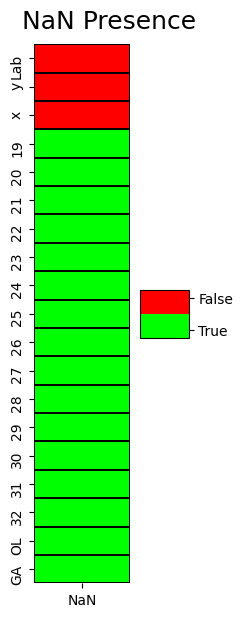

In [8]:
# check for nan values on the features
nan_bool(data=source)

In [9]:
# create a function for checking the count of nan values on the features
def nan_sum(data):
    # data: dataframe to inspect
    
    fig, ax = plt.subplots(figsize=(2, 9))

    nan_sum = pd.DataFrame(data.isna().sum(), columns=['NaN Count'])
    cmap = 'Reds'

    hm = sns.heatmap(nan_sum, cmap=cmap, linewidths=0.005, linecolor='k', annot=True, fmt='g', cbar=True)
    plt.suptitle(y=0.93, t='NaN Count', size=18)
    plt.show()

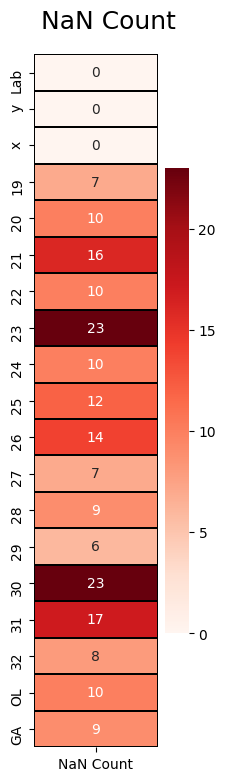

In [10]:
# check the count of nan values on the features
nan_sum(data=source)

#### 2.1.3 Data Count

In [11]:
# obtain the feature count for each lab
feat_count = [[] for i in range(len(source.Lab.unique()))]
for i, idx in enumerate(source.Lab.unique()):
    for col in source.iloc[:, 3:].columns:
        if source.set_index('Lab').loc[idx, col].notnull().any() == True:
            feat_count[i].append(col)

feat_count_df = pd.DataFrame(([len(i) for i in feat_count]), index=source.Lab.unique(), columns=['Feature_Count'])
feat_count_df = feat_count_df.sort_values(by='Feature_Count', ascending=False)
feat_count_df.head()

Feature_Count
Lab_2             16
Lab_1             16
Lab_3             16

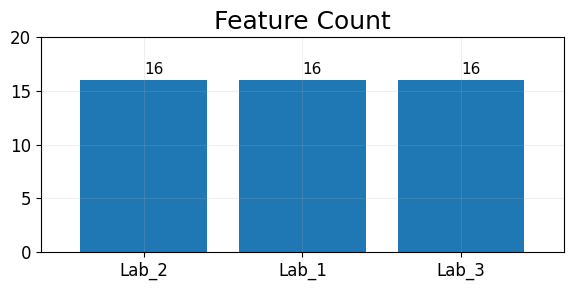

In [12]:
# plot the feature counts
fig, ax = plt.subplots()
feat_count_df.plot(kind='bar', ax=ax, figsize=(6, 3), align='center', fontsize=12, width=0.8, legend=False)

for j, k in enumerate([int(feat_count_df.values[n]) for n in range(len(feat_count_df.values))]):
    ax.text(j, k+1, k, va='center', size=11)
        
ax.set_xticklabels(ax.get_xticklabels(), rotation='0')
ax.set_ylim([0, 20])
ax.set_title('Feature Count', size=18)
ax.grid(alpha=0.2)
plt.tight_layout()

### 2.2 Data Visualization

In [13]:
import matplotlib.image as mpimg

#### 2.2.1 Base Map

In [14]:
# load map
kitchens = mpimg.imread('Pluto-kitchen-labels.png')

In [15]:
# create a function for plotting the basemap with overlayed categorical properties
def base_map(image, data, categories):
    # image: base map
    # data: dataframe containing x and y coordinates of categorical points
    # categories: categorical data to be visualized

    # show map
    fig = plt.figure(figsize=(7, 7))
    plt.imshow(image)
    plt.xlabel('X', size=12)
    plt.ylabel('Y', size=12)
    plt.title('Source Kitchens and Sample Locations', size=18)

    # plot sample locations
    sns.scatterplot(x='x', y='y', hue=categories.values.ravel(), s=70, data=data)
    plt.grid(False)
    plt.legend(loc='lower left')
    plt.tight_layout()

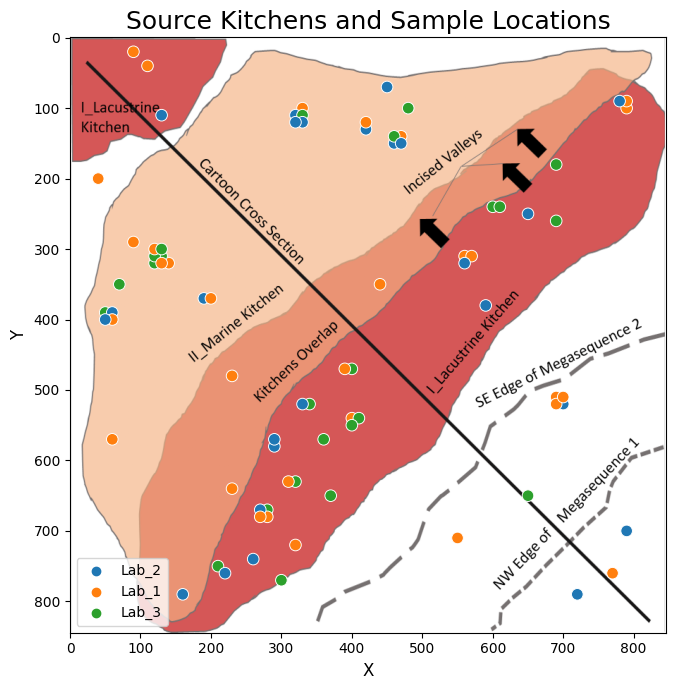

In [16]:
# plot the basemap with sample locations per lab
base_map(image=kitchens, data=source, categories=source.Lab)

#### 2.2.2 Cross Section

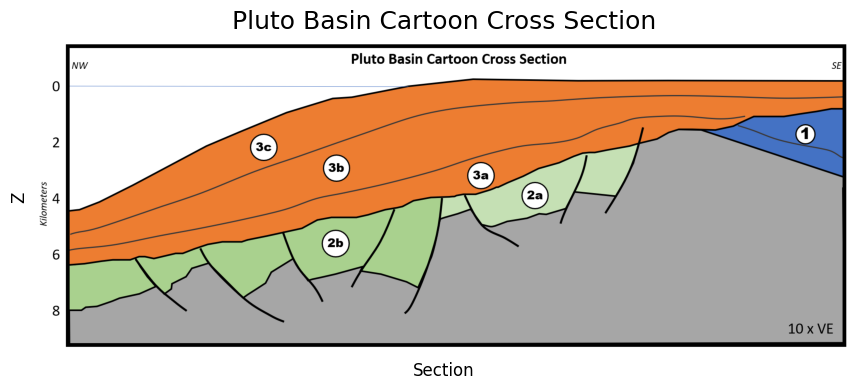

In [17]:
# plot the crosssection of the source kitchens
# load section
basin = mpimg.imread('Pluto-cross-section.png')

# show section
fig = plt.figure(figsize=(13, 4))
plt.imshow(basin)
plt.xlabel('Section', size=12)
plt.ylabel('Z', size=12)
plt.title('Pluto Basin Cartoon Cross Section', size=18)
plt.tick_params(axis='x', bottom=False, top=False, labelbottom=False)
plt.tick_params(axis='y', left=False, right=False, labelleft=False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.grid(False)
plt.tight_layout()

### 2.3 Data Distribution

In [18]:
from matplotlib import cm
from matplotlib import colors

In [19]:
# slice the data to the hydrocarbon peaks
source_peaks = source.copy()
source_peaks = source_peaks.iloc[:, 3:]

#### 2.3.1 Violin Plot

In [20]:
# create a function for plotting the violin plot to inspect the data spread and centers
def violin_plot(data, categories):
    # data: dataframe to be plotted
    # categories: categorical data to be visualized
    
    data_wide = pd.concat([data, categories], axis=1)
    data_long = data_wide.melt(id_vars=categories.name, value_vars=data.columns)
    
    colors = cm.get_cmap('tab10').colors + cm.get_cmap('Dark2').colors
    
    fg = sns.catplot(kind='violin', data=data_long, 
                     x='variable', y='value', 
                     row=categories.name, scale='count', 
                     height=3, aspect=4.25, 
                     sharex=False, sharey=True, 
                     palette=colors)
    
    for i, ax in enumerate(fg.fig.axes):
        ax.set_xlabel('Hydrocarbon Peaks', size=12)
        ax.set_ylabel('Relative Abundance', size=12)
        ax.set_title(ax.get_title(), size=14)
        ax.spines['right'].set_visible(True)
        ax.spines['top'].set_visible(True)
        ax.spines['left'].set_visible(True)
        ax.spines['bottom'].set_visible(True)
        ax.grid(alpha=0.2)

    #for text in fg.legend.get_texts():
        #text.set_fontsize(12)
    #fg.legend.get_title().set_fontsize(14)
    #plt.setp(fg.legend.get_texts(), fontsize=12)
    #plt.setp(fg.legend.get_title(), fontsize=14)
    fg.fig.text(0.5, 1.02, 'Hydrocarbon Peaks Violin Plot', ha='center', va='center', size=18)
    fg.tight_layout(h_pad=1.5)

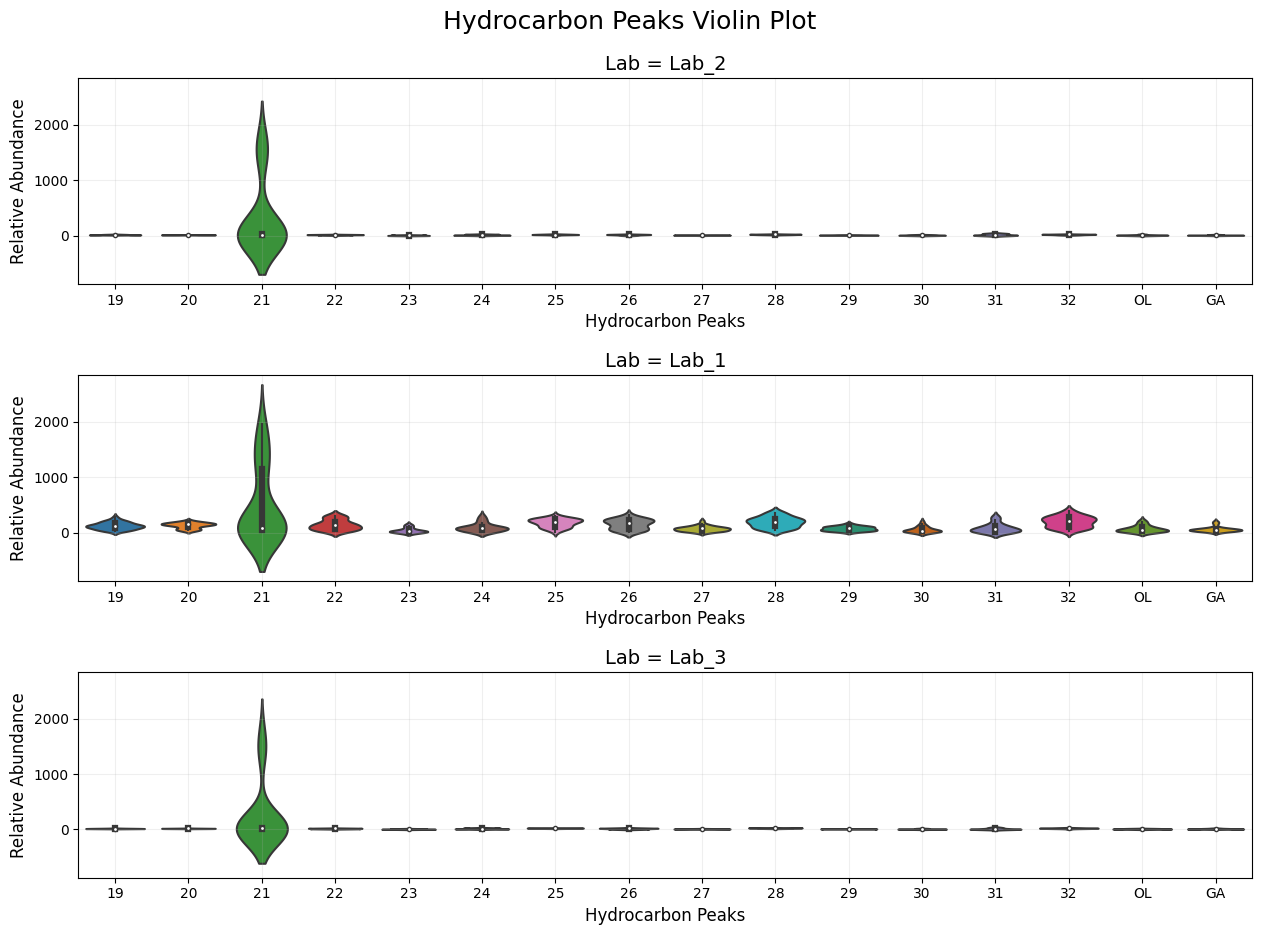

In [21]:
# plot the violin plot
violin_plot(data=source_peaks, categories=source.Lab)

From observation of the violin plot, outliers are present on Peak 21. 

The outliers have a relative abundance of over 1000. 

While inliers range between 0 and 500.

#### 2.3.2 Histogram Plot

In [22]:
# create a function for plotting the histogram plot to inspect the frequency distribution and trend
def histogram_plot(data, categories, scale):
    # data: dataframe to be plotted
    # categories: categorical data to be visualized
    # scale: type of scale to use on the x-axis (one of 'log' or 'linear')
    
    data_wide = pd.concat([data, categories], axis=1)
    data_long = data_wide.melt(id_vars=categories.name, value_vars=data.columns)

    #min_value = np.floor(data.min().min())
    #max_value = np.ceil(data.max().max())

    if scale == 'log':
        fg = sns.displot(kind='hist', data=data_long, 
                         x='value', hue=categories.name, 
                         col='variable', col_wrap=4, 
                         kde=True, bins=25, 
                         height=3, aspect=1, 
                         log_scale=True, facet_kws={'sharex': False})
    elif scale == 'linear':
        fg = sns.displot(kind='hist', data=data_long, 
                         x='value', hue=categories.name, 
                         col='variable', col_wrap=4, 
                         kde=True, bins=25, 
                         height=3, aspect=1, 
                         log_scale=None, facet_kws={'sharex': False})

    for i, ax in enumerate(fg.fig.axes):
        if scale == 'log':
            ax.set_xlabel('Value (Log)', size=12)
        elif scale == 'linear':
            ax.set_xlabel('Value', size=12)
        ax.set_ylabel(ax.get_ylabel(), size=12)
        ax.set_title(ax.get_title(), size=14)
        ax.spines['right'].set_visible(True)
        ax.spines['top'].set_visible(True)
        ax.spines['left'].set_visible(True)
        ax.spines['bottom'].set_visible(True)
        ax.grid(alpha=0.2)

    #for text in fg.legend.get_texts():
        #text.set_fontsize(12)
    #fg.legend.get_title().set_fontsize(14)
    plt.setp(fg.legend.get_texts(), fontsize=12)
    plt.setp(fg.legend.get_title(), fontsize=14)
    fg.fig.text(0.5, 1.02, 'Hydrocarbon Peaks Histogram Plot', ha='center', va='center', size=18)
    fg.tight_layout(h_pad=1.5)

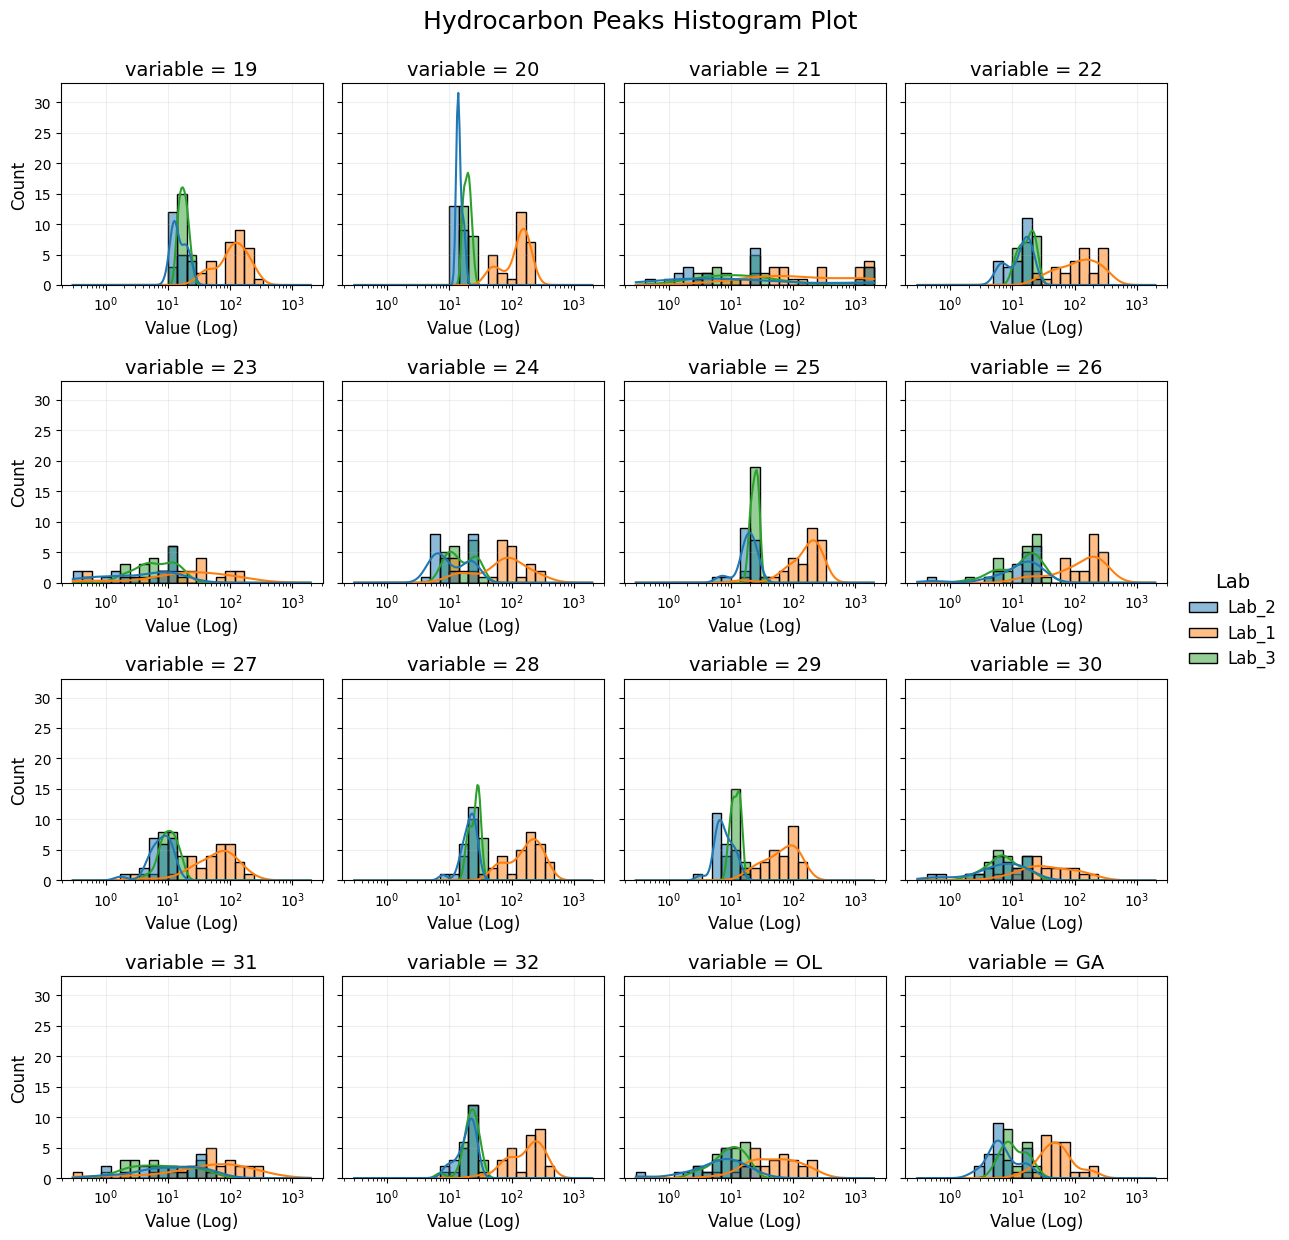

In [23]:
# plot the histogram plot
histogram_plot(data=source_peaks, categories=source.Lab, scale='log')

The histogram plot confirms the presence of a spurious data range on Peak 21.

The outliers have a relative abundance of over 1000. 

While inliers range between 0 and 500.

#### 2.3.3 Scatter Plot

In [24]:
# create a function for plotting the scatter plot to inspect the variables relationship and correlation
def scatter_plot(data, categories):
    # data: dataframe to be plotted
    # categories: categorical data to be visualized
    
    data_wide = pd.concat([data, categories], axis=1)

    markers = ['o', 'p', 'v']

    pg = sns.pairplot(kind='scatter', data=data_wide, 
                      hue=categories.name, vars=data_wide.drop([categories.name], axis=1).columns, 
                      markers=markers, plot_kws={'s': 20}, 
                      corner=True, 
                      height=0.8, aspect=1)

    for i, ax in enumerate(pg.fig.axes):
        ax.set_xlabel(ax.get_xlabel(), size=12)
        ax.set_ylabel(ax.get_ylabel(), size=12)
        ax.spines['right'].set_visible(True)
        ax.spines['top'].set_visible(True)
        ax.spines['left'].set_visible(True)
        ax.spines['bottom'].set_visible(True)
        ax.grid(alpha=0.2)

    #for text in pg.legend.get_texts():
        #text.set_fontsize(12)
    #pg.legend.get_title().set_fontsize(14)
    plt.setp(pg.legend.get_texts(), fontsize=12)
    plt.setp(pg.legend.get_title(), fontsize=14)
    pg.fig.text(0.5, 1.005, 'Hydrocarbon Peaks Scatter Plot', ha='center', va='center', size=18)
    pg.tight_layout()

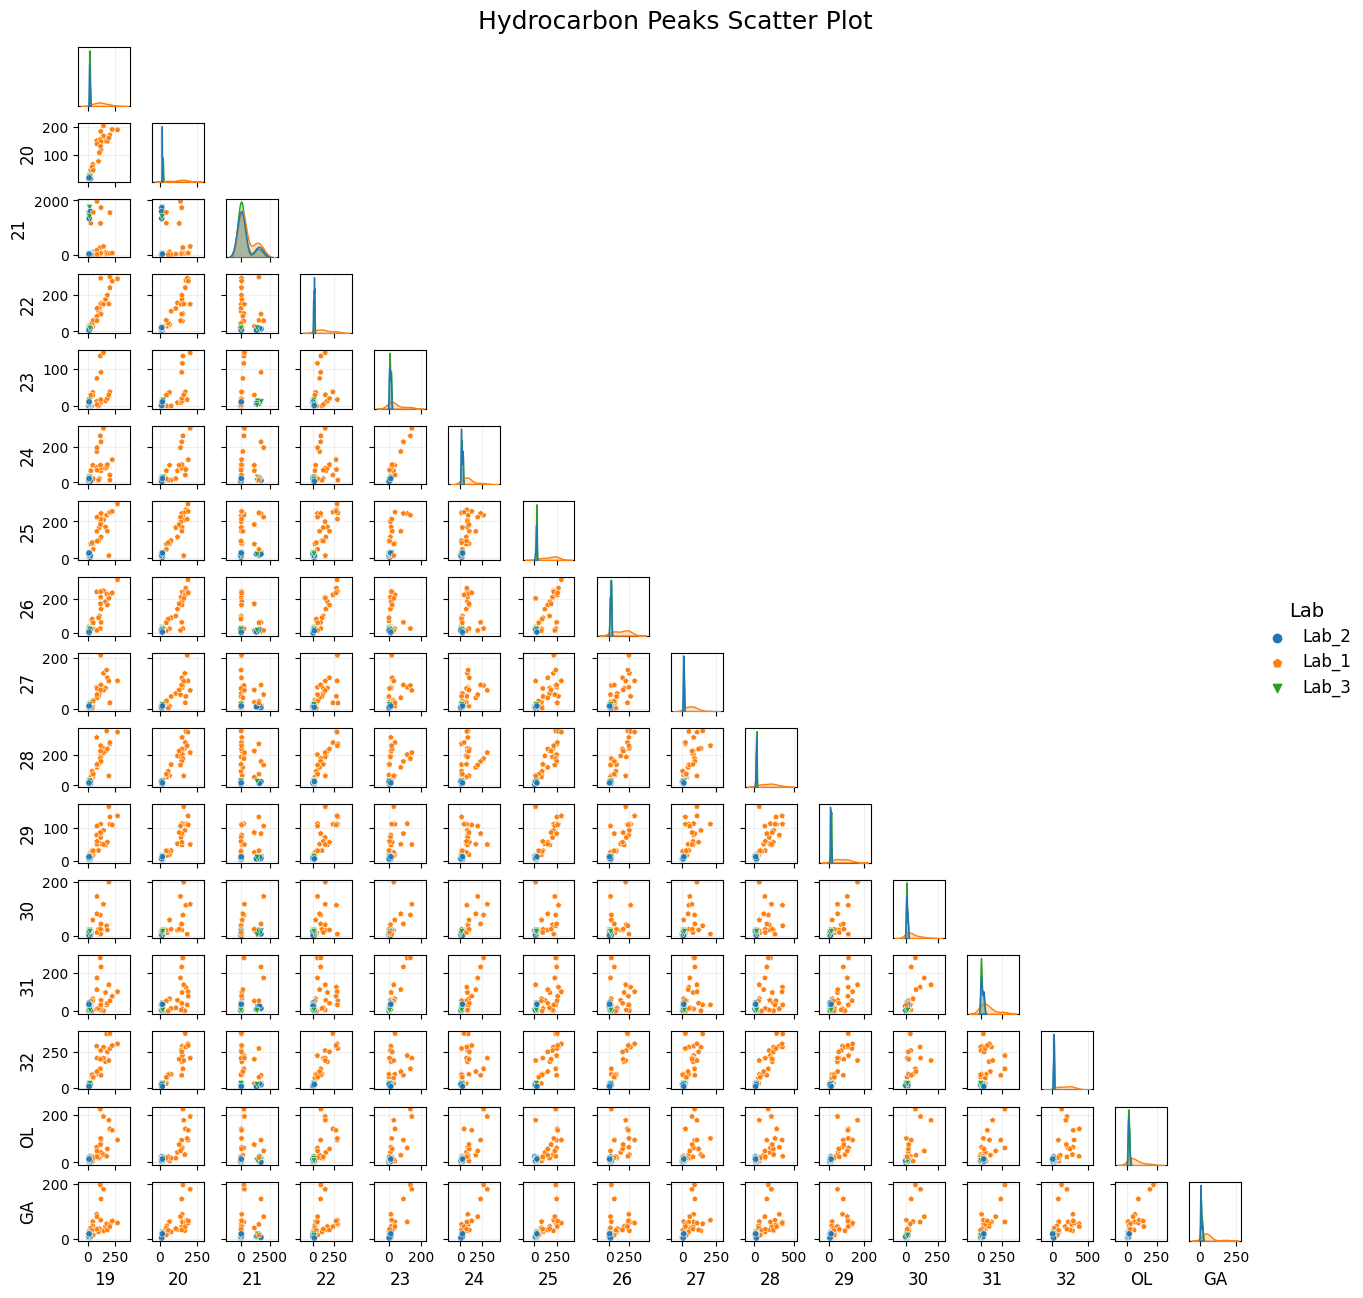

In [25]:
# plot the scatter plot
scatter_plot(data=source_peaks, categories=source.Lab)

Several features show a linear relationship with strong correlation to one another.

Some features show a non-linear relationship and others show only mild correlation.

However, these relationships are only obvious for samples from Lab 1, which are of a larger scale than those from lab 2 or 3.

Outliers with an abnormally high cluster space can be observed on crossplots of Peak 21.

#### 2.3.4 Chromatograph Plot

In [26]:
# create a function for plotting the chromatograph of the first few samples from each lab
def chromatograph_plot(data, categories, n_samples):
    # data: dataframe to be plotted
    # categories: categorical data to be visualized
    # n_samples: number of samples to plot (integer)
    
    data_wide = pd.concat([data, categories], axis=1)
    
    fig = plt.figure(figsize=(13, 4))
    fig.subplots(ncols=len(data_wide.Lab.unique()), sharex=True, sharey=True)

    labs = np.sort(data_wide.Lab.unique())

    for i, ax in enumerate(fig.axes):
        sns.lineplot(data=data_wide[data_wide.Lab==labs[i]].iloc[:n_samples, :-1].T, ax=ax)
        ax.set_xlabel('Hydrocarbon Peaks', size=12)
        ax.set_ylabel('Relative Abundance', size=12)
        ax.set_title(labs[i], size=14)
        ax.grid(alpha=0.2)
        ax.legend(loc='upper right')

    plt.suptitle('Oil Chromatograph Examples', size=18)
    plt.tight_layout()

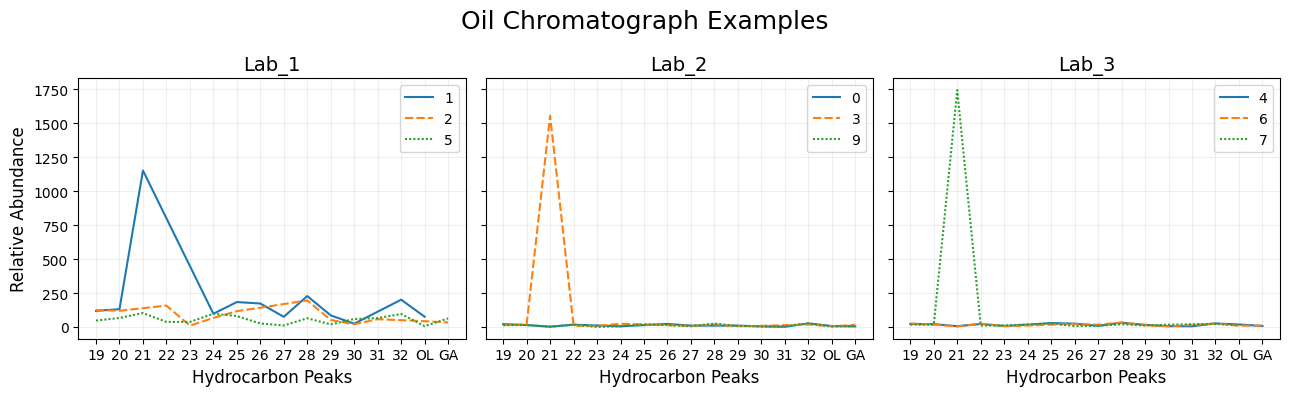

In [27]:
# plot the chromatograph of the first three samples
chromatograph_plot(data=source_peaks, categories=source.Lab, n_samples=3)

For all three labs, Peak 21 appears to be a spurious data point on some of the samples.

## 3. Data Preprocessing

### 3.1 Outlier Detection

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.covariance import EllipticEnvelope
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

In [29]:
# replace nan with a unique value outside the true data range
source_nan = source_peaks.fillna(999, inplace=False)
source_nan.head()

19          20           21          22          23  \
Sample                                                                
0        20.763486   13.947363     1.952259   16.486101  999.000000   
1       118.643361  130.716833  1152.234830  999.000000  999.000000   
2       123.998274  119.186570   999.000000  157.329488    9.416534   
3        13.753847   18.599869  1555.472651    9.205427    7.676030   
4        22.143712   20.548714     5.660628   21.590330    7.199149   

               24          25          26          27          28         29  \
Sample                                                                         
0        4.700927  999.000000   22.170079    9.838302  999.000000   9.655032   
1       97.190520  183.275260  172.616987   74.513555  227.625892  85.241758   
2       66.115133  116.153357  141.570068  999.000000  195.406313  51.625043   
3       23.369460   18.861401  999.000000    6.889721   18.959263   6.308057   
4       16.221228   28.281983   24.309612    7.921879   31.266928  15.366561   

               30          31          32         OL          GA  
Sample                                                            
0        4.117457    1.156801   25.926844   6.734488    4.471749  
1       23.851172  999.000000  200.715642  75.290342  999.000000  
2       19.935382   57.203727  999.000000  42.262010   33.352354  
3        8.018402  999.000000   18.181328   5.072130   15.635603  
4        6.013449    5.000000   25.824537  17.897014    7.305632

The dataframe will be filtered row-wise to eliminate the outliers observed on Peak 21. 

Peak 21 is one of sixteen features.

Hence the fraction of outliers per row is about 0.0625. 

This will inform the choice of contamination level specified for the unsupervised anomaly detection methods.

#### 3.1.1 Supervised (Statistical) Anomaly Detection

In [30]:
# create a function for supervised anomaly detection
def supervised_anomaly(data, method):
    # data: dataframe to filter (row-wise)
    # method: string name of method to use for the anomaly detection 
    # (one of 'Standard Scaling' or 'Robust Scaling')
    
    start_time = time.time()
    
    # Standard Scaling
    if method == 'Standard Scaling':
        print('*******Standard Scaling Anomaly Detection******* \n')
        mask_fit = StandardScaler().fit(data.T.values)
        mask = mask_fit.transform(data.T.values)
        mask = pd.DataFrame(mask.T, 
                            index=data.index, 
                            columns=data.columns)
        X_filt = data[mask.abs()<=3]  # absolute values within 3 standard deviations from the mean
        
    # Robust Scaling
    elif method == 'Robust Scaling':
        print('*******Robust Scaling Anomaly Detection******* \n')
        mask_fit = RobustScaler().fit(data.T.values)
        mask = mask_fit.transform(data.T.values)
        mask = pd.DataFrame(mask.T, 
                            index=data.index, 
                            columns=data.columns)
        X_filt = data[mask.abs()<=2]  # absolute values within 2 interquartiles 
                                      # (1st or 3rd quartile minus or plus half the IQR) from the median
        
    end_time = time.time()
    print(f'Training time: {end_time - start_time} seconds \n')
    
    X_filt = X_filt.set_index([[method]*len(X_filt)])
    
    return X_filt

In [31]:
# Standard Scaling
X_standard = supervised_anomaly(data=source_peaks, method='Standard Scaling')

# Robust Scaling
X_robust = supervised_anomaly(data=source_peaks, method='Robust Scaling')

*******Standard Scaling Anomaly Detection******* 

Training time: 0.0039904117584228516 seconds 

*******Robust Scaling Anomaly Detection******* 

Training time: 0.017949581146240234 seconds 



#### 3.1.2 Unsupervised (Machine Learning) Anomaly Detection

In [32]:
# create a function for unsupervised anomaly detection
def unsupervised_anomaly(data, nan_id, method):
    # data: dataframe to filter (row-wise)
    # nan_id: unique value representing nan
    # method: string name of method to use for the anomaly detection 
    # (one of 'Robust Covariance', 'Local Outlier Factor', 'One-Class SVM', or 'Isolation Forest')
    
    mask_fit = [samp for samp in data.index.unique()]
    mask = [samp for samp in data.index.unique()]
        
    start_time = time.time()
    
    for i, samp in enumerate(data.index.unique()):
        
        # Robust Covariance
        if method == 'Robust Covariance':
            if i == 0:
                print('*******Robust Covariance Anomaly Detection******* \n')
            mask_fit[i] = EllipticEnvelope(support_fraction=1.0, 
                                           contamination=0.07, 
                                           random_state=1234).fit(data.iloc[i].to_numpy().reshape(-1,1))
        
        # Local Outlier Factor
        elif method == 'Local Outlier Factor':
            if i == 0:
                print('*******Local Outlier Factor Anomaly Detection******* \n')
            mask_fit[i] = LocalOutlierFactor(n_neighbors=min(20, data.shape[1]-1), 
                                             contamination=0.07, 
                                             novelty=True).fit(data.iloc[i].to_numpy().reshape(-1,1))
        
        # One-Class SVM
        elif method == 'One-Class SVM':
            if i == 0:
                print('*******One-Class SVM Anomaly Detection******* \n')
            mask_fit[i] = OneClassSVM(kernel='rbf', 
                                      gamma='scale', 
                                      nu=0.07).fit(data.iloc[i].to_numpy().reshape(-1,1))
        
        # Isolation Forest
        elif method == 'Isolation Forest':
            if i == 0:
                print('*******Isolation Forest Anomaly Detection******* \n')
            mask_fit[i] = IsolationForest(n_estimators=100, 
                                          max_samples=1.0, 
                                          contamination=0.07, 
                                          max_features=1.0, 
                                          random_state=1234).fit(data.iloc[i].to_numpy().reshape(-1,1))
            
        mask[i] = mask_fit[i].predict(data.iloc[i].to_numpy().reshape(-1,1))
        
    end_time = time.time()
    print(f'Training/Prediction time: {end_time - start_time} seconds \n')

    mask = pd.DataFrame(np.asarray(mask), columns=data.columns)
    X_filt = data[mask==1].replace(to_replace=nan_id, value=np.nan)
    X_filt = X_filt.set_index([[method]*len(X_filt)])
    
    return X_filt

In [33]:
# Robust Covariance
X_rc = unsupervised_anomaly(data=source_nan, nan_id=999, method='Robust Covariance')

# Local Outlier Factor
X_lof = unsupervised_anomaly(data=source_nan, nan_id=999, method='Local Outlier Factor')

# One-Class SVM
X_ocs = unsupervised_anomaly(data=source_nan, nan_id=999, method='One-Class SVM')

# Isolation Forest
X_if = unsupervised_anomaly(data=source_nan, nan_id=999, method='Isolation Forest')

*******Robust Covariance Anomaly Detection******* 

Training/Prediction time: 0.45487141609191895 seconds 

*******Local Outlier Factor Anomaly Detection******* 

Training/Prediction time: 1.2023437023162842 seconds 

*******One-Class SVM Anomaly Detection******* 

Training/Prediction time: 0.11559677124023438 seconds 

*******Isolation Forest Anomaly Detection******* 

Training/Prediction time: 23.92901873588562 seconds 



#### 3.1.3 Inlier Inspection

In [34]:
# number of nan rows per feature
source_nan[source_nan==999].count()

19     7
20    10
21    16
22    10
23    23
24    10
25    12
26    14
27     7
28     9
29     6
30    23
31    17
32     8
OL    10
GA     9
dtype: int64

In [35]:
# expected number of outliers per feature
source_peaks[source_peaks>1000].count()

19     0
20     0
21    14
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
30     0
31     0
32     0
OL     0
GA     0
dtype: int64

In [36]:
# create a dataframe of the inliers count for each anomaly detection method
X_original = source_peaks.copy()
X_original = X_original.set_index([['Original Data']*len(X_original)])

inliers_count = [[] for i in range(7)]
model_names = []

for i, (name, data) in enumerate([('Original Data', X_original), 
                                  ('Standard Scaling', X_standard), 
                                  ('Robust Scaling', X_robust), 
                                  ('Robust Covariance', X_rc), 
                                  ('Local Outlier Factor', X_lof), 
                                  ('One-Class SVM', X_ocs), 
                                  ('Isolation Forest', X_if)]):
    inliers_count[i].append(data.count().values)
    model_names.append(name)

inliers_count = np.asarray(inliers_count).reshape(7,len(source_peaks.columns))
inliers_count = pd.DataFrame(inliers_count, index=model_names, columns=source_peaks.columns)
inliers_count

19  20  21  22  23  24  25  26  27  28  29  30  31  32  \
Original Data         73  70  64  70  57  70  68  66  73  71  74  57  63  72   
Standard Scaling      73  70  50  70  57  70  68  66  73  71  74  57  63  72   
Robust Scaling        73  70  50  70  57  70  67  66  73  69  74  57  57  70   
Robust Covariance     73  70  49  69  56  69  65  63  73  59  74  57  61  67   
Local Outlier Factor  73  70  64  70  57  70  68  66  73  71  74  57  63  72   
One-Class SVM         67  61  40  54  44  58  56  51  58  46  60  46  41  55   
Isolation Forest      73  70  49  69  55  70  63  63  73  57  74  54  61  66   

                      OL  GA  
Original Data         70  71  
Standard Scaling      70  71  
Robust Scaling        70  71  
Robust Covariance     69  71  
Local Outlier Factor  70  71  
One-Class SVM         59  58  
Isolation Forest      69  71

Standard Scaling is the only method which eliminates all 14 expected outliers on Peak 21 without modifying other features.

Other methods are either too aggresive (e.g. One-Class SVM) or overly conservative (e.g. Local Outlier Factor) in filtering.

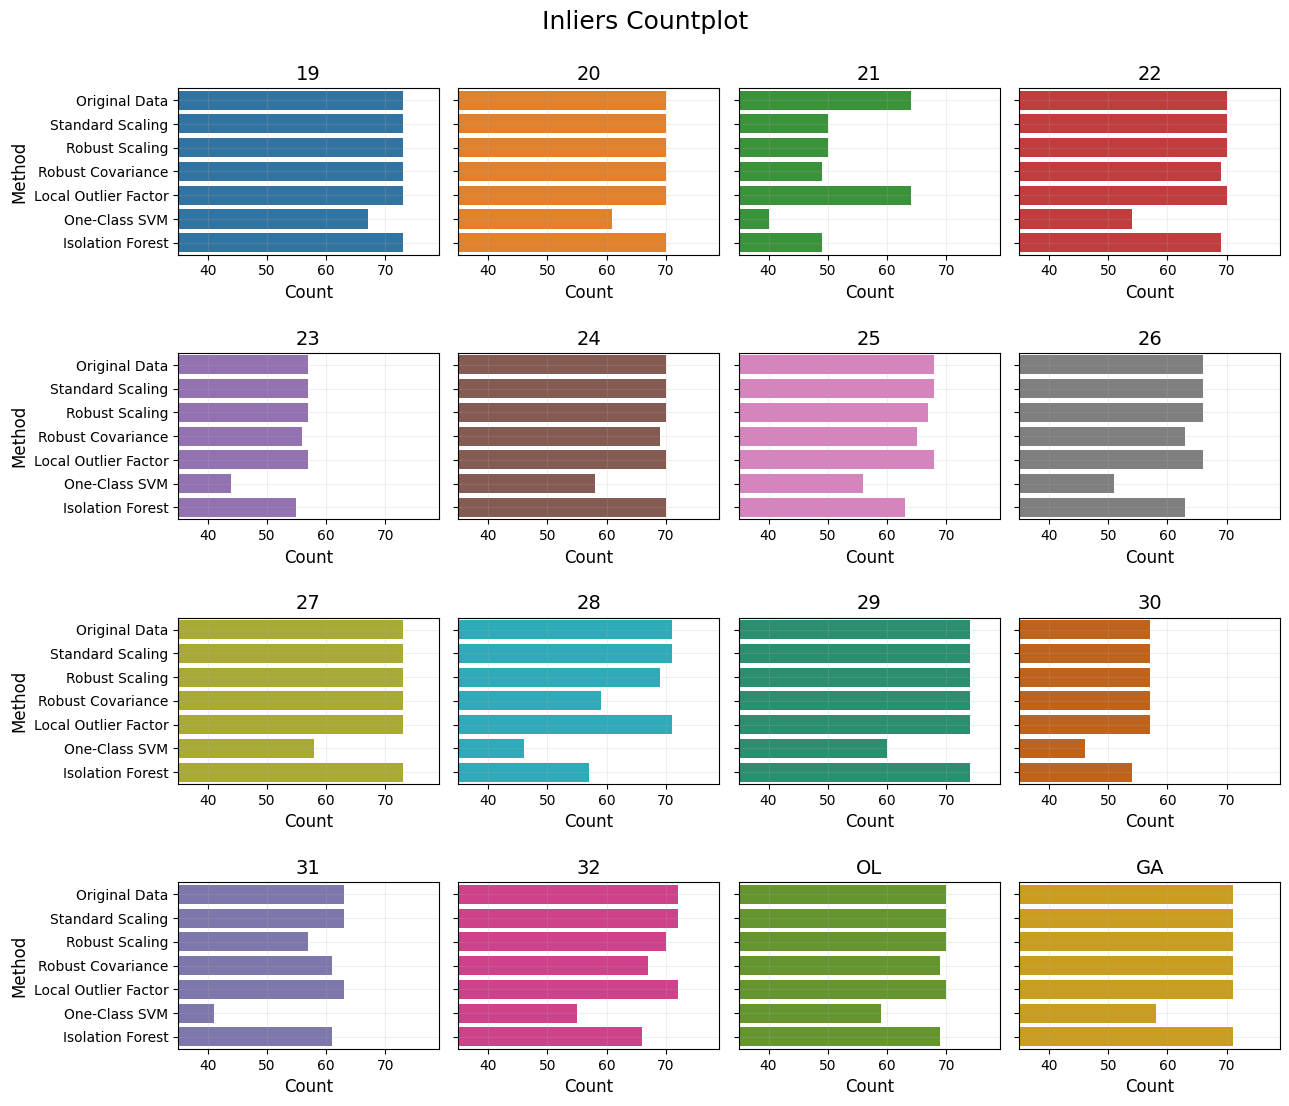

In [37]:
# plot the countplot to compare the inliers count of the filtered datasets and original dataset
fig = plt.figure(figsize=(13, 11))
fig.subplots(nrows=4, ncols=4, sharey=True)

face_colors = cm.get_cmap('tab10').colors + cm.get_cmap('Dark2').colors
min_value = np.floor(inliers_count.min().min())
max_value = np.ceil(inliers_count.max().max())

for i, ax in enumerate(fig.axes):
    sns.barplot(data=inliers_count.iloc[:, [i]].T, orient='h', color=face_colors[i], ax=ax)
    ax.set_xlim([min_value-5, max_value+5])
    ax.set_xlabel('Count', size=12)
    if i in np.arange(0, 15, 4):
        ax.set_ylabel('Method', size=12)
    ax.set_title(source_peaks.columns[i], size=14)
    ax.grid(alpha=0.2)
    
plt.suptitle(y=1.001, t='Inliers Countplot', size=18)
plt.tight_layout(h_pad=2.0)

The Standard Scaling method eliminates the 14 outliers identified on Peak 21 without affecting the sample count of other features.

Thus, this method provides the best filtering of the dataset for the same contamination level specified (i.e 0.07).

In [38]:
# create a dataframe of the filtered features from the best method
source_inliers = X_standard.copy()
source_inliers = source_inliers.set_index(source_peaks.index.values)
source_inliers.index.rename(source_peaks.index.name, inplace=True)
source_inliers.head()

19          20        21          22        23         24  \
Sample                                                                      
0        20.763486   13.947363  1.952259   16.486101       NaN   4.700927   
1       118.643361  130.716833       NaN         NaN       NaN  97.190520   
2       123.998274  119.186570       NaN  157.329488  9.416534  66.115133   
3        13.753847   18.599869       NaN    9.205427  7.676030  23.369460   
4        22.143712   20.548714  5.660628   21.590330  7.199149  16.221228   

                25          26         27          28         29         30  \
Sample                                                                        
0              NaN   22.170079   9.838302         NaN   9.655032   4.117457   
1       183.275260  172.616987  74.513555  227.625892  85.241758  23.851172   
2       116.153357  141.570068        NaN  195.406313  51.625043  19.935382   
3        18.861401         NaN   6.889721   18.959263   6.308057   8.018402   
4        28.281983   24.309612   7.921879   31.266928  15.366561   6.013449   

               31          32         OL         GA  
Sample                                               
0        1.156801   25.926844   6.734488   4.471749  
1             NaN  200.715642  75.290342        NaN  
2       57.203727         NaN  42.262010  33.352354  
3             NaN   18.181328   5.072130  15.635603  
4        5.000000   25.824537  17.897014   7.305632

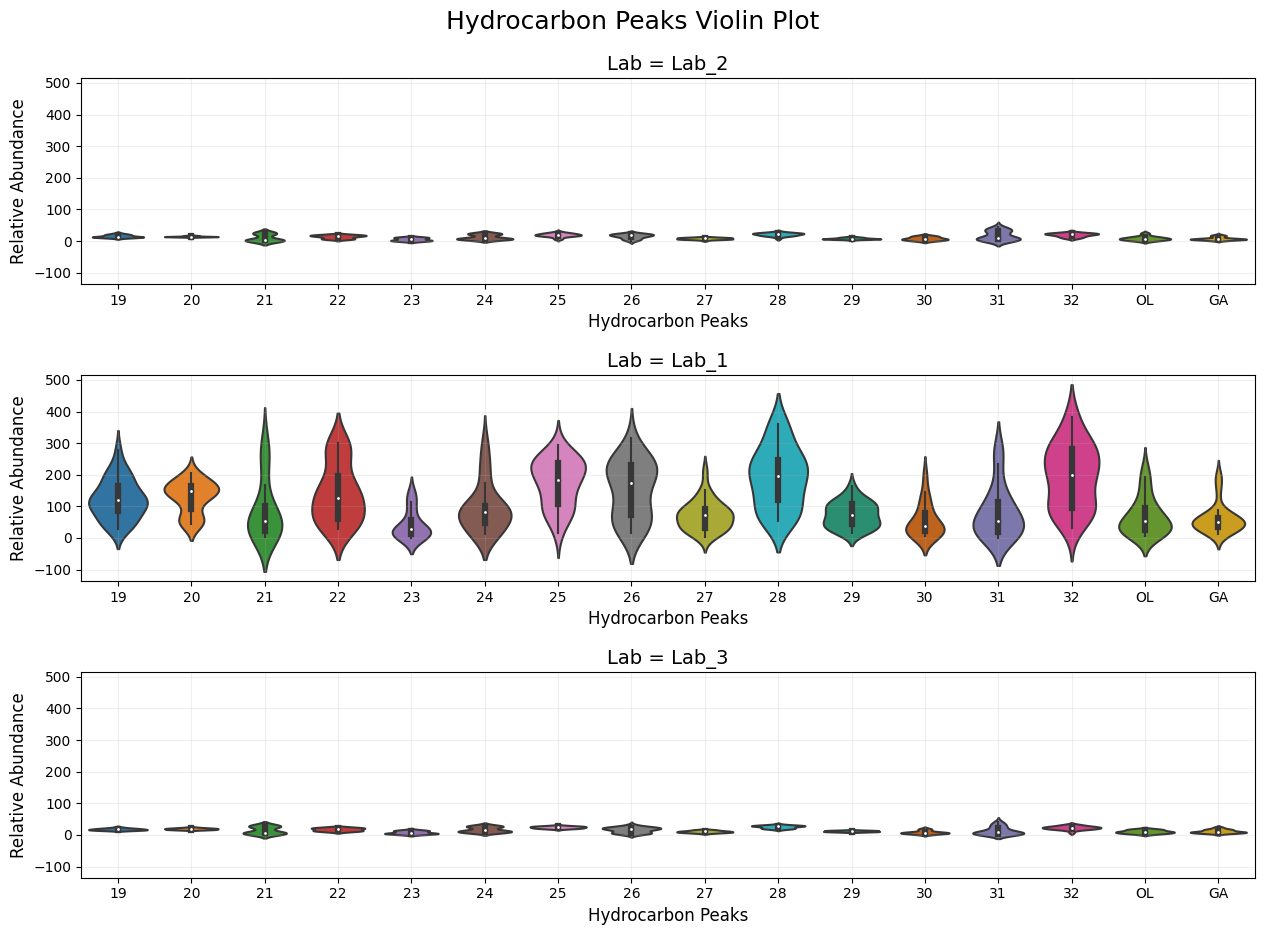

In [39]:
# plot the violin plot
violin_plot(data=source_inliers, categories=source.Lab)

From observation of the violin plot, outliers which were present on Peak 21 have been eliminated. 

The dataset now shows reasonable spread of the feature ranges.

However, a scale imbalance can be observed, with Lab 1 dominating the feature scale.

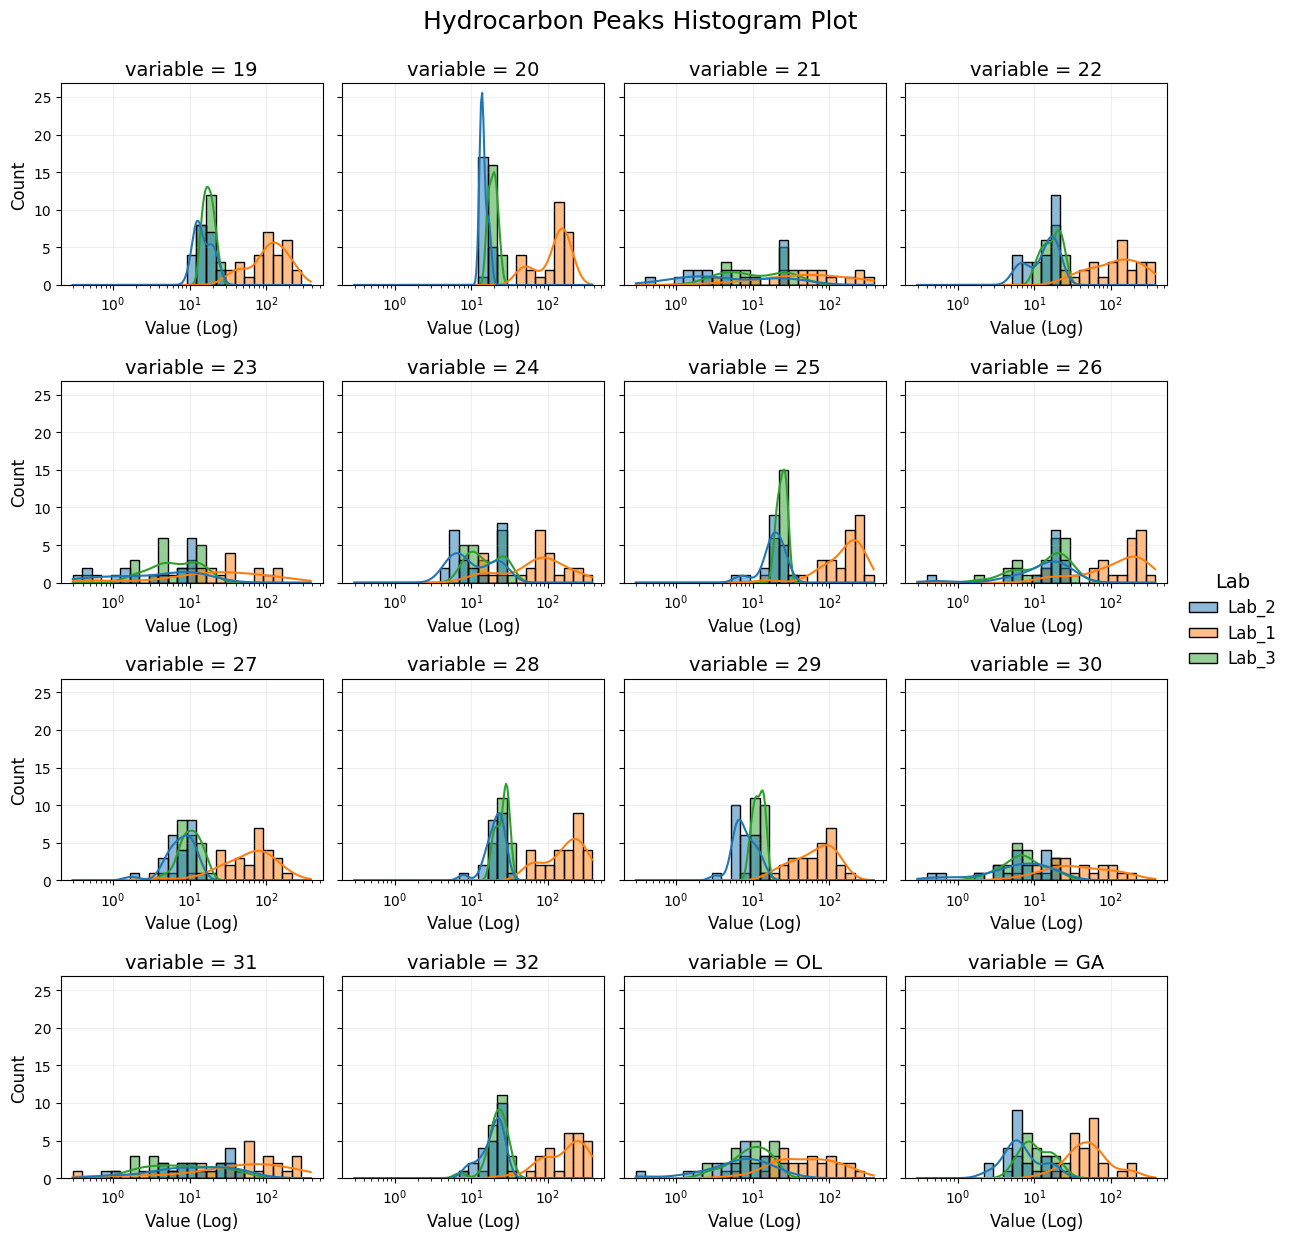

In [40]:
# plot the histogram plot
histogram_plot(data=source_inliers, categories=source.Lab, scale='log')

The histogram plot confirms the elimination of the spurious data range on Peak 21.

The dataset now shows similar spread of the feature ranges.

The scale imbablance can be obserevd here as samples from Lab 1 show a positive skew to the higher data range.

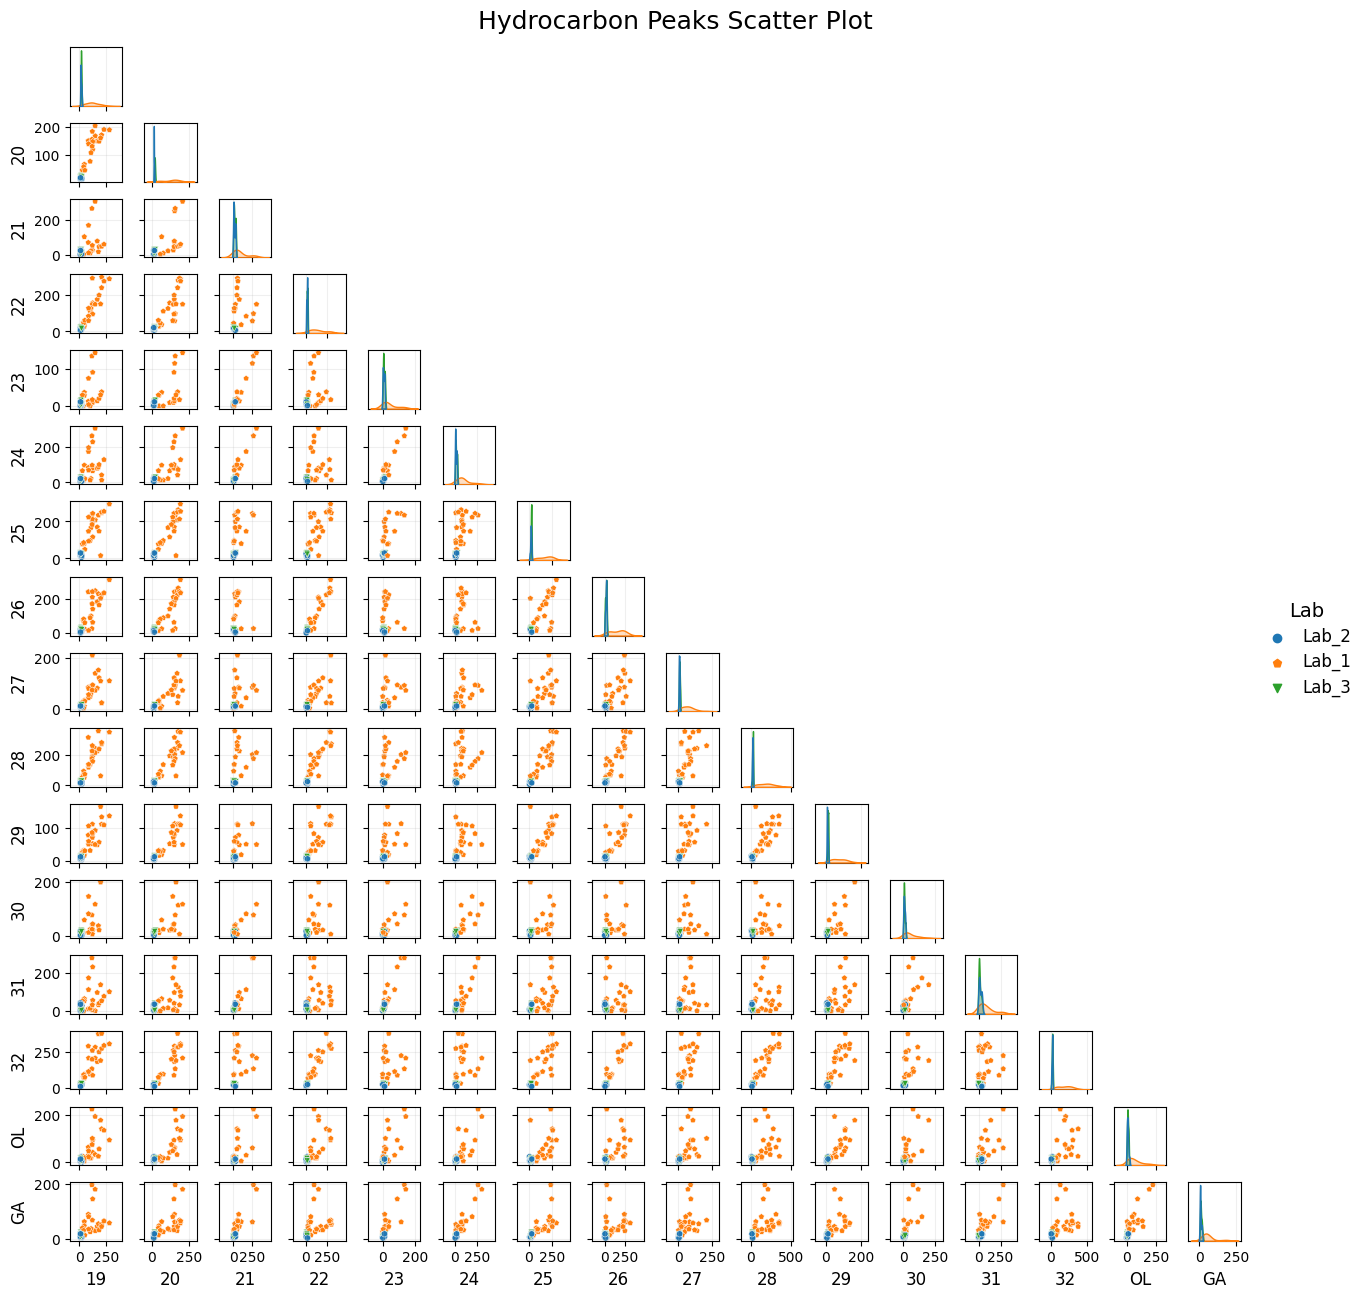

In [41]:
# plot the scatter plot
scatter_plot(data=source_inliers, categories=source.Lab)

Peak 21 no longer shows an abnormally high cluster space as observed on the raw dataset.

Samples from Lab 1 dominate the crossplot area due to their higher data range than samples from Lab 2 or 3.

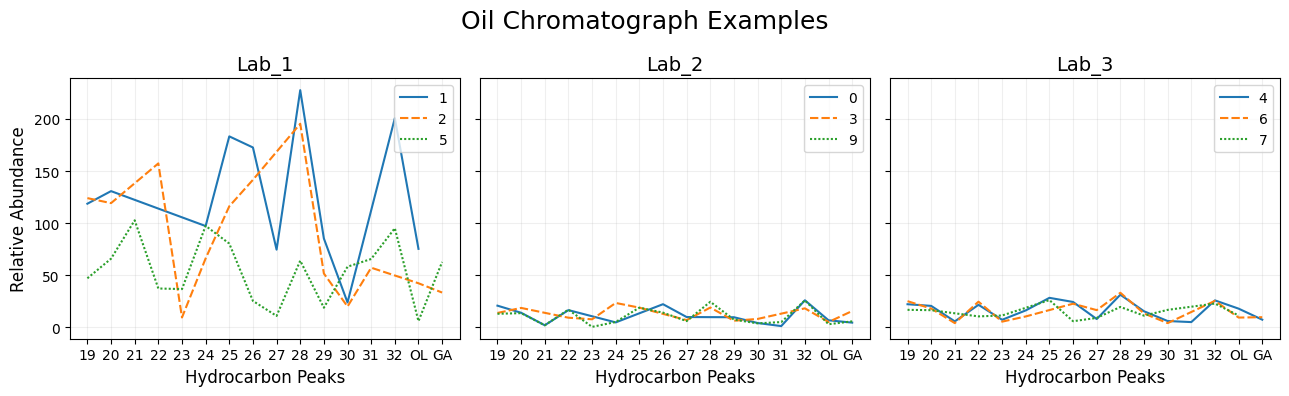

In [42]:
# plot the chromatograph of the first three samples
chromatograph_plot(data=source_inliers, categories=source.Lab, n_samples=3)

The spurious datapoints at Peak 21 are no longer present on the chromatogarph examples.

The scale imbalance is confirmed, with samples from Lab 1 appearing to be of a much larger scale than those from Lab 2 or 3.

### 3.2 Missing Data

In [43]:
from sklearn.impute import MissingIndicator
from xgboost import XGBRegressor

#### 3.2.1 Missing Indicator

In [44]:
# create a boolean mask of the missing values on the dataframe
nan_mask = MissingIndicator(missing_values=np.nan, features='all', sparse='auto').fit_transform(source_inliers)
nan_mask = pd.DataFrame(nan_mask, index=source_inliers.index, columns=source_inliers.columns)

In [45]:
# create a function for plotting the missing data indicator
def missing_plot(nan_mask):
    # nan_mask: boolean nan mask
    
    fig = plt.figure(figsize=(13, 13))
    
    cmap = ListedColormap(['red', 'lime'])
    
    ax = sns.heatmap(nan_mask, xticklabels=nan_mask.columns, cmap=cmap, cbar=False)
    axa = ax.secondary_xaxis('top')
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), size=12, rotation=0)
    axa.set_xticks(ax.get_xticks())
    axa.set_xticklabels(ax.get_xticklabels(), size=12, rotation=0)
    ax.set_ylabel('Sample', size=12)
    
    for i in range(nan_mask.shape[1]): 
        ax.axvline(x=i+1, c='k', lw=1.5)
        
    for i in range(nan_mask.shape[0]): 
        ax.axhline(y=i+1, c='k', lw=0.5)
    
    plt.suptitle(y=0.99, t='Missing Indicator', size=18)
    plt.tight_layout()

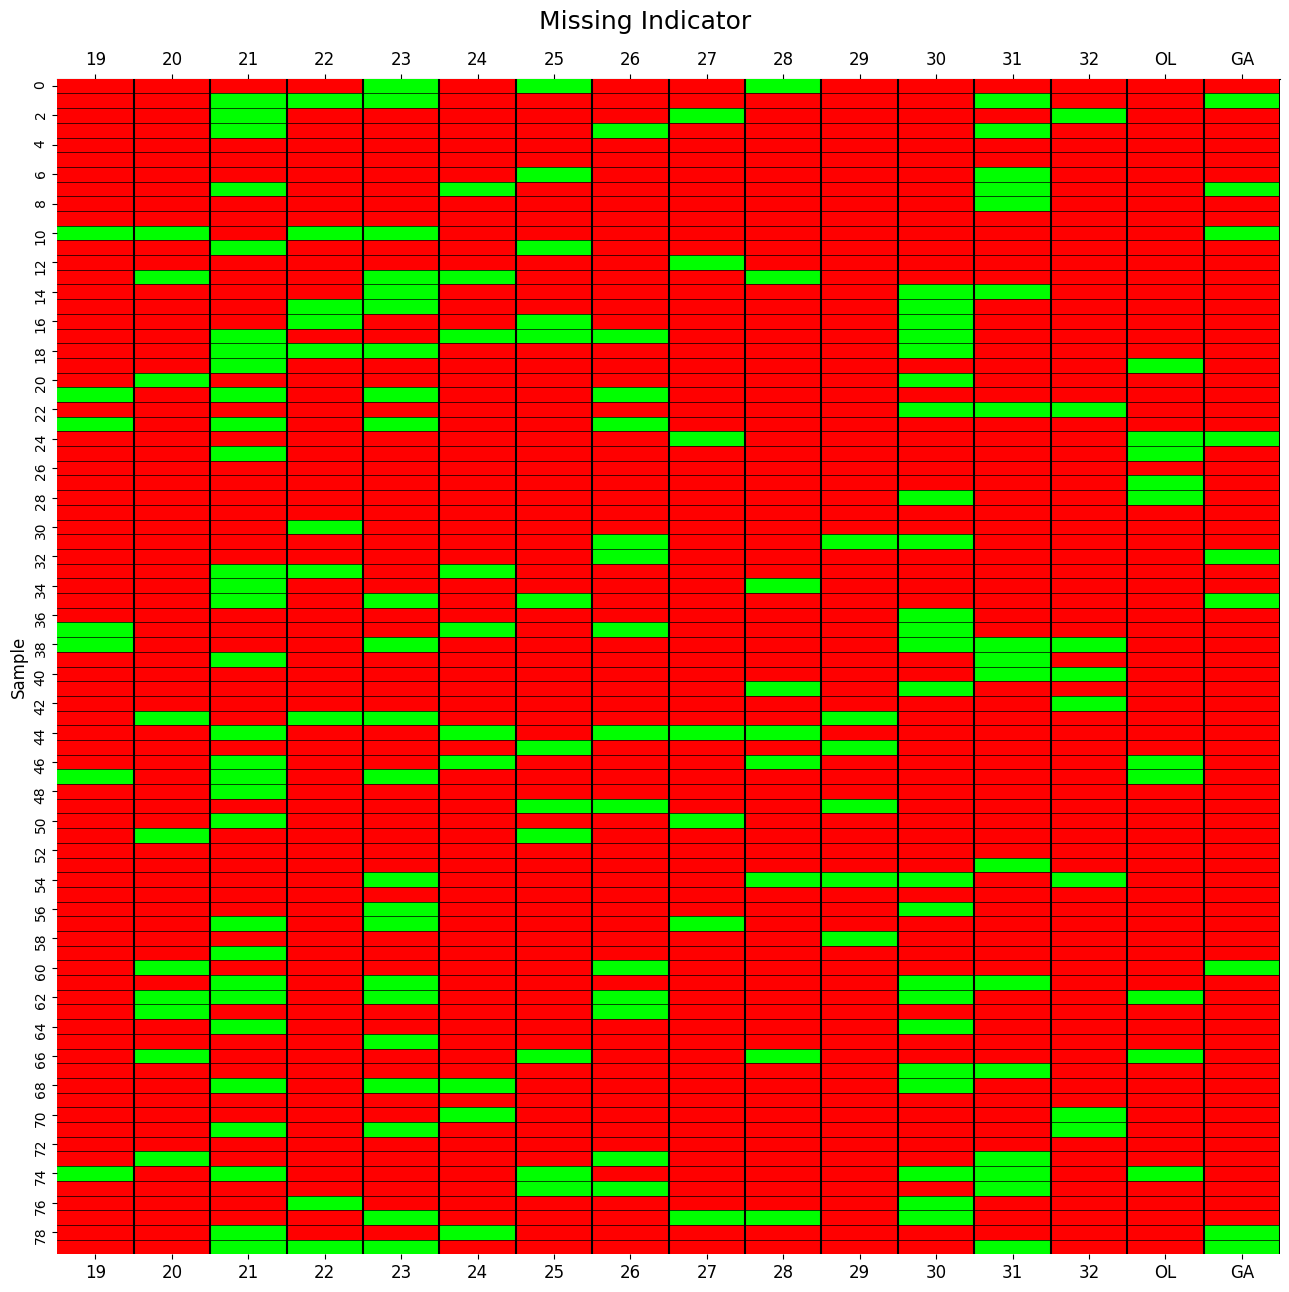

In [46]:
# plot the missing data indicator
missing_plot(nan_mask=nan_mask)

#### 3.2.2 Data Imputation

Missing data will be imputed in an iterative fashion similar to the implementation of the MissForest algorithm. 

Each feature will initially be imputed with the median of the feature.

Afterwards, using an nan handling algorithm (in this case XGBoost) with the median imputed features, the missing gaps on each feature will be imputed iteratively. 

In [47]:
# create a function for performing imputation of missing values
def impute(data):
    # data: dataframe to be imputed
    
    editna_data = pd.DataFrame([], 
                               index=data.index, 
                               columns=data.count().sort_values(ascending=False).keys())
    imputed = data.copy()
    
    # fill nan values with median
    fillna_data = data.copy()
    fillna_data = fillna_data.fillna(data.median())
    scaled_fillna_data = StandardScaler().fit_transform(fillna_data)
    scaled_fillna_data = pd.DataFrame(scaled_fillna_data, 
                                      index=fillna_data.index, 
                                      columns=fillna_data.columns)
    
    # impute nan values in an iterative fashion
    imp_fit = [i for i in range(len(data.columns))]
    
    for i, feat in enumerate(data.count().sort_values(ascending=False).keys()):
        dropna_data = data.dropna(subset=[feat])
        scaled_dropna_data = StandardScaler().fit_transform(dropna_data)
        scaled_dropna_data = pd.DataFrame(scaled_dropna_data, 
                                          index=dropna_data.index, 
                                          columns=dropna_data.columns)
        
        imp_fit[i] = XGBRegressor(random_state=1234).fit(X=scaled_dropna_data.drop(feat, axis=1), 
                                                         y=dropna_data[[feat]])
        editna_data[feat] = imp_fit[i].predict(scaled_fillna_data.drop(feat, axis=1))
    
    editna_data = editna_data[list(data.columns)]
    imputed = imputed.fillna(editna_data)
    
    return imputed

In [48]:
# perform imputation of missing values
source_imputed = impute(source_inliers)
source_imputed.head()

19          20         21          22         23         24  \
Sample                                                                        
0        20.763486   13.947363   1.952259   16.486101   0.717643   4.700927   
1       118.643361  130.716833  53.235420  142.001740  17.091974  97.190520   
2       123.998274  119.186570  54.164894  157.329488   9.416534  66.115133   
3        13.753847   18.599869  25.289362    9.205427   7.676030  23.369460   
4        22.143712   20.548714   5.660628   21.590330   7.199149  16.221228   

                25          26          27          28         29         30  \
Sample                                                                         
0        21.662144   22.170079    9.838302   29.085682   9.655032   4.117457   
1       183.275260  172.616987   74.513555  227.625892  85.241758  23.851172   
2       116.153357  141.570068  116.152184  195.406313  51.625043  19.935382   
3        18.861401    9.502702    6.889721   18.959263   6.308057   8.018402   
4        28.281983   24.309612    7.921879   31.266928  15.366561   6.013449   

               31          32         OL         GA  
Sample                                               
0        1.156801   25.926844   6.734488   4.471749  
1       21.240152  200.715642  75.290342  51.325592  
2       57.203727  197.460129  42.262010  33.352354  
3       30.732565   18.181328   5.072130  15.635603  
4        5.000000   25.824537  17.897014   7.305632

In [49]:
# create a function for plotting the imputed features
def imputation_plot(missing, imputed, nan_mask):
    # missing: dataframe with missing values
    # imputed: dataframe with imputed values
    # nan_mask: boolean nan mask
    
    fig = plt.figure(figsize=(13, 1.5*imputed.shape[1]))
    fig.subplots(nrows=imputed.shape[1])

    line_colors = cm.get_cmap('tab10').colors + cm.get_cmap('Dark2').colors
    min_value = imputed.index.min()
    max_value = imputed.index.max()
    value_range = max_value - min_value
    value_pad = 0.01*value_range
    min_value = min_value - value_pad
    max_value = max_value + value_pad

    for i, ax in enumerate(fig.axes):
        sns.lineplot(data=missing.iloc[:, i], 
                     label='Missing', 
                     color='k', 
                     ax=ax)
        sns.lineplot(data=imputed.iloc[:, i], 
                     label='Imputed', 
                     color=line_colors[i], 
                     ax=ax, 
                     marker='o', 
                     markersize=7)
        ax.fill_between(x=imputed.index, 
                        y1=min(ax.get_ylim()), 
                        y2=max(ax.get_ylim()), 
                        where=nan_mask.iloc[:, i]==True, 
                        label='Gap', 
                        color='red', 
                        alpha=0.2)
        ax.set_xlabel(ax.get_xlabel(), size=12)
        ax.set_ylabel(ax.get_ylabel(), size=12)
        ax.set_xlim([min_value, max_value])
        ax.grid(alpha=0.2)
        ax.legend(loc=(1.005, 0.0))

    plt.suptitle(y=1.001, t='Missing Imputation', size=18)
    plt.tight_layout(h_pad=2.0)

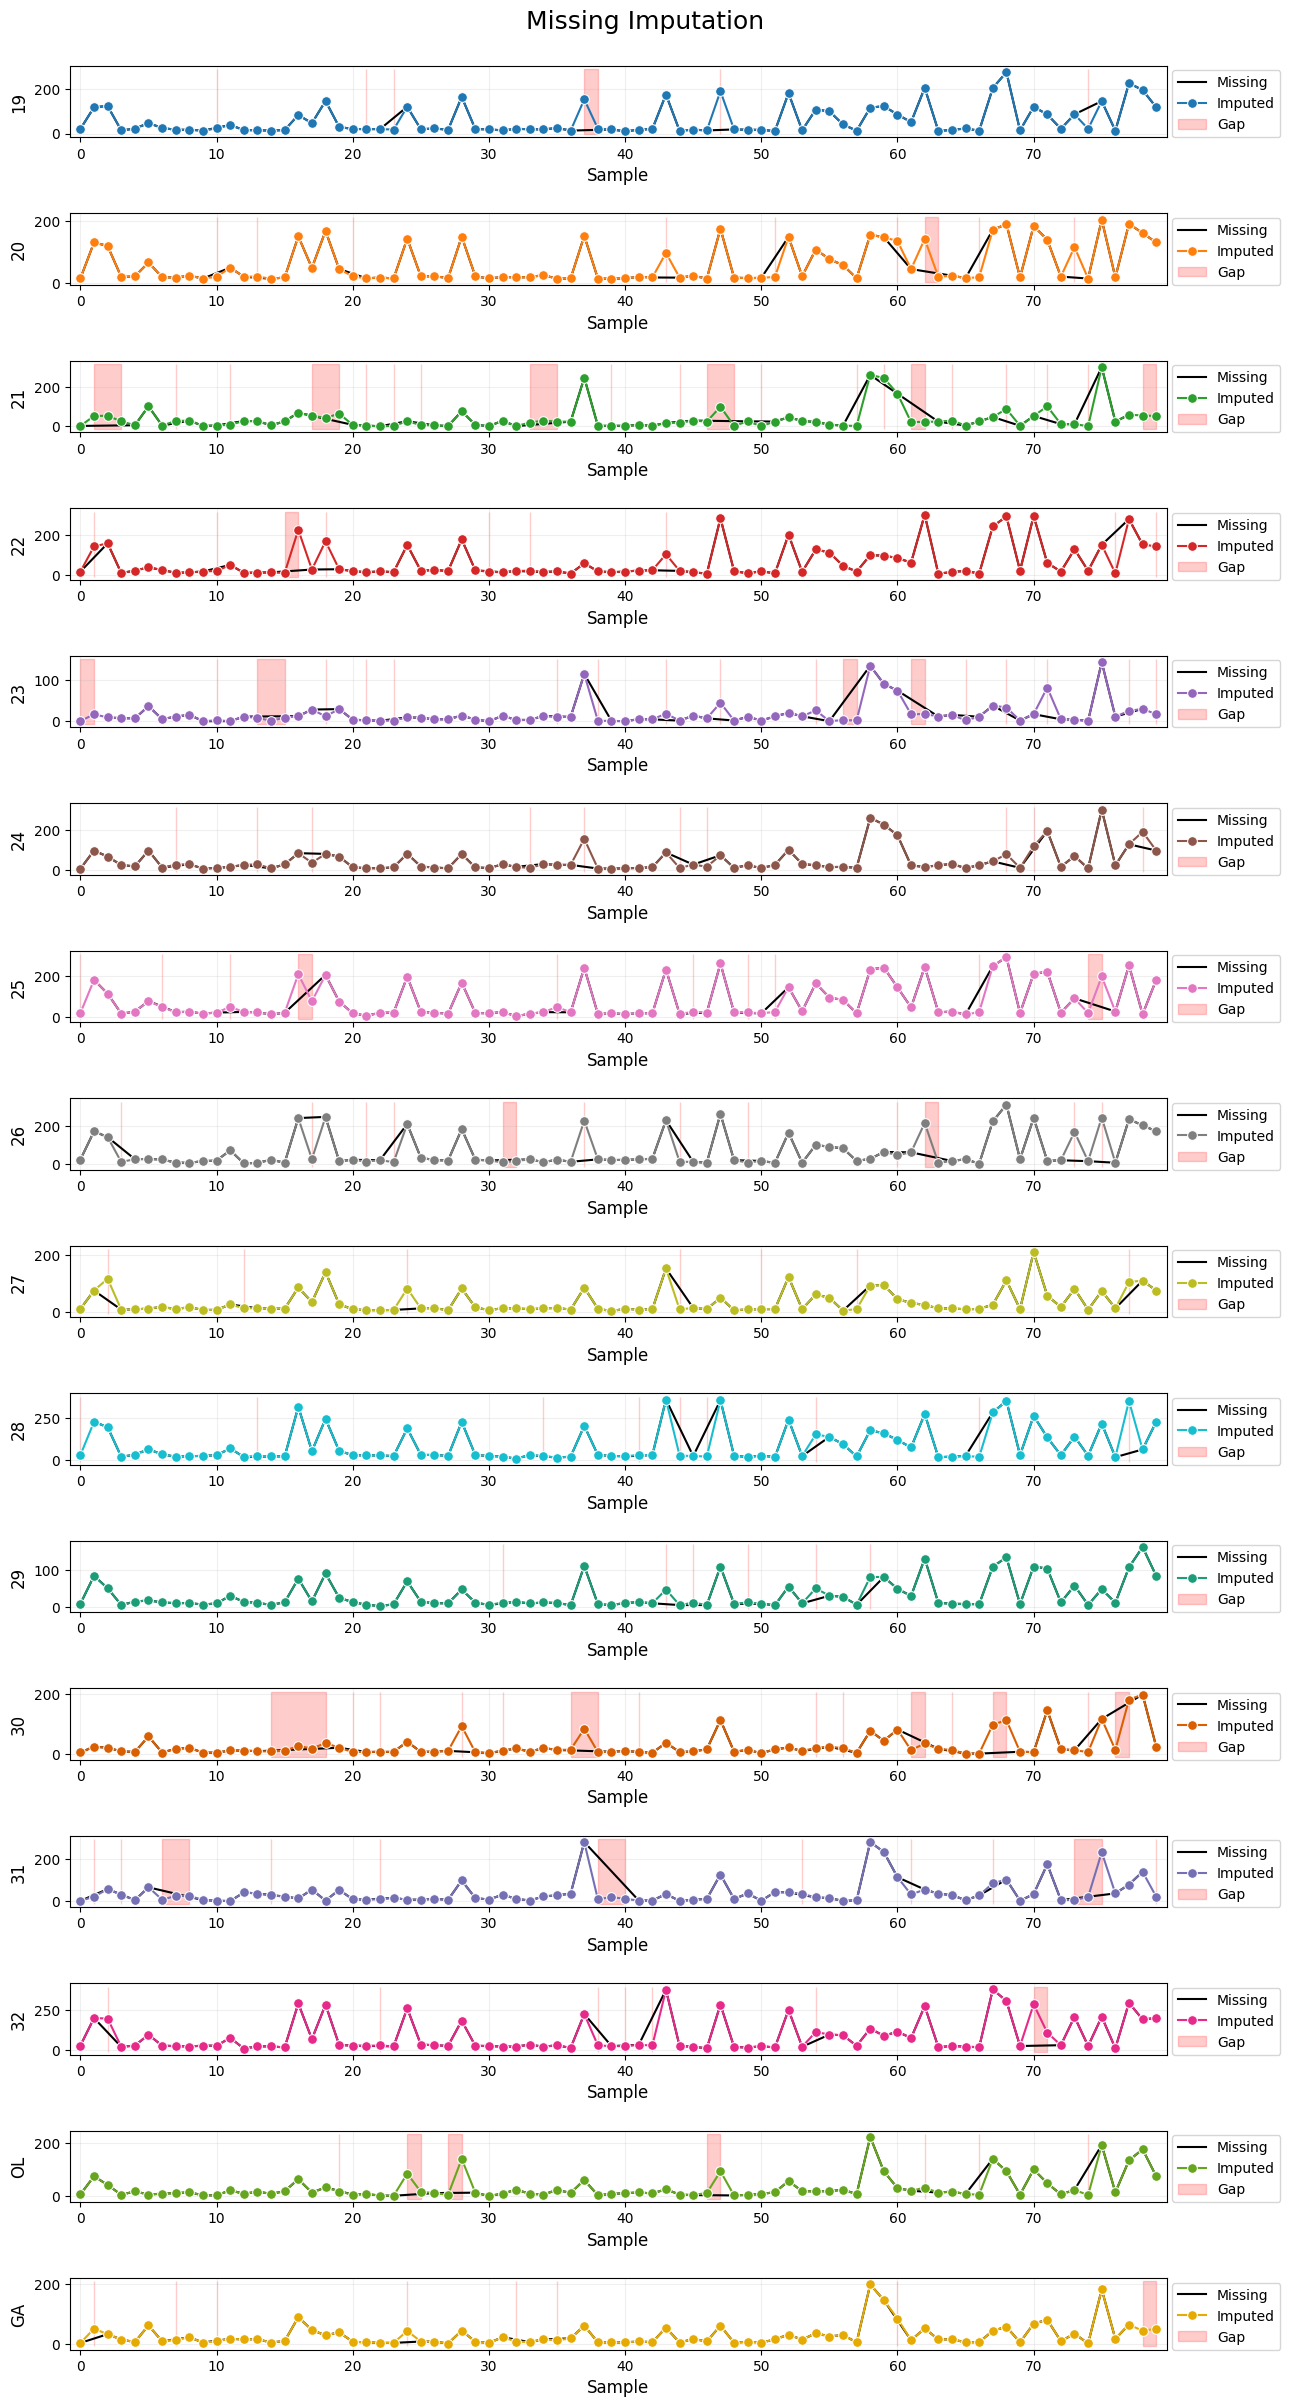

In [50]:
# plot the imputed features
imputation_plot(missing=source_inliers, imputed=source_imputed, nan_mask=nan_mask)

From observation, the imputation on each feature honours the trend of sample points on the other features used to impute it.

### 3.3 Synthetic Sampling

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
# import the reference ranges dataset for synthetic sample generation
ranges = pd.read_csv('InDirect_From_Source_global_ranges_oil_families.csv')
ranges.head()

Parameter       mean     stdev        family
0        19  22.015064  3.147094  I_Ordovician
1        20  14.784672  7.595627  I_Ordovician
2        21   1.708241  0.857020  I_Ordovician
3        22  16.744960  3.123742  I_Ordovician
4        23   1.826882  2.855366  I_Ordovician

The synthetic samples will be generated by random sampling normal distributions with options for generating balanced or imbalanced classes.

Samples for each class are drawn from a gaussian distribution with a specific mean and standard deviation.

Hence, each class will have a unique but possibly overlapping range of values which should be diffentiable by a machine learning algorithm.

In [53]:
# create a function for random normal sampling
def synthetic_sampling(data, size, how, fractions, features, target):
    # data: dataframe containing ranges mean and standard deviation
    # size: number of samples to generate (integer)
    # how: type of data to generate 'balanced' or 'imbalanced' (string)
    # fraction: share of data size for each class (dictionary of floats)
    # features: feature names (list of strings)
    # target: target name (string)
    
    output = pd.DataFrame([], 
                          index=np.arange(size), 
                          columns=np.append(features, target))
    
    
    classes = list(data[target].unique())
    
    samples = [[] for i in range(len(features))]
    labels = []
    
    data_n = data.set_index(target)
    
    if how == 'balanced':
        subsize = int(size/len(classes))
        for i, cls in enumerate(classes):
            for j, feat in enumerate(features):
                np.random.seed(1234)
                samples[j].append(np.random.normal(loc=data_n.loc[cls, 'mean'][j], 
                                                   scale=data_n.loc[cls, 'stdev'][j], 
                                                   size=subsize))
            labels.append([cls]*subsize)
            
    elif how == 'imbalanced':
        for i, cls in enumerate(classes):
            subsize = int(fractions[cls]*size)
            for j, feat in enumerate(features):
                np.random.seed(1234)
                samples[j].append(np.random.normal(loc=data_n.loc[cls, 'mean'][j], 
                                                   scale=data_n.loc[cls, 'stdev'][j], 
                                                   size=subsize))
            labels.append([cls]*subsize)
        
    samples = np.block(samples).T
    labels = np.hstack(labels)
    
    output[features] = samples
    output[target] = labels
    
    return output

In [54]:
# generate an imbalanced count of samples
synth = synthetic_sampling(data=ranges, 
                           size=10000, 
                           how='imbalanced', 
                           fractions={'I_Ordovician': 0.2, 
                                      'III_Deltaic': 0.1, 
                                      'I_Lacustrine': 0.2, 
                                      'II_Marine': 0.5}, 
                           features=source_peaks.columns, 
                           target='family')
synth.head()

19         20        21         22        23         24        25  \
0  23.498715  18.365518  2.112270  18.217602  3.173002  19.459726  5.663639   
1  18.266951   5.738465  0.687552  13.024660 -1.573790  10.100843  1.177853   
2  26.523928  25.666980  2.936099  21.220367  5.917785  24.871403  8.257498   
3  21.031119  12.409885  1.440292  15.768316  0.934146  15.045547  3.547888   
4  19.747303   9.311349  1.090682  14.494027 -0.230663  12.748983  2.447127   

          26         27         28         29         30         31  \
0  23.344932  16.617011  11.343496  17.352908  20.819887  16.450360   
1  19.277026   4.643932   4.232089   5.958998  11.292929   5.906188   
2  25.697157  23.540319  15.455593  23.941319  26.328752  22.547417   
3  21.426277  10.969829   7.989353  11.978896  16.326434  11.477131   
4  20.428059   8.031771   6.244295   9.182959  13.988626   8.889711   

          32         OL        GA        family  
0  21.638281  23.021741  1.783386  I_Ordovician  
1  16.454594  20.237385 -4.079599  I_Ordovician  
2  24.635694  24.631766  5.173596  I_Ordovician  
3  19.193361  21.708481 -0.981929  I_Ordovician  
4  17.921343  21.025232 -2.420640  I_Ordovician

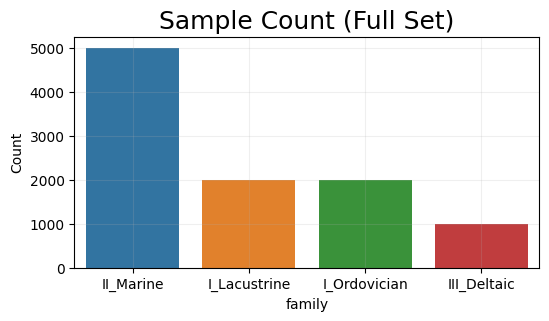

In [55]:
# check the sample count of each family
fig = plt.figure(figsize=(6, 3))
sns.barplot(x=synth[['family']].value_counts().index.get_level_values(0), 
            y=synth[['family']].value_counts())
plt.ylabel('Count')
plt.title('Sample Count (Full Set)', size=18)
plt.grid(alpha=0.2)
plt.show()

In [56]:
# specify the features and target
feats = synth.columns[:-1]
targ = synth.columns[-1]

In [57]:
# specify the train and validation features and target
X_synth = synth[feats]
y_synth = synth[[targ]]

In [58]:
# specify the train and validation sets
X_synth_train, X_synth_valid, y_train, y_valid = train_test_split(X_synth, 
                                                                  y_synth, 
                                                                  test_size=0.2, 
                                                                  random_state=1234, 
                                                                  shuffle=True, 
                                                                  stratify=y_synth)

In [59]:
# specify the test features
X_source_test = source_imputed.copy()

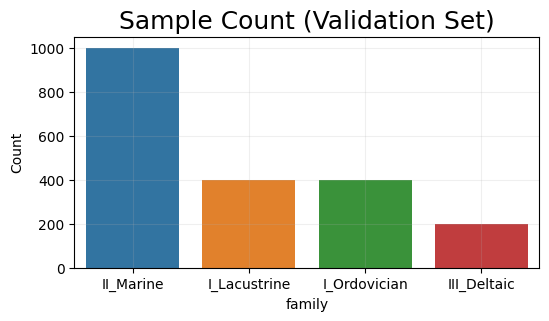

In [60]:
# check the sample count of each family on the validation set to confirm stratification
fig = plt.figure(figsize=(6, 3))
sns.barplot(x=y_valid.value_counts().index.get_level_values(0), y=y_valid.value_counts())
plt.ylabel('Count')
plt.title('Sample Count (Validation Set)', size=18)
plt.grid(alpha=0.2)
plt.show()

## 4. Feature Engineering

### 4.1 Min-Max Normalization

In [61]:
from sklearn.preprocessing import MinMaxScaler

Min-Max Normalization will be used to level the scale of all samples.

Each sample will be transformed to range between 0 and 1.

This will equalize their weights while maintaining the chromatograph trends.

In [62]:
# create a function for performing feature scaling of the the train, validation or test sets to min-max range
def scale(X_data):
    # X_data: train, validation or test features
    
    # row-wise scaling
    X_scaled_data = MinMaxScaler(clip=False).fit_transform(X_data.T)
    X_scaled_data = pd.DataFrame(X_scaled_data.T, 
                                 index=X_data.index, 
                                 columns=X_data.columns)
    return X_scaled_data

In [63]:
# perform feature scaling of the train set
X_scaled_train = scale(X_data=X_synth_train)

In [64]:
# perform feature scaling of the validation set
X_scaled_valid = scale(X_data=X_synth_valid)

In [65]:
# perform feature scaling of the test set
X_scaled_test = scale(X_data=X_source_test)

In [66]:
# merge the train and validation sets
X_scaled = pd.concat([X_scaled_train, X_scaled_valid], axis=0)
X_scaled = X_scaled.sort_index()
X_scaled.head()

19        20        21        22        23        24        25  \
0  1.000000  0.763614  0.015145  0.756803  0.063992  0.814003  0.178687   
1  0.918969  0.403753  0.196042  0.703387  0.103048  0.583150  0.216205   
2  1.000000  0.963670  0.000000  0.775157  0.126408  0.929942  0.225599   
3  0.970148  0.590197  0.106751  0.738208  0.084444  0.706355  0.199636   
4  0.945495  0.500386  0.149763  0.721435  0.093406  0.647006  0.207617   

         26        27        28        29        30        31        32  \
0  0.992918  0.683095  0.440247  0.716983  0.876639  0.675420  0.914326   
1  0.960507  0.358742  0.341806  0.412822  0.632172  0.410651  0.844438   
2  0.964949  0.873511  0.530761  0.890511  0.991726  0.831417  0.919949   
3  0.987563  0.526732  0.395378  0.571203  0.762805  0.549089  0.889155   
4  0.974530  0.445810  0.369572  0.494910  0.699879  0.482403  0.867615   

         OL        GA  
0  0.978035  0.000000  
1  1.000000  0.000000  
2  0.919782  0.094858  
3  1.000000  0.000000  
4  1.000000  0.000000

In [67]:
# merge the features and target
synth_scaled = pd.concat([X_scaled.copy(), y_synth], axis=1)
synth_scaled.head()

19        20        21        22        23        24        25  \
0  1.000000  0.763614  0.015145  0.756803  0.063992  0.814003  0.178687   
1  0.918969  0.403753  0.196042  0.703387  0.103048  0.583150  0.216205   
2  1.000000  0.963670  0.000000  0.775157  0.126408  0.929942  0.225599   
3  0.970148  0.590197  0.106751  0.738208  0.084444  0.706355  0.199636   
4  0.945495  0.500386  0.149763  0.721435  0.093406  0.647006  0.207617   

         26        27        28        29        30        31        32  \
0  0.992918  0.683095  0.440247  0.716983  0.876639  0.675420  0.914326   
1  0.960507  0.358742  0.341806  0.412822  0.632172  0.410651  0.844438   
2  0.964949  0.873511  0.530761  0.890511  0.991726  0.831417  0.919949   
3  0.987563  0.526732  0.395378  0.571203  0.762805  0.549089  0.889155   
4  0.974530  0.445810  0.369572  0.494910  0.699879  0.482403  0.867615   

         OL        GA        family  
0  0.978035  0.000000  I_Ordovician  
1  1.000000  0.000000  I_Ordovician  
2  0.919782  0.094858  I_Ordovician  
3  1.000000  0.000000  I_Ordovician  
4  1.000000  0.000000  I_Ordovician

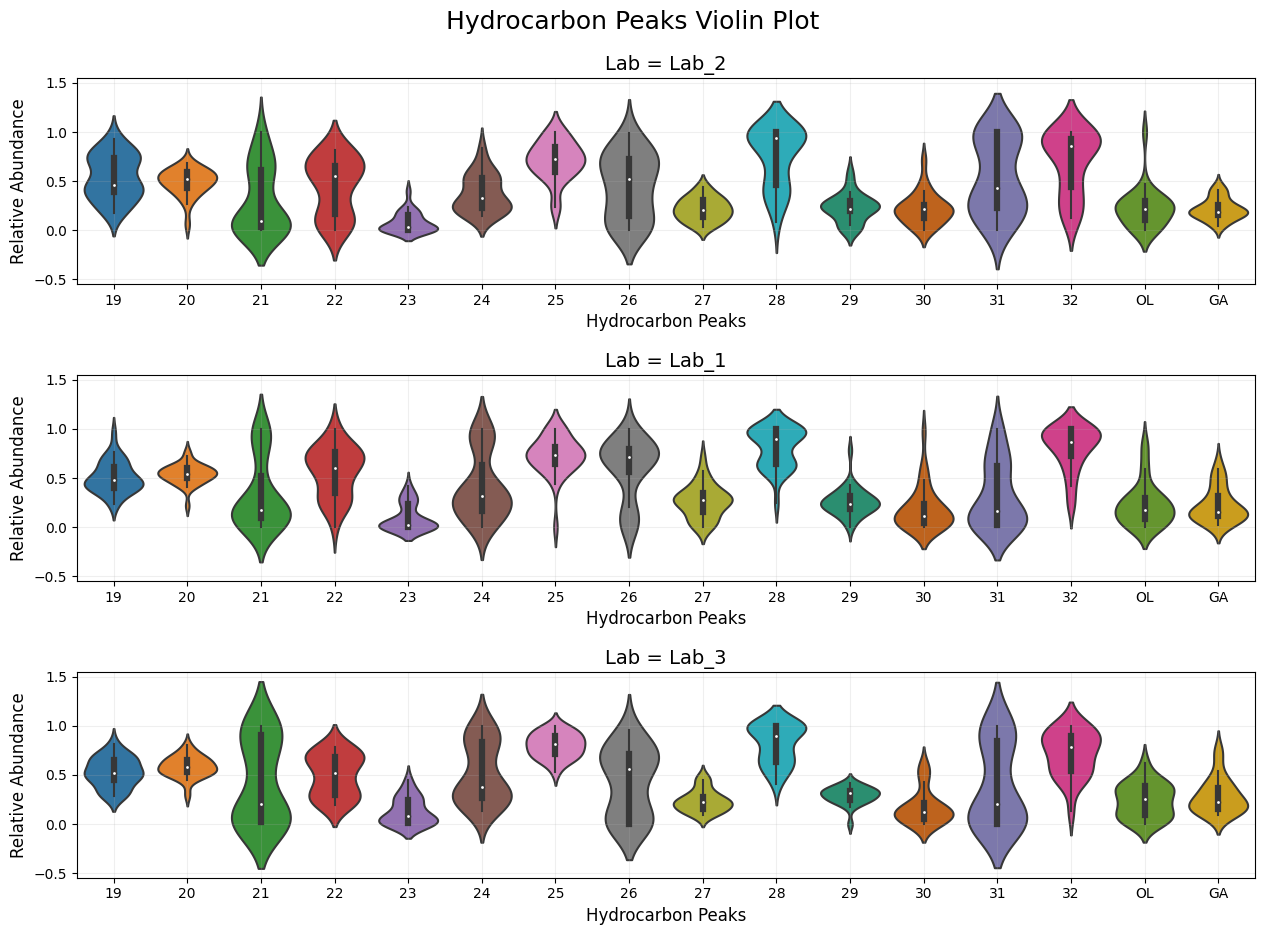

In [68]:
# plot the violin plot
violin_plot(data=X_scaled_test, categories=source.Lab)

After scaling, the samples share a common scale irrespective of lab origin.

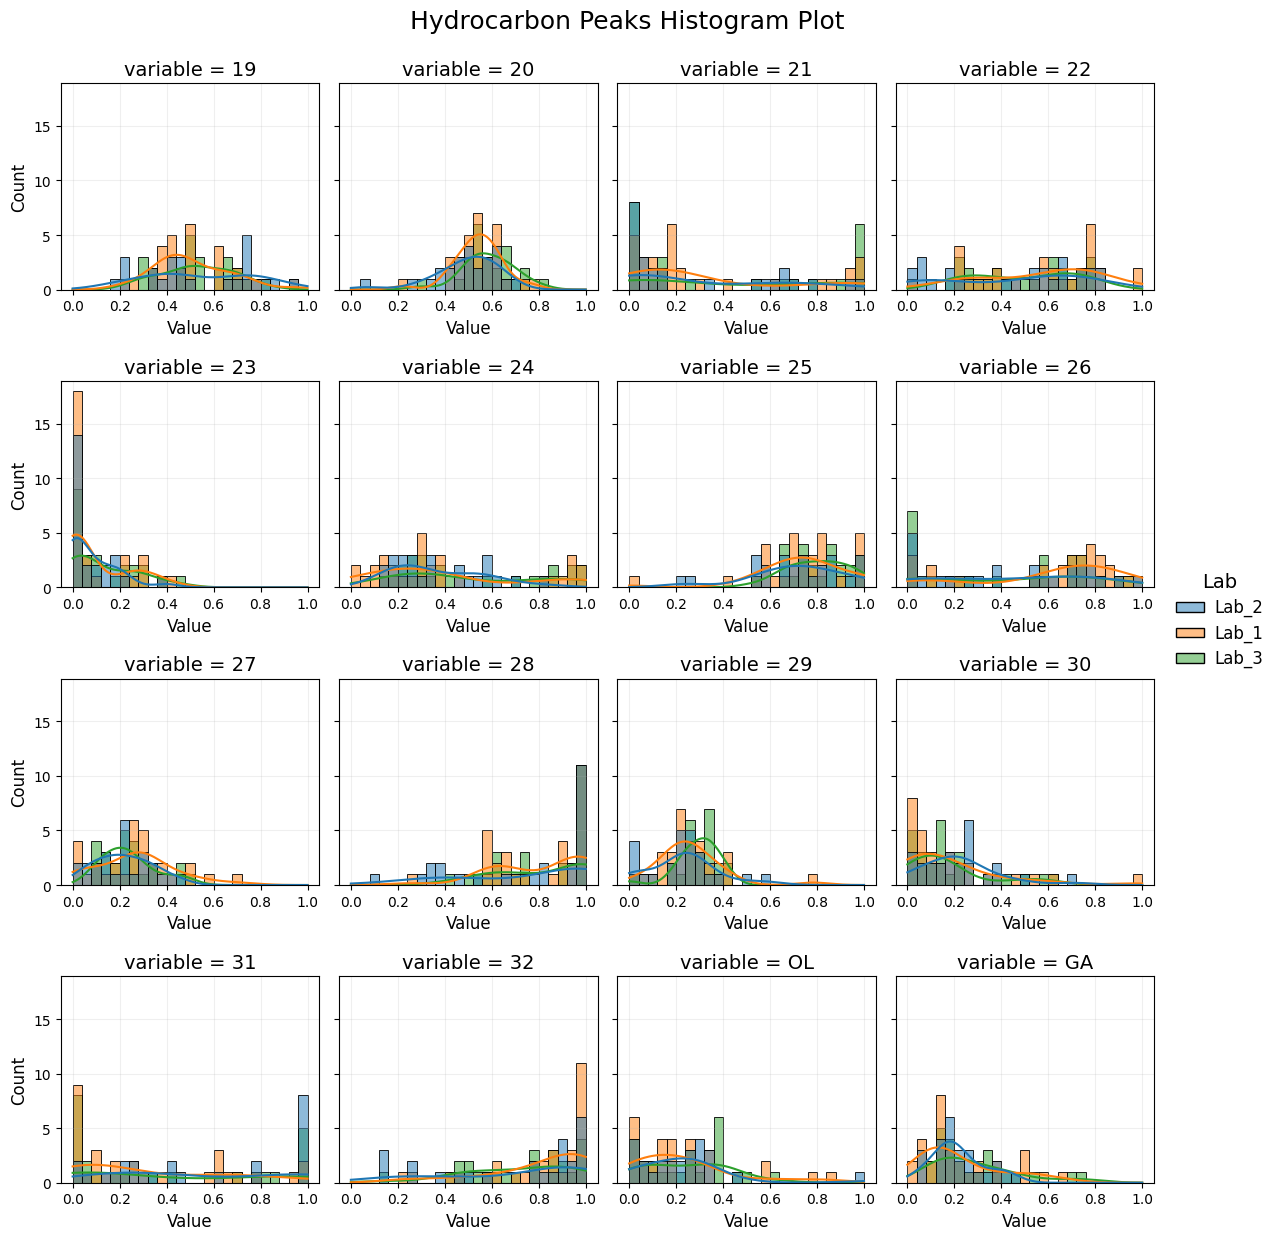

In [69]:
# plot the histogram plot
histogram_plot(data=X_scaled_test, categories=source.Lab, scale='linear')

The histogram plot now shows an overlap of the binned values, meaning all labs now share a common data range. 

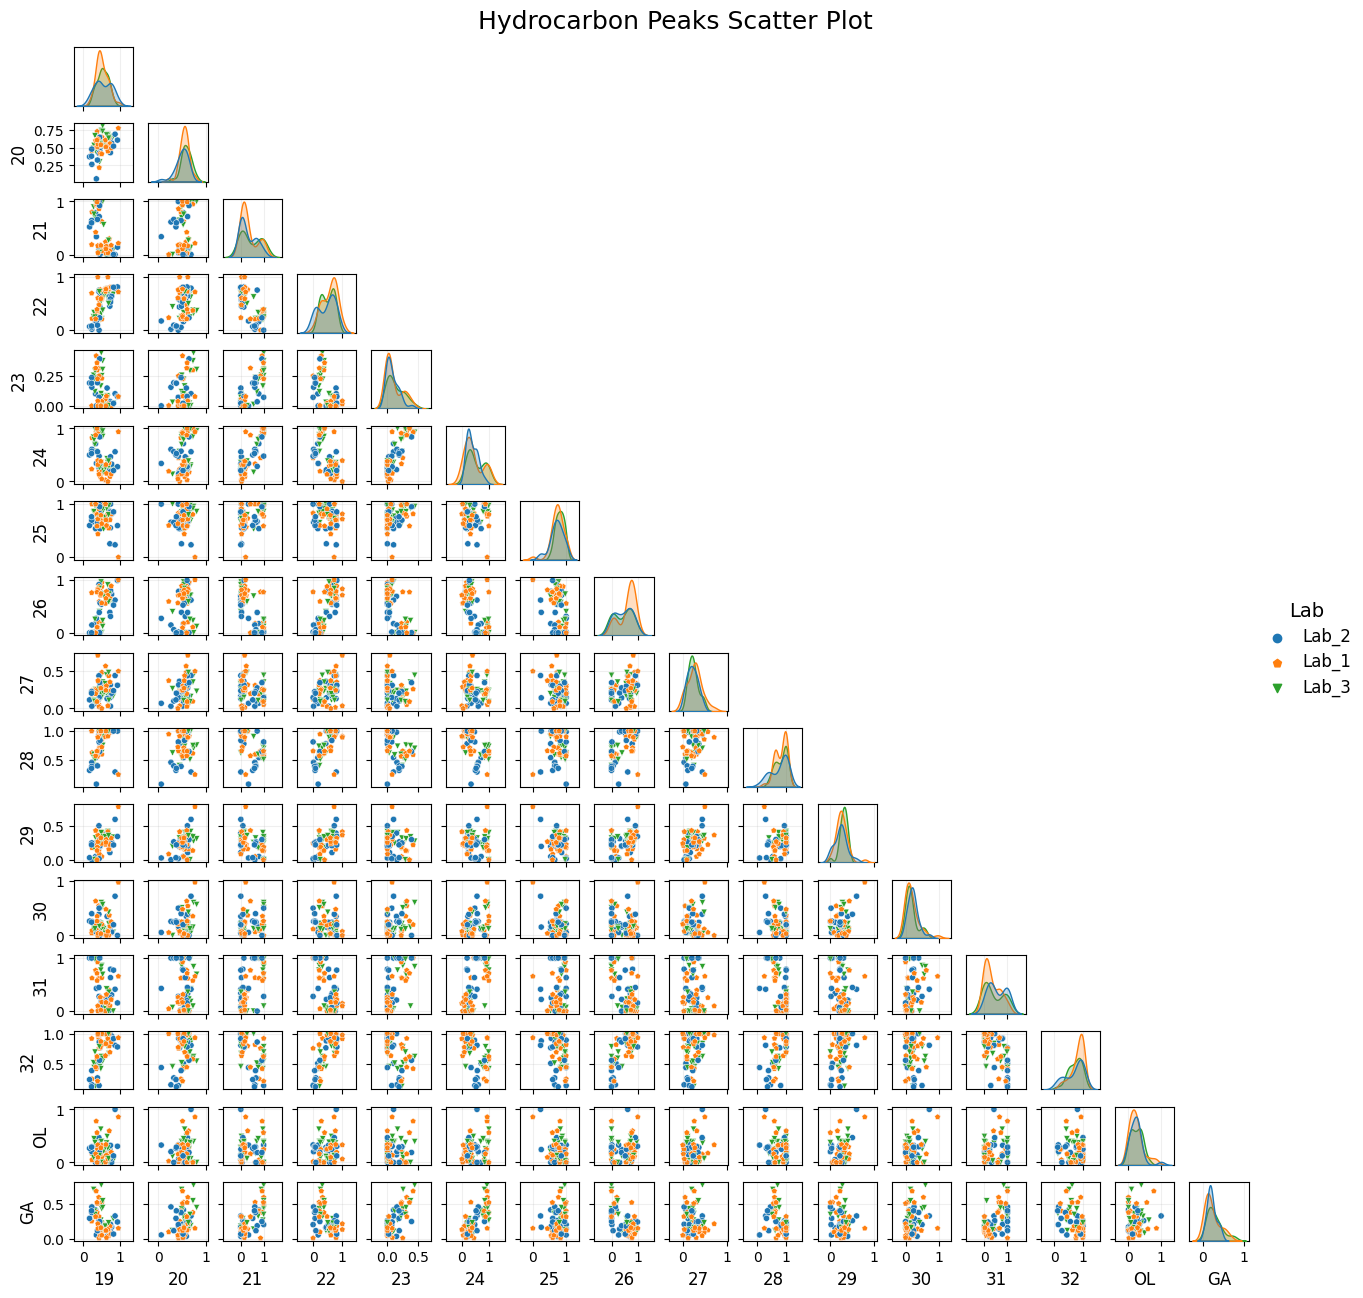

In [70]:
# plot the scatter plot
scatter_plot(data=X_scaled_test, categories=source.Lab)

The crossplots show an overlap of the cluster space for all three labs after the sample-wise scaling.

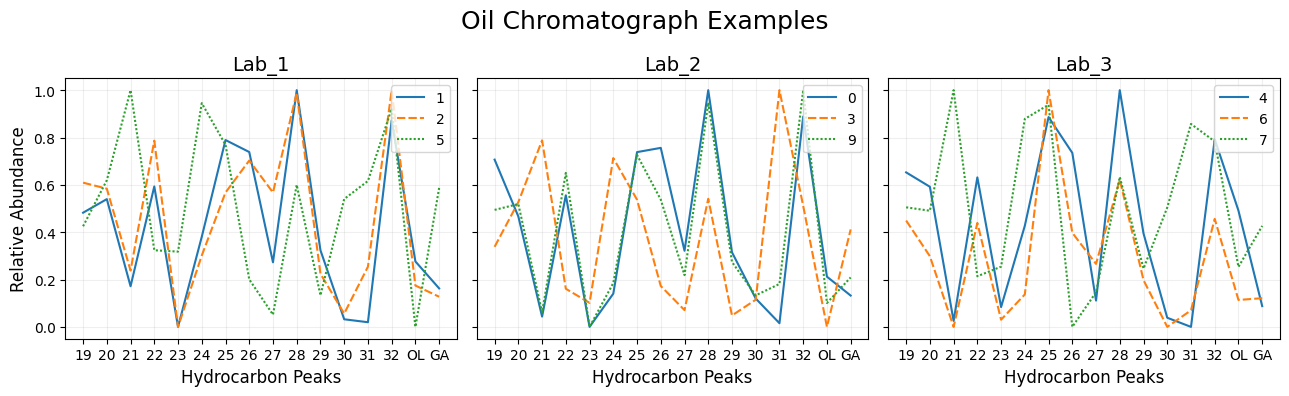

In [71]:
# plot the chromatograph of the first three samples
chromatograph_plot(data=X_scaled_test, categories=source.Lab, n_samples=3)

The scale imbalance has been eliminated, with all three labs now showing a common data range for samples drawn from each of them.

Despite scaling the samples, the chromatographs maintain their original trends, which ensures the preservation of their signature.

### 4.2 Covariance Estimation

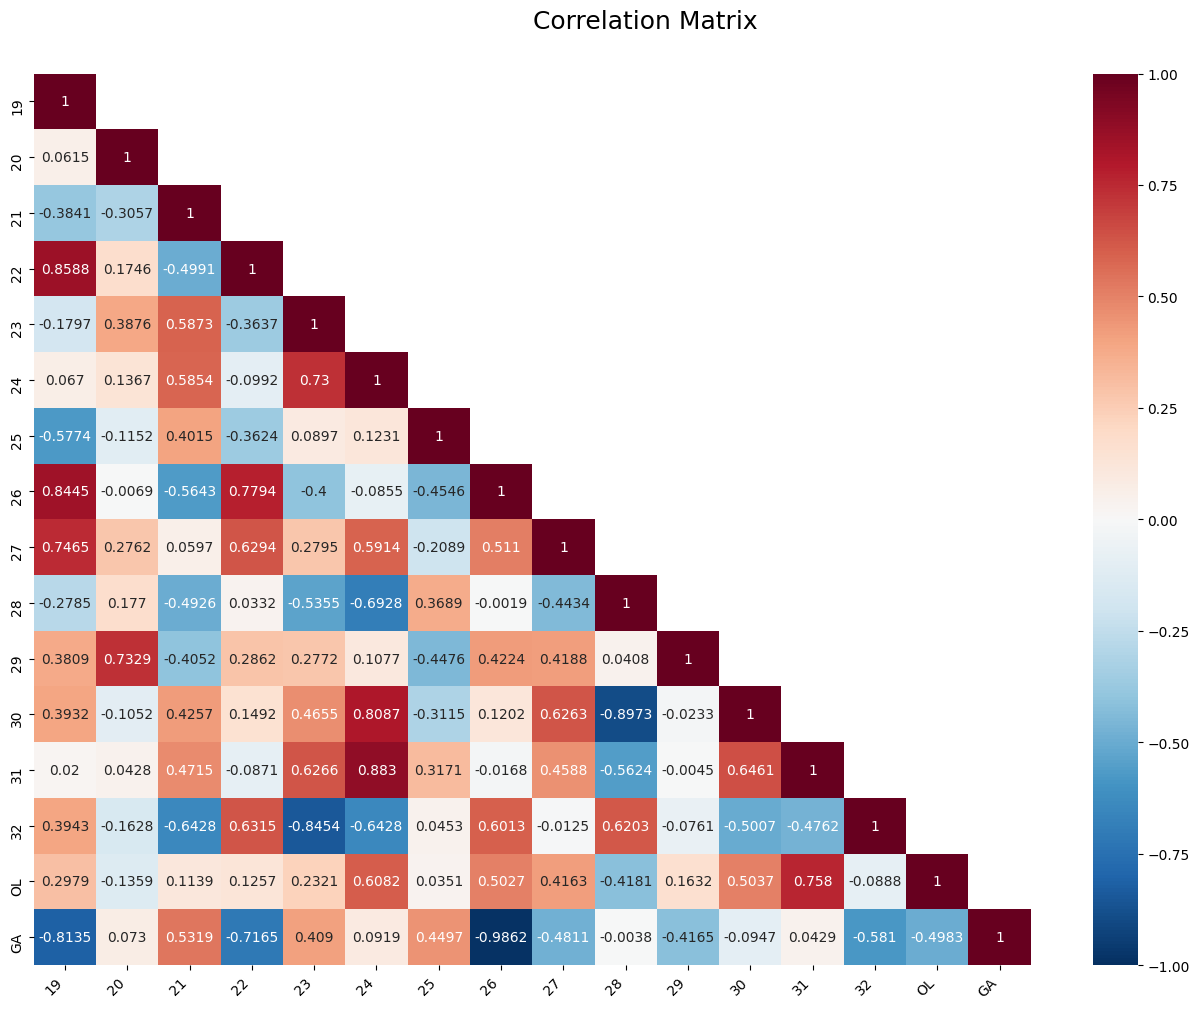

In [72]:
# plot the heat map of the correlation matrix of the scaled features
corr_mat = np.round(synth_scaled.corr(method='spearman'), decimals=4)
corr_mask = np.triu(synth_scaled.corr(method='spearman'), k=1)

fig = plt.figure(figsize=(13, 10))
ax = sns.heatmap(corr_mat, vmin=-1, vmax=1, 
                 cmap='RdBu_r', center=0, 
                 annot=True, fmt='.4g', 
                 square=False, mask=corr_mask)
ax.set_xticklabels(ax.get_xticklabels(), rotation='45', ha='right')

plt.suptitle(y=1.005, t='Correlation Matrix', size=18)
plt.tight_layout()

The correlation matrix shows weak to strong positive and negative correlations between features.

Some of the features show strong positive correlation (e.g., 22-19 and 31-24) and negative correlation (e.g., GA-26 and 30-26).

## 5. Dimensionality Reduction

### 5.1 t-distributed Stochastic Neighbor Embedding

In [73]:
from sklearn.manifold import TSNE

To aid a visualization of the class sepration, t-dustributed Stochastic Neigbor Embedding (t-SNE) will be used to project the high dimesional features (16 dimensions) to a 2D manifold.

t-SNE is a non-linear dimensionality reduction technique useful for embedding linearly non-separable data. 

It enables decomposition of the hidden structure in complex data and reveals inherent natural clusters.

In [74]:
# create a function for performing t-SNE of the train, validation or test sets
def t_sne(X_data):
    # X_data: train, validation or test features
    
    t_sne = TSNE(n_components=2, perplexity=30.0, early_exaggeration=12.0, 
                 learning_rate='auto', n_iter=1000, init='pca', 
                 random_state=1234, angle=0.5).fit_transform(X_data)
    t_sne = pd.DataFrame(t_sne, index=X_data.index, columns=['t_SNE_1', 't_SNE_2'])
    
    return t_sne

In [75]:
# perform t-SNE of the train set
X_tsne_train = t_sne(X_data=X_scaled_train)

In [76]:
# perform t-SNE of the validation set
X_tsne_valid = t_sne(X_data=X_scaled_valid)

In [77]:
# perform t-SNE of the test set
X_tsne_test = t_sne(X_data=X_scaled_test)

In [78]:
# merge the train and validation sets
X_tsne = pd.concat([X_tsne_train, X_tsne_valid], axis=0)
X_tsne = X_tsne.sort_index()
X_tsne.head()

t_SNE_1    t_SNE_2
0   6.568320  78.814560
1  11.405511  53.047813
2  42.477531  51.051579
3 -16.361721  41.387840
4  -8.068233  37.065636

In [79]:
# merge the features and target
synth_tsne = pd.concat([X_tsne.copy(), y_synth], axis=1)
synth_tsne.head()

t_SNE_1    t_SNE_2        family
0   6.568320  78.814560  I_Ordovician
1  11.405511  53.047813  I_Ordovician
2  42.477531  51.051579  I_Ordovician
3 -16.361721  41.387840  I_Ordovician
4  -8.068233  37.065636  I_Ordovician

In [80]:
# create a function for plotting the 2D t-SNE manifold to view the natural clusters of the target
def t_sne_plot(embedded_X, categories, which, figsize, nrows, ncols):
    # embedded_X: embedded features
    # categories: categorical data to be visualized
    # which: data type to plot (one of 'true', 'predicted' or 'both')
    # figsize: size of the figure (tuple)
    # nrows: number of rows
    # ncols: number of columns
    
    
    max_value = np.ceil(np.array([embedded_X.max().max(), embedded_X.min().min()*-1]).max())
    max_value = max_value + max_value*0.1
    markers = {'I_Ordovician': 'o', 
               'I_Lacustrine': 'h', 
               'II_Marine': 'v', 
               'III_Deltaic': 'p'}
    keys = categories.columns
    order = np.unique(categories)[::-1]
            
    if which in ['true', 'predicted']:    
        fig, axs = plt.subplots(figsize=figsize, nrows=nrows, ncols=ncols)

        for i, ax, in enumerate(fig.axes):
            classes = categories.iloc[:, i]
            #n_classes = len(np.unique(classes))
            sns.scatterplot(data=embedded_X, 
                            x='t_SNE_1', y='t_SNE_2', 
                            hue=classes, style=classes, 
                            hue_order=order, style_order=order,
                            markers=markers, ax=ax)
            ax.set_xlim([-max_value, max_value])
            ax.set_ylim([-max_value, max_value])
            ax.set_aspect('equal')
            ax.set_xlabel(ax.get_xlabel(), size=12)
            ax.set_ylabel(ax.get_ylabel(), size=12)
            ax.set_title(keys[i], size=14)
            ax.grid(alpha=0.2)
            ax.legend(fontsize='small')

    elif which == 'both':  
        fig, axs = plt.subplots(figsize=(4.333*ncols, 4.333*nrows), nrows=nrows, ncols=ncols)

        for i, ax, in enumerate(fig.axes):
            if i == 0:
                classes = categories.iloc[:, i]
                #n_classes = len(np.unique(classes))
                sns.scatterplot(data=embedded_X, 
                                x='t_SNE_1', y='t_SNE_2', 
                                hue=classes, style=classes, 
                                markers=markers, ax=ax)
                ax.set_xlim([-max_value, max_value])
                ax.set_ylim([-max_value, max_value])
                ax.set_aspect('equal')
                ax.set_xlabel(ax.get_xlabel(), size=12)
                ax.set_ylabel(ax.get_ylabel(), size=12)
                ax.set_title(keys[i], size=14)
                ax.grid(alpha=0.2)
                ax.legend(fontsize='small')
            elif i in [1, 2]:
                ax.set_axis_off()
            else:
                classes = categories.iloc[:, i-2]
                #n_classes = len(np.unique(classes))
                sns.scatterplot(data=embedded_X, 
                                x='t_SNE_1', y='t_SNE_2', 
                                hue=classes, style=classes, 
                                markers=markers, ax=ax)
                ax.set_xlim([-max_value, max_value])
                ax.set_ylim([-max_value, max_value])
                ax.set_aspect('equal')
                ax.set_xlabel(ax.get_xlabel(), size=12)
                ax.set_ylabel(ax.get_ylabel(), size=12)
                ax.set_title(keys[i-2], size=14)
                ax.grid(alpha=0.2)
                ax.legend(fontsize='small')
                
    else:
        print('Must provide a data type to plot (one of {}, {} or {})'.format('true', 'predicted', 'both'))

    if nrows > 1:
        plt.suptitle(y=1.005, t='t-SNE Manifolds', ha='center', size=18)
        plt.tight_layout(h_pad=3.0)
    else:
        plt.suptitle(x=0.55, t='t-SNE Manifold', ha='center', size=18)
        plt.tight_layout()

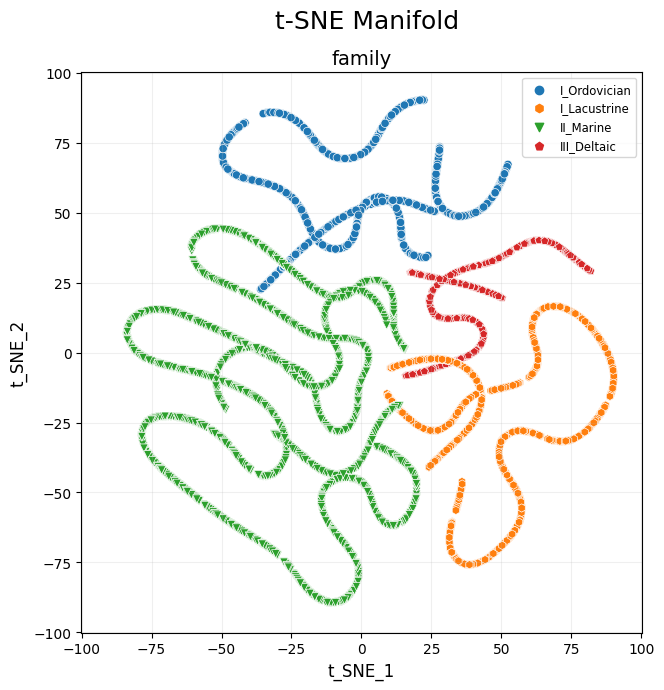

In [81]:
# plot the 2D t-SNE manifold (train and validation sets)
t_sne_plot(embedded_X=X_tsne, 
           categories=y_synth, 
           which='true', 
           figsize=(7, 7), 
           nrows=1, 
           ncols=1)

The class seperation for the train and validation set can easily be visualized on the 2D t-SNE manifold.

Each class occupies a certain region of the cross plot with some overlap.

## 6. Supervised Classification

### 6.1 Model Selection and Evaluation

In [82]:
from sklearn.pipeline import make_pipeline
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import balanced_accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import learning_curve

In [83]:
# specify the train and validation sets
X_train, X_valid = X_scaled_train, X_scaled_valid
y_train, y_valid = y_train, y_valid
print('Train Features Size: {}'.format(X_train.shape))
print('Train Target Size: {}'.format(y_train.shape))
print('Validation Features Size: {}'.format(X_valid.shape))
print('Validation Target Size: {}'.format(y_valid.shape))

Train Features Size: (8000, 16)
Train Target Size: (8000, 1)
Validation Features Size: (2000, 16)
Validation Target Size: (2000, 1)


In [84]:
# specify the test set
X_test = X_scaled_test
print('Test Features Size: {}'.format(X_test.shape))

Test Features Size: (80, 16)


#### 6.1.1 Cross-Validation and Hyper-Parameterization

For the supervised classification, several generic and ensemble algorithms will be trained and compared.

There are four target classes in the dataset, and so this will be treated as a mulitclass classifcation task.

The One-versus-Rest (OvR) strategy will be used, in which a single estimator will be fitted per class in a binary classification fashion.

For each class, data from that class is treated as positive, while data from all other classes is treated as negative.

This has the benefit of being able to evaluate the performance of the models on each class.

Especially with class imbalanced data, where a predictive model may be biased towards classes with more sample weight.

##### 6.1.1.1 Model Training

In [85]:
# specify the estimators
estimators = [LogisticRegression(random_state=1234), 
              GaussianNB(), 
              SVC(probability=True, random_state=1234), 
              KNeighborsClassifier(), 
              DecisionTreeClassifier(random_state=1234), 
              RandomForestClassifier(random_state=1234), 
              ExtraTreesClassifier(random_state=1234), 
              GradientBoostingClassifier(random_state=1234), 
              HGBClassifier(random_state=1234), 
              XGBClassifier(verbosity=0, random_state=1234), 
              LGBMClassifier(random_state=1234), 
              CatBoostClassifier(verbose=0, random_state=1234)]

# specify the names of the estimators
estimator_names = ['Logistic', 
                   'Naive_Bayes', 
                   'SVM', 
                   'KNN', 
                   'Decision_Tree', 
                   'Random_Forest', 
                   'Extra_Trees', 
                   'Gradient_Boost', 
                   'Histogram_GBM', 
                   'Extreme_GBM', 
                   'Light_GBM', 
                   'Cat_Boost']

In [86]:
# create a function for training the models
def model_train(estimators, estimator_names, X_train, y_train, X_valid, y_valid):
    # estimators: list of estimators
    # estimator_names: list of estimator names 
    # X_train: training features
    # y_train: training target
    # X_valid: validating features
    # y_valid: validating target 

    models = []
    scores = []
    ests = [est for est in estimators]

    for i in range(len(estimators)):
        print()
        print('*******{} Estimator Training*******'.format(estimator_names[i]))
        start_time = time.time()
        ests[i] = make_pipeline(OneVsRestClassifier(estimators[i]))
        models.append(ests[i].fit(X=X_train, y=y_train))
        scores.append(models[i].score(X=X_valid, y=y_valid))
        
        print(f'Validation Score (Accuracy): {scores[i]}')

        end_time = time.time()
        print(f'Training time: {end_time - start_time} seconds')
    
    return models, scores

In [87]:
# model training
models, scores = model_train(estimators=estimators, 
                             estimator_names=estimator_names, 
                             X_train=X_train, 
                             y_train=y_train, 
                             X_valid=X_valid, 
                             y_valid=y_valid)


*******Logistic Estimator Training*******
Validation Score (Accuracy): 1.0
Training time: 0.21936726570129395 seconds

*******Naive_Bayes Estimator Training*******
Validation Score (Accuracy): 1.0
Training time: 0.07789397239685059 seconds

*******SVM Estimator Training*******
Validation Score (Accuracy): 1.0
Training time: 1.5116305351257324 seconds

*******KNN Estimator Training*******
Validation Score (Accuracy): 1.0
Training time: 0.31940722465515137 seconds

*******Decision_Tree Estimator Training*******
Validation Score (Accuracy): 1.0
Training time: 0.20469188690185547 seconds

*******Random_Forest Estimator Training*******
Validation Score (Accuracy): 1.0
Training time: 3.3439948558807373 seconds

*******Extra_Trees Estimator Training*******
Validation Score (Accuracy): 1.0
Training time: 1.3268957138061523 seconds

*******Gradient_Boost Estimator Training*******
Validation Score (Accuracy): 1.0
Training time: 8.26564884185791 seconds

*******Histogram_GBM Estimator Training**

##### 6.1.1.2 Model Prediction

In [88]:
# create a function for predicting on the validation or test set
def model_pred(X_data, est_fit, estimator_names):
    # X_data: validation or test features
    # est_fit: fitted estimators to use for prediction
    # estimator_names: list of estimators
    
    y_pred = pd.DataFrame(index=X_data.index, columns=estimator_names)

    for i, est in enumerate(estimator_names):
        print()
        print('*******{} Estimator Prediction*******'.format(estimator_names[i]))
        start_time = time.time()

        y_pred[est] = est_fit[i].predict(X_data)

        end_time = time.time()
        print(f'Predicting time: {end_time - start_time} seconds')
        
    return y_pred

In [89]:
# model predictions
y_pred = model_pred(X_data=X_valid, 
                    est_fit=models, 
                    estimator_names=estimator_names)


*******Logistic Estimator Prediction*******
Predicting time: 0.013962268829345703 seconds

*******Naive_Bayes Estimator Prediction*******
Predicting time: 0.01795196533203125 seconds

*******SVM Estimator Prediction*******
Predicting time: 0.05181527137756348 seconds

*******KNN Estimator Prediction*******
Predicting time: 0.2763197422027588 seconds

*******Decision_Tree Estimator Prediction*******
Predicting time: 0.017951011657714844 seconds

*******Random_Forest Estimator Prediction*******
Predicting time: 0.20851826667785645 seconds

*******Extra_Trees Estimator Prediction*******
Predicting time: 0.1628131866455078 seconds

*******Gradient_Boost Estimator Prediction*******
Predicting time: 0.02493453025817871 seconds

*******Histogram_GBM Estimator Prediction*******
Predicting time: 0.08166670799255371 seconds

*******Extreme_GBM Estimator Prediction*******
Predicting time: 0.041887760162353516 seconds

*******Light_GBM Estimator Prediction*******
Predicting time: 0.05086350440979

#### 6.1.2 Metrics and Scoring

Classification metrics give an insight into the predictive performance of classifier models. 

They also indicate the neccesary changes required to improve the performance of the models.

Some metrics are better suited to specific case scenarios while others provides a general look into the quality of predictions.

A good understanding of which metrics to use and when to use them is required for a meaningful evaluation of machine learning models.

Several of such metric scores and plots will be used to evaluate the classifier models built.

##### 6.1.2.1 Confusion Matrix

The confusion matrix enables a visual evaluation of model accuracy or misclassification (i.e confusing labels).

The right diagonal (top-left to bottom-right) of the multiclass confusion matrix represents the volume of accurate or correct predictions.

The off right diagonal respresents the volume of misclassification for each class, indicating the labels for which the true classes are being confused by the prediction.

In [90]:
# create a function for plotting the heat map of the confusion matrices of the models
def model_matrix(y_valid, y_pred, estimator_names):
    # y_valid: validation target
    # y_pred: prediction targets
    # estimator_names: list of estimators
    
    cfx_mats = []        
    
    fig, axs = plt.subplots(figsize=(13, 15), nrows=4, ncols=3)

    for (i, ax), est in zip(enumerate(fig.axes), estimator_names): 
        
        cfx_mats.append(confusion_matrix(y_valid, y_pred[est]))
        
        sns.heatmap(cfx_mats[i], vmin=0, vmax=y_valid.value_counts().max(), 
                    cmap='RdBu_r', center=0, 
                    annot=True, fmt='.4g', 
                    linewidths=0.005, linecolor='k', 
                    square=True, 
                    xticklabels=models[i].classes_, yticklabels=models[i].classes_, 
                    ax=ax)
        
        ax.set_xticklabels(ax.get_xticklabels(), rotation='45', ha='right')
        ax.set_yticklabels(ax.get_yticklabels(), rotation='0', ha='right')
        ax.set_xlabel('Predicted', size=12)
        ax.set_ylabel('True', size=12)
        ax.set_title(est, size=14)
        
        ax.spines['right'].set_visible(True)
        ax.spines['top'].set_visible(True)
        ax.spines['left'].set_visible(True)
        ax.spines['bottom'].set_visible(True)

    plt.suptitle(y=1.005, t='Confusion Matrices', size=18)
    plt.tight_layout(h_pad=3.0)

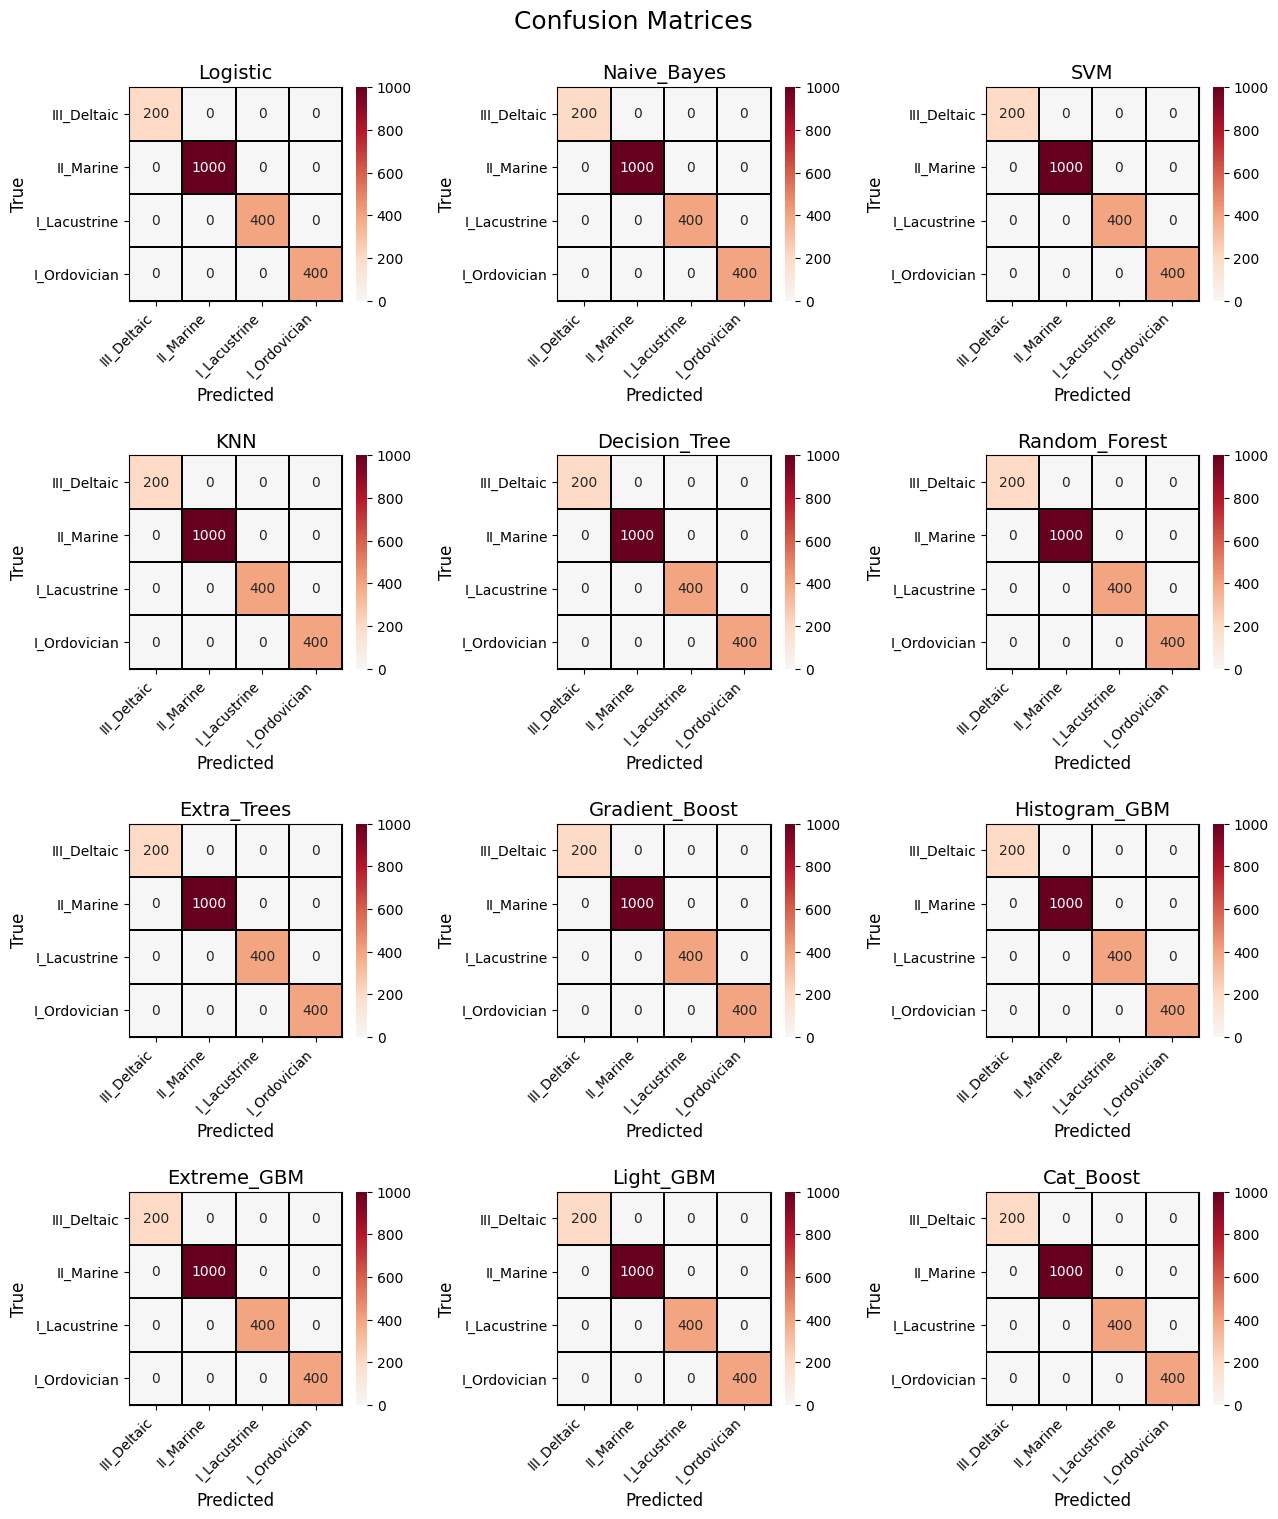

In [91]:
# model confusion matrices
model_matrix(y_valid=y_valid, 
             y_pred=y_pred, 
             estimator_names=estimator_names)

All classes are 100% accurately predicted by all the models, as can be observed in the count of the right diagonals.

##### 6.1.2.2 Metric Score

$ \Large\ Accuracy = \frac{TP + TN} {TP + FN + TN + FP} $

The Accuracy score is simply the ratio of correct predictions (TP and TN) to the total number of predictions (TP, FN, TN, and FP).

Accuracy is a suitable metric for balanced classes, but may be misleading when applied to imbalanced data.

<br>
<br>
$ \Large\ Precision = \frac{TP} {TP + FP} $

The Precision score (also Positive Predictive Value [PPV]) is simply the ratio of true positives (TP) to the total number of positive predictions (TP and FP).

Precision is better suited to balanced classes, and is applied when false positives (FP) is of greater concern than false negatives (FN).

<br>
<br>
$ \Large\ Recall = \frac{TP} {TP + FN} $

The Recall score (also Sensitivity or True Positive Rate) is simply the ratio of TP to the total number of actual positives (TP and FN).

Recall is better suited to balanced classes, and is applied when FN is of greater concern than FP.

<br>
<br>
$ \Large\ F\text{-}measure = 2 * \frac{Precision * Recall} {Precision + Recall} $

The F-measure score (also F1-score or F-score) is simply the harmonic mean of Precision and Recall.

F-measure balances the importance of precision and recall, and is applied when FP and FN are equally of concern.

A poor precision or recall will result in a penalized F-measure, so that both scores must be maximized to maximize the F-measure. 

If both precision and recall are minimum, the F-measure is also minimum, and vice versa.

In [92]:
# create a function for generating all metric scores for each method
def model_metric(y_valid, y_pred, estimator_names):
    # y_valid: validation target
    # y_pred: prediction targets
    # estimator_names: list of estimators
    
    metrics = [[] for i in range(4)]
    
    metric_names = ['Accuracy', 'Precision', 'Recall', 'F-measure']
    
    for est in estimator_names:
        metrics[0].append(balanced_accuracy_score(y_valid, y_pred[est]))
        metrics[1].append(precision_score(y_valid, y_pred[est], average='weighted'))
        metrics[2].append(recall_score(y_valid, y_pred[est], average='weighted'))
        metrics[3].append(f1_score(y_valid, y_pred[est], average='weighted'))
        
    metrics = pd.DataFrame(np.asarray(metrics).T, index=estimator_names, columns=metric_names)
    
    return metrics

In [93]:
# model metric scores
metrics = model_metric(y_valid=y_valid, 
                       y_pred=y_pred, 
                       estimator_names=estimator_names)
metrics.style.highlight_max(color='pink')

All models perfomed excellenty on the validation set as indicated by the perfect score for all metrics used in evaluation.

##### 6.1.2.3 Receiver Operating Characteristic (ROC) Curve

The Receiver Operating Characteristic (ROC) curve is a graphical plot indicating the diagnostic ability of a binary classifier at varied decision thresholds.

The decision threshold refers to the cut-off point or probability mark for class assignment from the probilistic output of a classifier. 

The ROC graph is a plot of the True Positive Rate (TPR) or Recall versus the False Positive Rate (FPR) or complement of Specificity.

An ROC curve above the left diagonal (upper-right to bottom-left) performs better than random prediction and vice versa.

A perfect classifier has coordinates at the upper-left corner of the plot at which TPR is maximum and FPR is minimum.

The ROC Area Under Curve (ROC AUC) summarizes the quality of the classifier, which ranges between 0 and 1.

An AUC of 0.5 indicates an uninformative classifier while an AUC of 1.0 indicates a perfect classifier. 

In [94]:
# create a function for performing label binarization of the validation set
def binarize(y_train, y_valid):
    # y_train: training features
    # y_valid: validating features
    
    binary_fit = LabelBinarizer().fit(y_train)
    y_valid_bin = binary_fit.transform(y_valid)
    y_valid_bin = pd.DataFrame(y_valid_bin, 
                               index=y_valid.index, 
                               columns=y_valid[targ].unique())
    return y_valid_bin

In [95]:
# perform label binarization of the validation set
y_valid_bin = binarize(y_train=y_train, 
                       y_valid=y_valid)
y_valid_bin.head()

III_Deltaic  II_Marine  I_Ordovician  I_Lacustrine
2828            1          0             0             0
8564            0          1             0             0
9924            0          1             0             0
1127            0          0             0             1
2250            1          0             0             0

In [96]:
# create a function for obtaining the probability estimates for each method
def model_proba(X_valid, est_fit, estimator_names):
    # X_valid: validation features
    # est_fit: fitted estimators to use for probability estimation
    # estimator_names: list of estimators
    
    classes = np.sort(y_train[targ].unique())
    pair_names = [[] for i in range(len(estimator_names))]
    
    for i, est in enumerate(estimator_names):
        for j, cls in enumerate(classes):
            pair_names[i].append(est+f'_{cls}')
    
    y_proba = pd.DataFrame(index=X_valid.index, columns=np.asarray(pair_names).reshape(-1))

    for i, est_pair in enumerate(pair_names):
        y_proba[est_pair] = est_fit[i].predict_proba(X_valid)
        
    return y_proba

In [97]:
# model probability estimates
y_proba = model_proba(X_valid=X_valid, 
                      est_fit=models, 
                      estimator_names=estimator_names)
y_proba.head()

Logistic_III_Deltaic  Logistic_II_Marine  Logistic_I_Lacustrine  \
2828              0.990807            0.000718               0.002901   
8564              0.000519            0.998338               0.000595   
9924              0.000622            0.998459               0.000591   
1127              0.000920            0.000515               0.000587   
2250              0.982728            0.001488               0.011034   

      Logistic_I_Ordovician  Naive_Bayes_III_Deltaic  Naive_Bayes_II_Marine  \
2828               0.005575             1.000000e+00                    0.0   
8564               0.000548            1.033598e-204                    1.0   
9924               0.000328            3.388745e-208                    1.0   
1127               0.997977            1.322582e-244                    0.0   
2250               0.004749             1.000000e+00                    0.0   

      Naive_Bayes_I_Lacustrine  Naive_Bayes_I_Ordovician  SVM_III_Deltaic  \
2828                       0.0             3.254337e-222         0.999401   
8564                       0.0              0.000000e+00         0.000117   
9924                       0.0              0.000000e+00         0.000117   
1127                       0.0              1.000000e+00         0.000082   
2250                       0.0             8.904447e-307         0.999400   

      SVM_II_Marine  ...  Extreme_GBM_I_Lacustrine  Extreme_GBM_I_Ordovician  \
2828       0.000228  ...                  0.000158                  0.000170   
8564       0.999583  ...                  0.000127                  0.000127   
9924       0.999543  ...                  0.000163                  0.000127   
1127       0.000243  ...                  0.000126                  0.997610   
2250       0.000240  ...                  0.000212                  0.000170   

      Light_GBM_III_Deltaic  Light_GBM_II_Marine  Light_GBM_I_Lacustrine  \
2828               0.999960             0.000022                0.000009   
8564               0.000005             0.999978                0.000009   
9924               0.000005             0.999978                0.000009   
1127               0.000005             0.000022                0.000009   
2250               0.999960             0.000022                0.000009   

      Light_GBM_I_Ordovician  Cat_Boost_III_Deltaic  Cat_Boost_II_Marine  \
2828                0.000009               0.998568             0.000525   
8564                0.000009               0.000023             0.999898   
9924                0.000009               0.000033             0.999844   
1127                0.999965               0.001284             0.000370   
2250                0.000009               0.998176             0.000722   

      Cat_Boost_I_Lacustrine  Cat_Boost_I_Ordovician  
2828                0.000271                0.000636  
8564                0.000036                0.000043  
9924                0.000049                0.000075  
1127                0.000145                0.998200  
2250                0.000365                0.000737  

[5 rows x 48 columns]

In [98]:
# create a function for computing the ROC curves and ROC areas
def model_roc(binarized_y_valid, y_proba, estimator_names):
    # binarized_y_valid: binarized validation target
    # y_proba: probability estimates
    # estimator_names: list of estimators
    
    classes = np.sort(y_train[targ].unique())
    pair_names = [[] for i in range(len(estimator_names))]

    for i, est in enumerate(estimator_names):
        for j, cls in enumerate(classes):
            pair_names[i].append(est+f'_{cls}')    
    
    fprs = [dict() for est in range(len(estimator_names))]
    tprs = [dict() for est in range(len(estimator_names))]
    thds = [dict() for est in range(len(estimator_names))]
    roc_aucs = [dict() for est in range(len(estimator_names))]
    
    all_fprs = [est for est in range(len(estimator_names))]
    new_tprs = [dict() for est in range(len(estimator_names))]
    new_thds = [dict() for est in range(len(estimator_names))]
    
    # compute the per class ROC curves and ROC areas
    for i, est_pair in enumerate(pair_names):
        for j, cls in enumerate(classes):
            # per class roc
            fprs[i][cls], tprs[i][cls], thds[i][cls] = roc_curve(binarized_y_valid.iloc[:, j], 
                                                                 y_proba[est_pair].iloc[:, j])
            roc_aucs[i][cls] = auc(fprs[i][cls], tprs[i][cls]) # OR roc_auc_score(binarized_y_valid.iloc[:, j], y_proba[est_pair].iloc[:, j], multi_class='ovr')
        
        # aggregate the per class false positive rates
        all_fprs[i] = np.unique(np.concatenate([fprs[i][cls] for cls in classes]))
        
    # compute the average ROC curves and ROC areas
    for i, est_pair in enumerate(pair_names):
        for j, cls in enumerate(classes):
            # interpolate the per class true positive rates
            new_tprs[i][cls] = np.interp(all_fprs[i], fprs[i][cls], tprs[i][cls])
            new_thds[i][cls] = np.interp(all_fprs[i], fprs[i][cls], thds[i][cls].astype('float64'))
        
        # macro-average roc
        fprs[i]['macro'] = all_fprs[i]
        tprs[i]['macro'] = np.vstack([new_tprs[i][cls] for cls in classes]).mean(axis=0)
        thds[i]['macro'] = np.vstack([new_thds[i][cls] for cls in classes]).mean(axis=0)
        roc_aucs[i]['macro'] = np.vstack([roc_aucs[i][cls] for cls in classes]).mean(axis=0)[0]
        
        # micro-average roc
        fprs[i]['micro'], tprs[i]['micro'], thds[i]['micro'] = roc_curve(binarized_y_valid.to_numpy().ravel(), 
                                                                         y_proba[est_pair].to_numpy().ravel())
        roc_aucs[i]['micro'] = auc(fprs[i]['micro'], tprs[i]['micro'])
        
    # plot the ROC curves and ROC areas
    fig, axs = plt.subplots(figsize=(13, 15), nrows=4, ncols=3)

    line_colors = cm.get_cmap('tab10').colors + cm.get_cmap('Dark2').colors

    for (i, ax), est in zip(enumerate(fig.axes), estimator_names):
        for j, key in enumerate(np.append(classes, ['macro', 'micro'])):
            if key in classes:
                ax.plot(fprs[i][key], 
                        tprs[i][key], 
                        color=line_colors[j], 
                        label='ROC curve of class {0} (area = {1:0.2f})'.format(key, roc_aucs[i][key]))
            elif key in ['macro', 'micro']:
                ax.plot(fprs[i][key], 
                        tprs[i][key], 
                        color=line_colors[j], 
                        label='{0}-average ROC curve (area = {1:0.2f})'.format(key, roc_aucs[i][key]))
            ax.plot([0, 1], [0,1], ls='--', c='k')
            #ax.set_aspect('equal')
            ax.set_xlabel('False Positive Rate', size=12)
            ax.set_ylabel('True Positive Rate', size=12)
            ax.set_title(est, size=14)
            ax.grid(b=True, alpha=0.2)
            ax.legend(fontsize='small', loc='lower right')
            
    plt.suptitle(y=1.005, t='Receiver Operating Characteristic (ROC) Curves', size=18)
    plt.tight_layout(w_pad=3.0, h_pad=3.0)

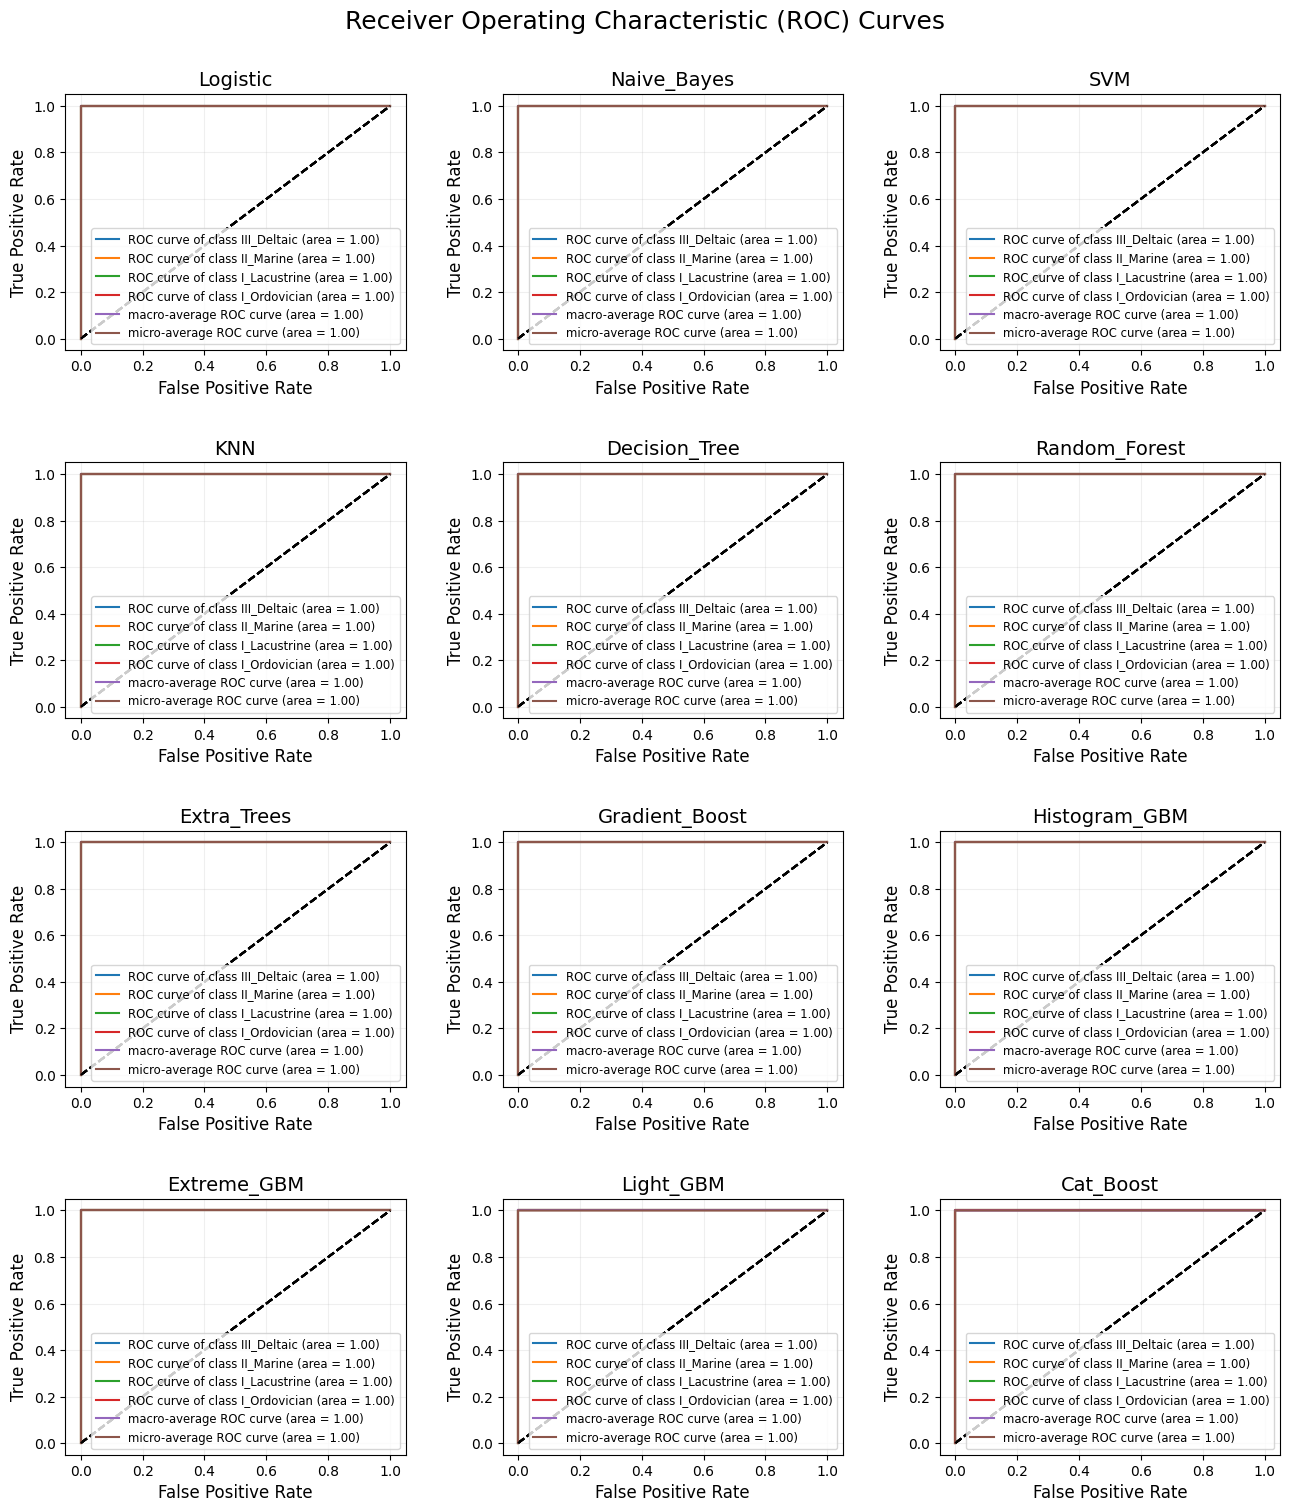

In [99]:
# ROC curves
model_roc(binarized_y_valid=y_valid_bin, 
          y_proba=y_proba, 
          estimator_names=estimator_names)

All models have an AUC of 1, indicating they performed excellently well on the validation set.

#### 6.1.3 Validation Curves

##### 6.1.3.1 Learning Curve

The learning curves reaveal the performance of a model with increasing volume of data.

This aids an understanding of whether a model is suffering from bias error or variance error.

In [100]:
# create a function for plotting the learning curves
def learn_curve(est_fit, X_train, y_train, estimator_names):
    # est_fit: fitted estimators to be examined 
    # X_train: training features
    # y_train: training target
    # estimator_names: list of estimators
    
    train_sizes = [i for i in range(len(est_fit))] 
    train_scores = [i for i in range(len(est_fit))] 
    val_scores = [i for i in range(len(est_fit))] 
    fit_times = [i for i in range(len(est_fit))] 
    score_times = [i for i in range(len(est_fit))]
    
    for i in range(len(est_fit)):

        (train_sizes[i], train_scores[i], val_scores[i], 
         fit_times[i], score_times[i]) = learning_curve(estimator=est_fit[i], X=X_train, y=y_train, 
                                                        train_sizes=[0.25, 0.50, 0.75, 1.0], cv=3, 
                                                        scoring='balanced_accuracy', exploit_incremental_learning=False, 
                                                        verbose=0, shuffle=False, random_state=1234, error_score=np.nan, 
                                                        return_times=True, fit_params=None)

    train_scores_mean = [np.mean(est, axis=1) for est in train_scores]
    val_scores_mean = [np.mean(est, axis=1) for est in val_scores]
    fit_times_mean = [np.mean(est, axis=1) for est in fit_times]
    score_times_mean = [np.mean(est, axis=1) for est in score_times]

    train_scores_mean_df = pd.DataFrame(np.array(train_scores_mean).T, index=train_sizes[0], columns=estimator_names)
    val_scores_mean_df = pd.DataFrame(np.array(val_scores_mean).T, index=train_sizes[0], columns=estimator_names)
    fit_times_mean_df = pd.DataFrame(np.array(fit_times_mean).T, index=train_sizes[0], columns=estimator_names)
    score_times_mean_df = pd.DataFrame(np.array(score_times_mean).T, index=train_sizes[0], columns=estimator_names)

    train_scores_std = [np.std(est, axis=1) for est in train_scores]
    val_scores_std = [np.std(est, axis=1) for est in val_scores]
    fit_times_std = [np.std(est, axis=1) for est in fit_times]
    score_times_std = [np.std(est, axis=1) for est in score_times]

    train_scores_std_df = pd.DataFrame(np.array(train_scores_std).T, index=train_sizes[0], columns=estimator_names)
    val_scores_std_df = pd.DataFrame(np.array(val_scores_std).T, index=train_sizes[0], columns=estimator_names)
    fit_times_std_df = pd.DataFrame(np.array(fit_times_std).T, index=train_sizes[0], columns=estimator_names)
    score_times_std_df = pd.DataFrame(np.array(score_times_std).T, index=train_sizes[0], columns=estimator_names)
        
    # plot the learning curves
    fig, axs = plt.subplots(nrows=len(est_fit), ncols=3, figsize=(13, 3.0*len(est_fit)))
    
    titles = ['Learning Curve', 'Scalability', 'Performance']
    
    for i in range(len(train_sizes)):
        for j in range(3):
            # learning curve
            if j == 0:
                axs[i,j].plot(train_sizes[i], train_scores_mean_df.iloc[:,i], label='Training Score', c='r', marker='o')
                axs[i,j].plot(train_sizes[i], val_scores_mean_df.iloc[:,i], label='Validation Score', c='g', marker='o')
                axs[i,j].fill_between(train_sizes[i], train_scores_mean_df.iloc[:,i] - train_scores_std_df.iloc[:,i], 
                                      train_scores_mean_df.iloc[:,i] + train_scores_std_df.iloc[:,i], alpha=0.1, color='r')
                axs[i,j].fill_between(train_sizes[i], val_scores_mean_df.iloc[:,i] - val_scores_std_df.iloc[:,i], 
                                      val_scores_mean_df.iloc[:,i] + val_scores_std_df.iloc[:,i], alpha=0.1, color='g')
                axs[i,j].set_ylim([-0.05,1.05])
                axs[i,j].set_xlabel('Training Samples')
            # scalability
            elif j == 1:
                axs[i,j].plot(train_sizes[i], fit_times_mean_df.iloc[:,i], label='Scalability', marker='o')
                axs[i,j].fill_between(train_sizes[i], fit_times_mean_df.iloc[:,i] - fit_times_std_df.iloc[:,i], 
                                      fit_times_mean_df.iloc[:,i] + fit_times_std_df.iloc[:,i], alpha=0.1)
                axs[i,j].set_xlabel('Training Samples')
            # performance
            elif j == 2:
                axs[i,j].plot(fit_times_mean_df.iloc[:,i], val_scores_mean_df.iloc[:,i], label='Performance', marker='o')
                axs[i,j].fill_between(fit_times_mean_df.iloc[:,i], val_scores_mean_df.iloc[:,i] - val_scores_std_df.iloc[:,i], 
                                      val_scores_mean_df.iloc[:,i] + val_scores_std_df.iloc[:,i], alpha=0.1)
                axs[i,j].set_ylim([-0.05,1.05])
                axs[i,j].set_xlabel('Fit Time')

            if j in [0,2]:
                axs[i,j].set_ylabel('Balanced Accuracy')
            elif j == 1:
                axs[i,j].set_ylabel('Fit Time')
            if i == 0:
                axs[i,j].set_title(titles[j], size=14)
            axs[i,j].grid(which='both', alpha=0.2)
        axs[i,0].text(0.5, 0.5, estimator_names[i], va='center', rotation='90', size=12)
        axs[i,0].legend()

    plt.suptitle(y=1.005, t='Learning Curves', size=18)        
    plt.tight_layout(h_pad=3.0)

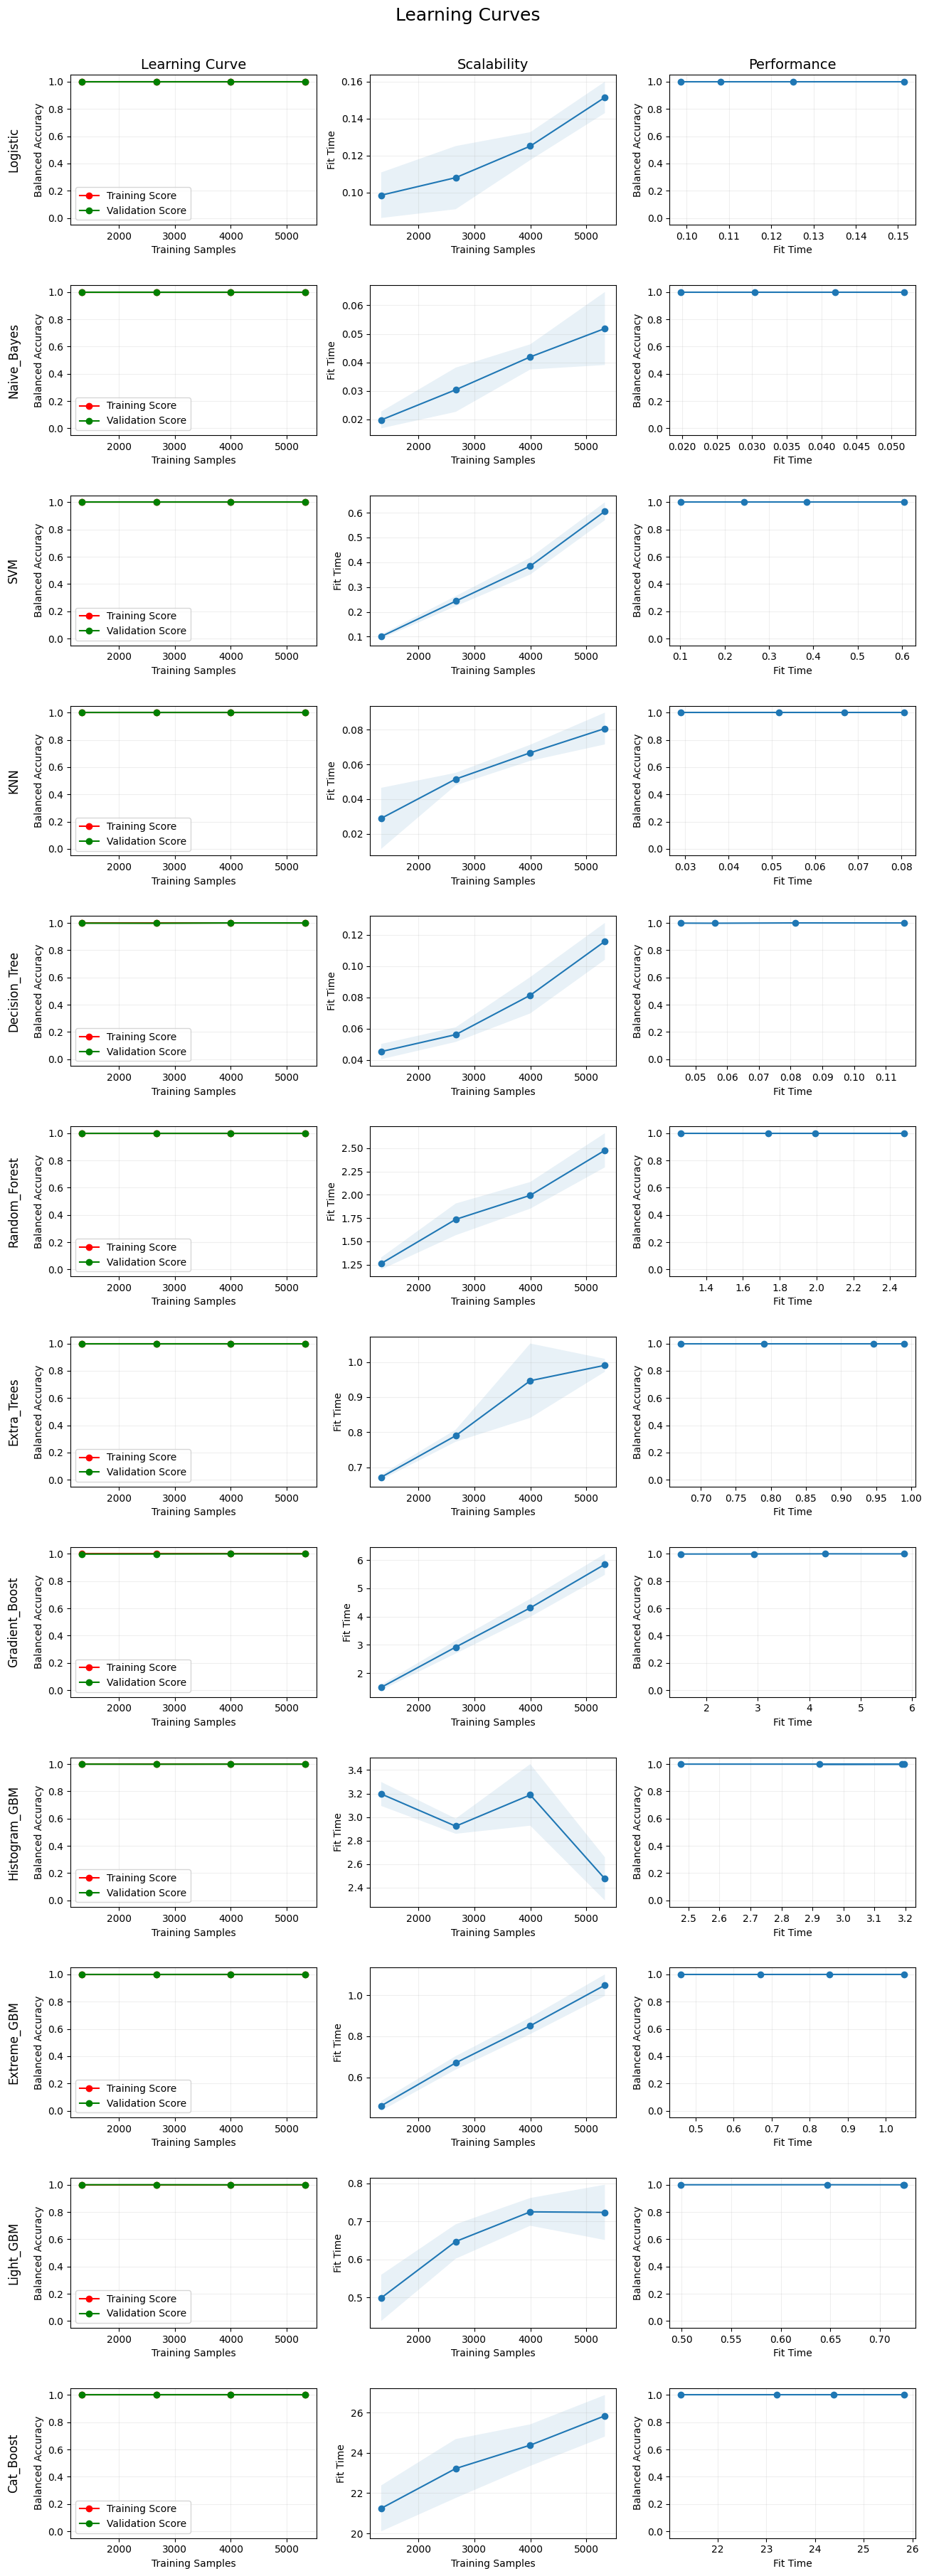

In [101]:
# learning curves
learn_curve(est_fit=models, 
            X_train=X_train, 
            y_train=y_train, 
            estimator_names=estimator_names)

For all the classifiers, both the training and cross-validation scores converge at very high values for all sample sizes.

This indicates that the same level of accuracy can be achieved for both small and large datasets.

Also, there is no bias or variance error with the models since they perform equally well on seen and unseen data.

### 6.2 Model Inspection and Visualization

In [102]:
from sklearn.inspection import permutation_importance
from matplotlib.ticker import MaxNLocator

#### 6.2.1 Inspection Plots

##### 6.2.1.1 Count Plot

In [103]:
# plot the count plots to compare the class counts of the models
def count_plot(y_data, which):
    # y_data: targets
    # which: data type to plot (one of 'validation' or 'test')

    y_data_long = y_data.melt(value_vars=list(y_data.columns))
    
    classes = y_data_long.value.unique()
    colors = cm.get_cmap('tab10').colors + cm.get_cmap('Dark2').colors
    
    #for i, color in zip(enumerate(y_data_long.columns), colors):
    cp = sns.catplot(kind='count', data=y_data_long, 
                     x='variable', row='value', 
                     height=3, aspect=4.25, 
                     sharex=False, sharey=False, 
                     palette=colors)
    
    for (i, ax), cls in zip(enumerate(cp.axes.flatten()), classes):
        ax.set_xticklabels(ax.get_xticklabels(), rotation='45', ha='right')
        ax.set_xlabel('Model', size=12)
        ax.set_ylabel('Count', size=12)
        ax.set_title(cls, size=14)
        ax.grid(alpha=0.2)

    plt.suptitle(y=1.005, t='Class Countplots ({} Set)'.format(which), ha='center', size=18)
    plt.tight_layout(h_pad=3.0)

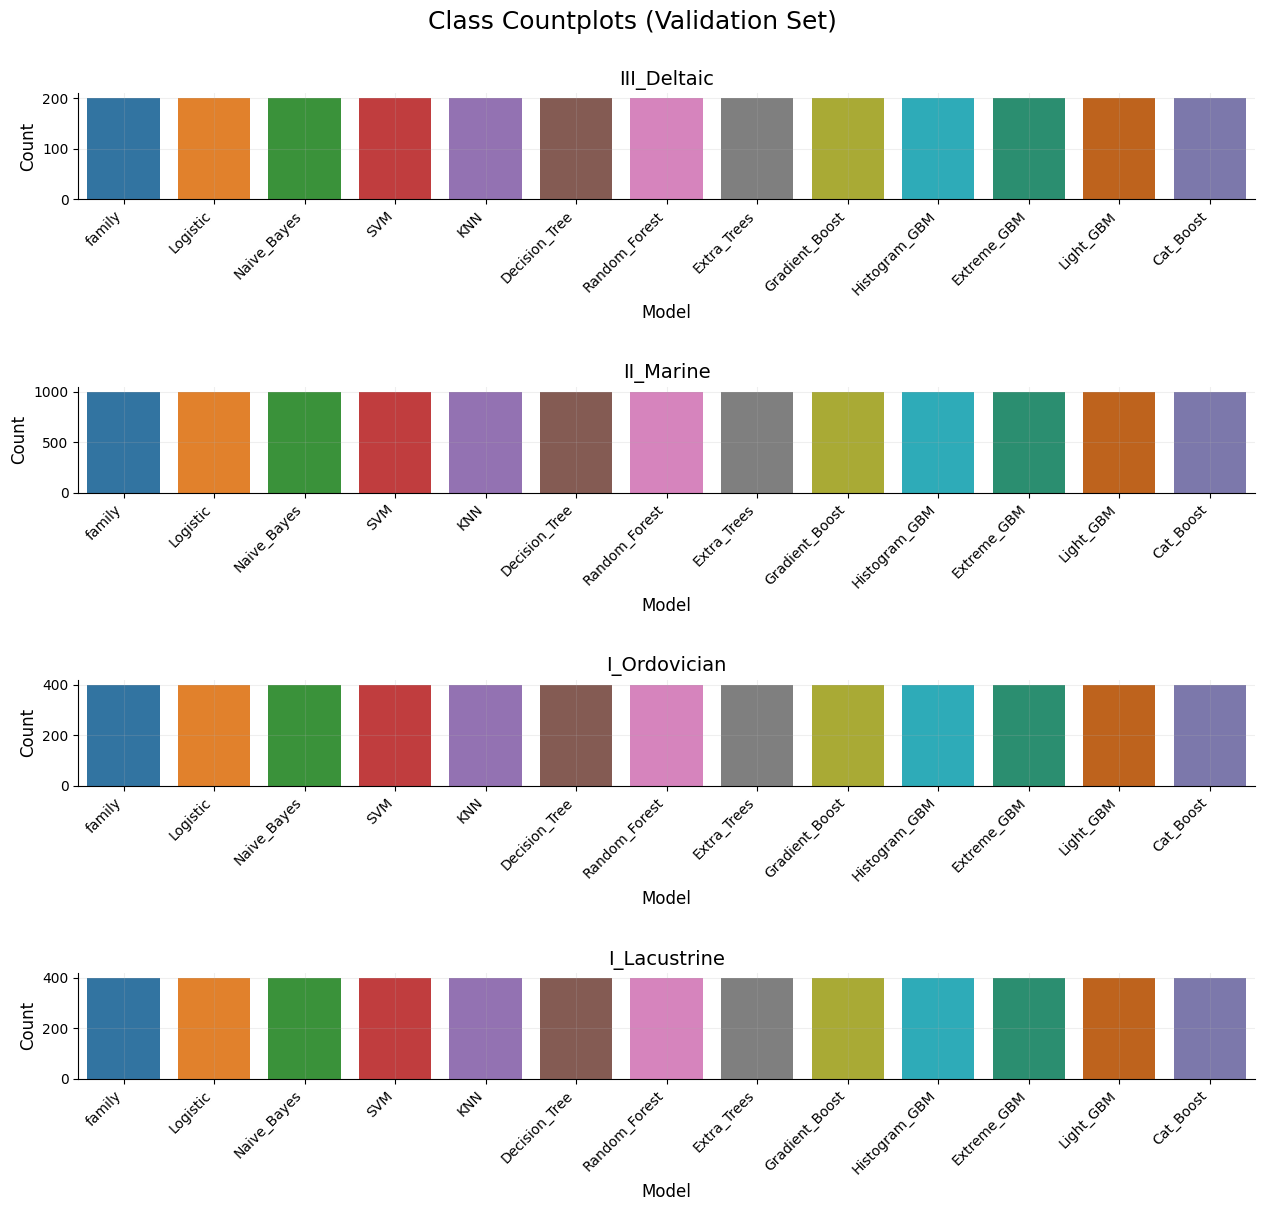

In [104]:
# count plots
count_plot(y_data=pd.concat([y_valid, y_pred], axis=1), 
           which='Validation')

The sample counts for all classes are correctly predicted by all models.

##### 6.2.1.2 Class Plot

In [105]:
# plot the comparison of the predicted data
def class_plot(y_data, which):
    # y_data: targets
    # which: data type to plot (one of 'validation' or 'test')
    
    y_data = y_data.sort_index()
    
    encoding = {'I_Ordovician': 0, 
                'I_Lacustrine': 1, 
                'II_Marine': 2, 
                'III_Deltaic': 3}
    y_data_enc = y_data.replace(encoding)
    y_data_enc = pd.DataFrame(y_data_enc, columns=y_data.columns, index=y_data.index)
    # OR
    #y_data_enc = y_data.copy()
    #for i in range(len(y_data_enc.columns)):
        #y_data_enc.iloc[:, i] = y_data.iloc[:, i].squeeze().map(encoding).to_frame()
      
    fig, axs = plt.subplots(figsize=(15, 7), ncols=y_data.shape[1], sharex=True, sharey=True)
    
    for (i, ax), key in zip(enumerate(fig.axes), y_data_enc.columns):
        X = y_data_enc[key].values.reshape(-1, 1)
        im = ax.imshow(X=X, 
                       cmap=cm.get_cmap('Accent_r', 4), 
                       aspect='auto', 
                       vmin=y_data_enc.min().min(), 
                       vmax=y_data_enc.max().max())
        
        ax.set_xticks([0])
        ax.set_xticklabels([])
        ax.set_xlabel(key, size=12, rotation='30', ha='right')
        if i == 0:
            ax.set_ylabel('Index', size=12)
        else:
            ax.set_ylabel(None)
        #ax.set_title(key, size=12, rotation='30')
        ax.grid(alpha=0.2)
        ax.invert_yaxis()
        
    labels = list(encoding.keys())
    #sm = plt.cm.ScalarMappable(cmap=cm.get_cmap('Accent_r', 4))
    cbar = plt.colorbar(mappable=im, 
                        label=targ, 
                        ticks=np.arange(0, len(labels)), 
                        boundaries=np.arange(0-0.5, len(labels)+0.5), 
                        ax=axs.ravel().tolist(), 
                        fraction=0.03, 
                        aspect=40, 
                        anchor=(2.5, 0.5))
    cbar.ax.set_yticklabels(labels, rotation='90', va='center')
    cbar.ax.set_ylabel(cbar.ax.get_ylabel(), size=12)

    plt.gca().invert_yaxis()
    plt.suptitle(y=0.95, t='Class Plots ({} Set)'.format(which), ha='center', size=18)
    plt.subplots_adjust(wspace=0.3)

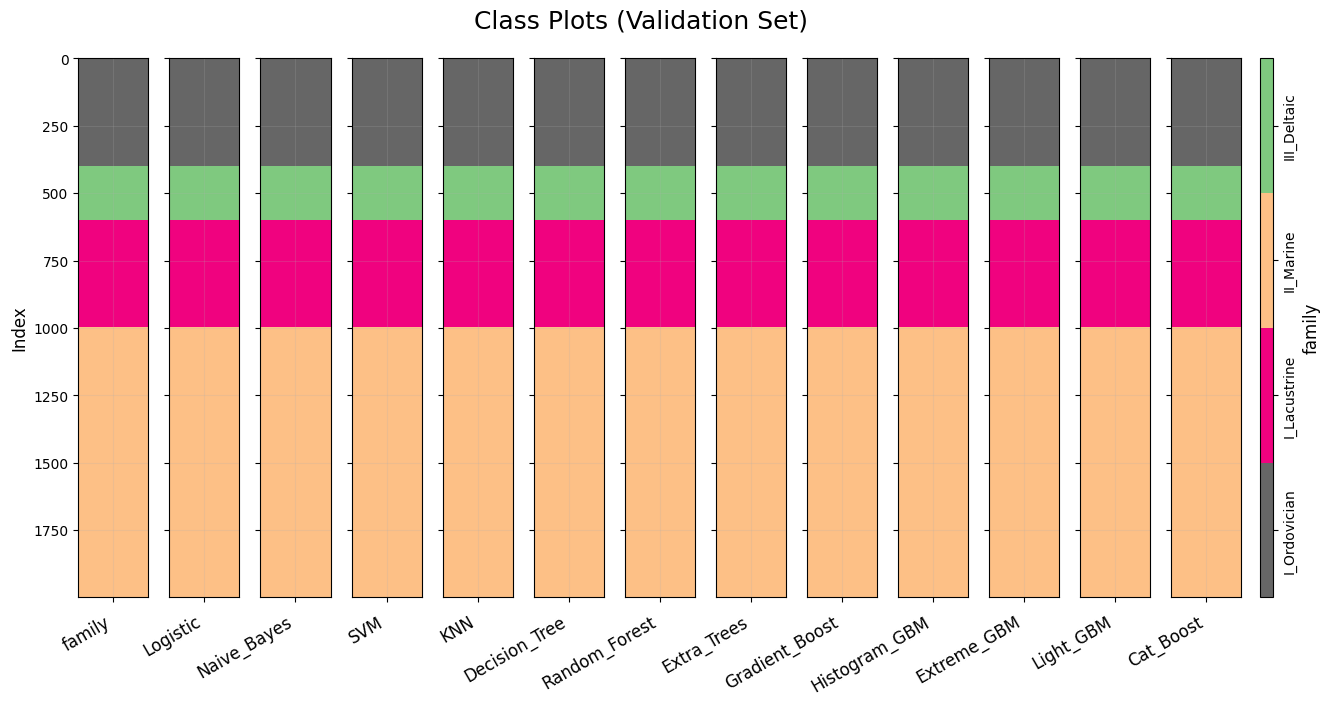

In [106]:
# class plots
class_plot(y_data=pd.concat([y_valid, y_pred], axis=1), 
           which='Validation')

The class predictions for all models are perfectly accurate.

##### 6.2.1.3 Embedding Plot

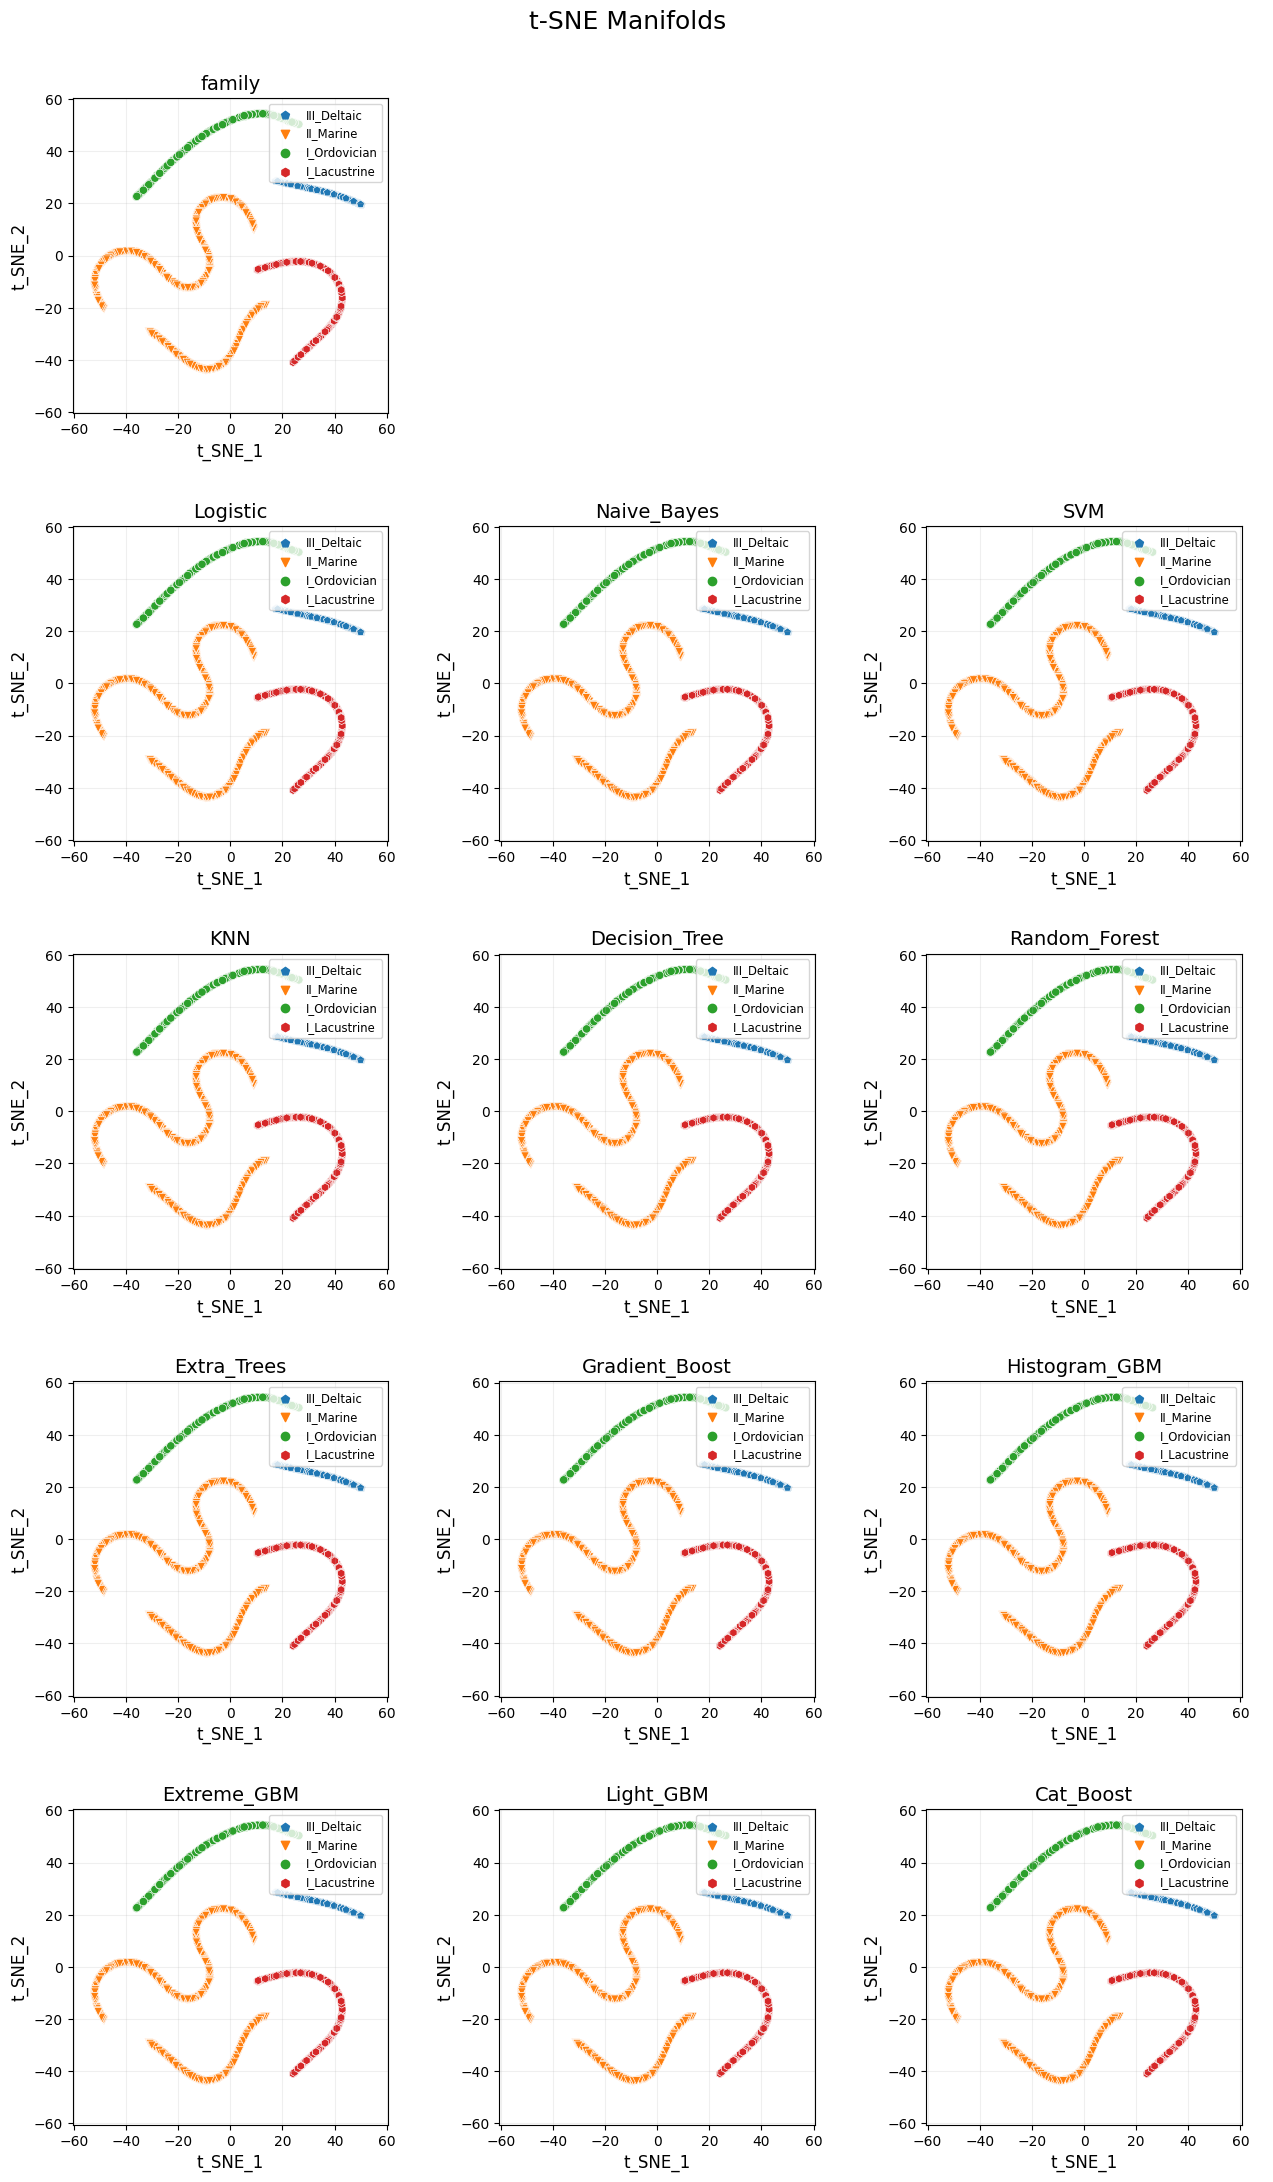

In [107]:
# plot the 2D t-SNE manifold
t_sne_plot(embedded_X=X_tsne_valid, 
           categories=pd.concat([y_valid, y_pred], axis=1), 
           which='both', 
           figsize=(13, 22), 
           nrows=5, 
           ncols=3)

The classes on the validation set are well separated on the t-SNE manifold with no overlap. 

The natural clusters are clearly homogenous and differentiable.

#### 6.2.2 Feature Importance

##### 6.2.2.1 Permutation Feature Importance (PFI)

Permutation Feature Imporatance (PFI) is a measure of the increase in predictive error of a model when a single feature is permuted (shuffled).

That is the order of values in a single feature column is randomly re-ordered while keeping all other feature columns and the target column intact.

Randomly shuffling a feature breaks the relationship between the feature and the target which allows an estimation of feature dependency.

A model is reliant on a feature if permuting the feature leads to a reduction in the model score or increase in error.

The feature is unimportant to the model if permuting it leaves the model score unchanged or better.

PFI can be applied to evaluate the importance of features to any fitted estimator, and so is flexible for model evaluation.

In [108]:
# create a function for obtaining the permutation feature importance scores for each method
def pfi_scores(est_fit, X_valid, y_valid, estimator_names):
    # est_fit: fitted estimators to be examined
    # X_valid: validation features
    # y_valid: validation target
    # estimator_names: list of estimators
    
    model_pfi = [est for est in est_fit]

    for i, est in enumerate(estimator_names):
        print()
        print('*******{} estimator PFI******* \n'.format(estimator_names[i]))
        start_time = time.time()

        model_pfi[i] = permutation_importance(estimator=est_fit[i], X=X_valid, y=y_valid, 
                                              scoring='balanced_accuracy', n_repeats=5, 
                                              random_state=1234, max_samples=1.0)

        end_time = time.time()
        print(f'Training time: {end_time - start_time} seconds')
        
    pfi_sorted_idx = [est for est in est_fit]
    pfi_mean = [est for est in est_fit]
    pfi_std = [est for est in est_fit]
    pfi_score = [est for est in est_fit]

    pfi_mean_df_lst = []
    pfi_score_df_lst = []

    for i in range(len(model_pfi)):
        pfi_sorted_idx[i] = model_pfi[i].importances_mean.argsort()[::-1]
        pfi_mean[i] = model_pfi[i].importances_mean[pfi_sorted_idx[i]]
        pfi_std[i] = model_pfi[i].importances_std[pfi_sorted_idx[i]]
        pfi_score[i] = model_pfi[i].importances[pfi_sorted_idx[i]].T

        pfi_mean_df_lst.append(pd.DataFrame(pfi_mean[i], 
                                            index=X_valid.columns[pfi_sorted_idx[i]], 
                                            columns=[estimator_names[i]]).T)
        pfi_score_df_lst.append(pd.DataFrame(pfi_score[i], 
                                             columns=X_valid.columns[pfi_sorted_idx[i]]))
        
    return pfi_mean_df_lst, pfi_std, pfi_score_df_lst

In [109]:
# permutaion feature importance
pfi_mean, pfi_std, pfi_score = pfi_scores(est_fit=models, 
                                          X_valid=X_valid, 
                                          y_valid=y_valid, 
                                          estimator_names=estimator_names)


*******Logistic estimator PFI******* 

Training time: 1.2601840496063232 seconds

*******Naive_Bayes estimator PFI******* 

Training time: 1.3862087726593018 seconds

*******SVM estimator PFI******* 

Training time: 3.35669207572937 seconds

*******KNN estimator PFI******* 

Training time: 21.125230073928833 seconds

*******Decision_Tree estimator PFI******* 

Training time: 1.3446505069732666 seconds

*******Random_Forest estimator PFI******* 

Training time: 9.244649410247803 seconds

*******Extra_Trees estimator PFI******* 

Training time: 10.20022988319397 seconds

*******Gradient_Boost estimator PFI******* 

Training time: 2.3129985332489014 seconds

*******Histogram_GBM estimator PFI******* 

Training time: 6.418294429779053 seconds

*******Extreme_GBM estimator PFI******* 

Training time: 3.6968963146209717 seconds

*******Light_GBM estimator PFI******* 

Training time: 4.217475652694702 seconds

*******Cat_Boost estimator PFI******* 

Training time: 2.021691083908081 seconds


In [110]:
# create a function for plotting the barplots of the permutation feature importance scores for each method
def pfi_barplot(mean, std, estimator_names):
    # mean: list of dataframes of mean scores
    # std: standard deviations
    # estimator_names: list of estimators
    
    # plot the barplot to compare the mean importance of the features
    fig, axs = plt.subplots(figsize=(13, 3*len(mean)), nrows=len(mean), sharey=False)
    
    colors = cm.get_cmap('tab10').colors + cm.get_cmap('Dark2').colors
    
    for (i, ax), est in zip(enumerate(fig.axes), estimator_names):
        sns.barplot(data=mean[i], yerr=std[i], orient='v', color=colors[1:][i], ax=ax)

        ax.set_xlabel('Feature', size=12)
        ax.set_ylabel('Mean Importance', size=12)
        ax.set_xticklabels(ax.get_xticklabels(), ha='right', rotation='60')
        #ax.set_yscale('log')
        ax.set_title(est, size=14)
        ax.grid(which='major', alpha=0.2)

    plt.suptitle(y=1.005, t='Permutation Feature Importance Barplots', size=18)
    plt.tight_layout(h_pad=3.0)

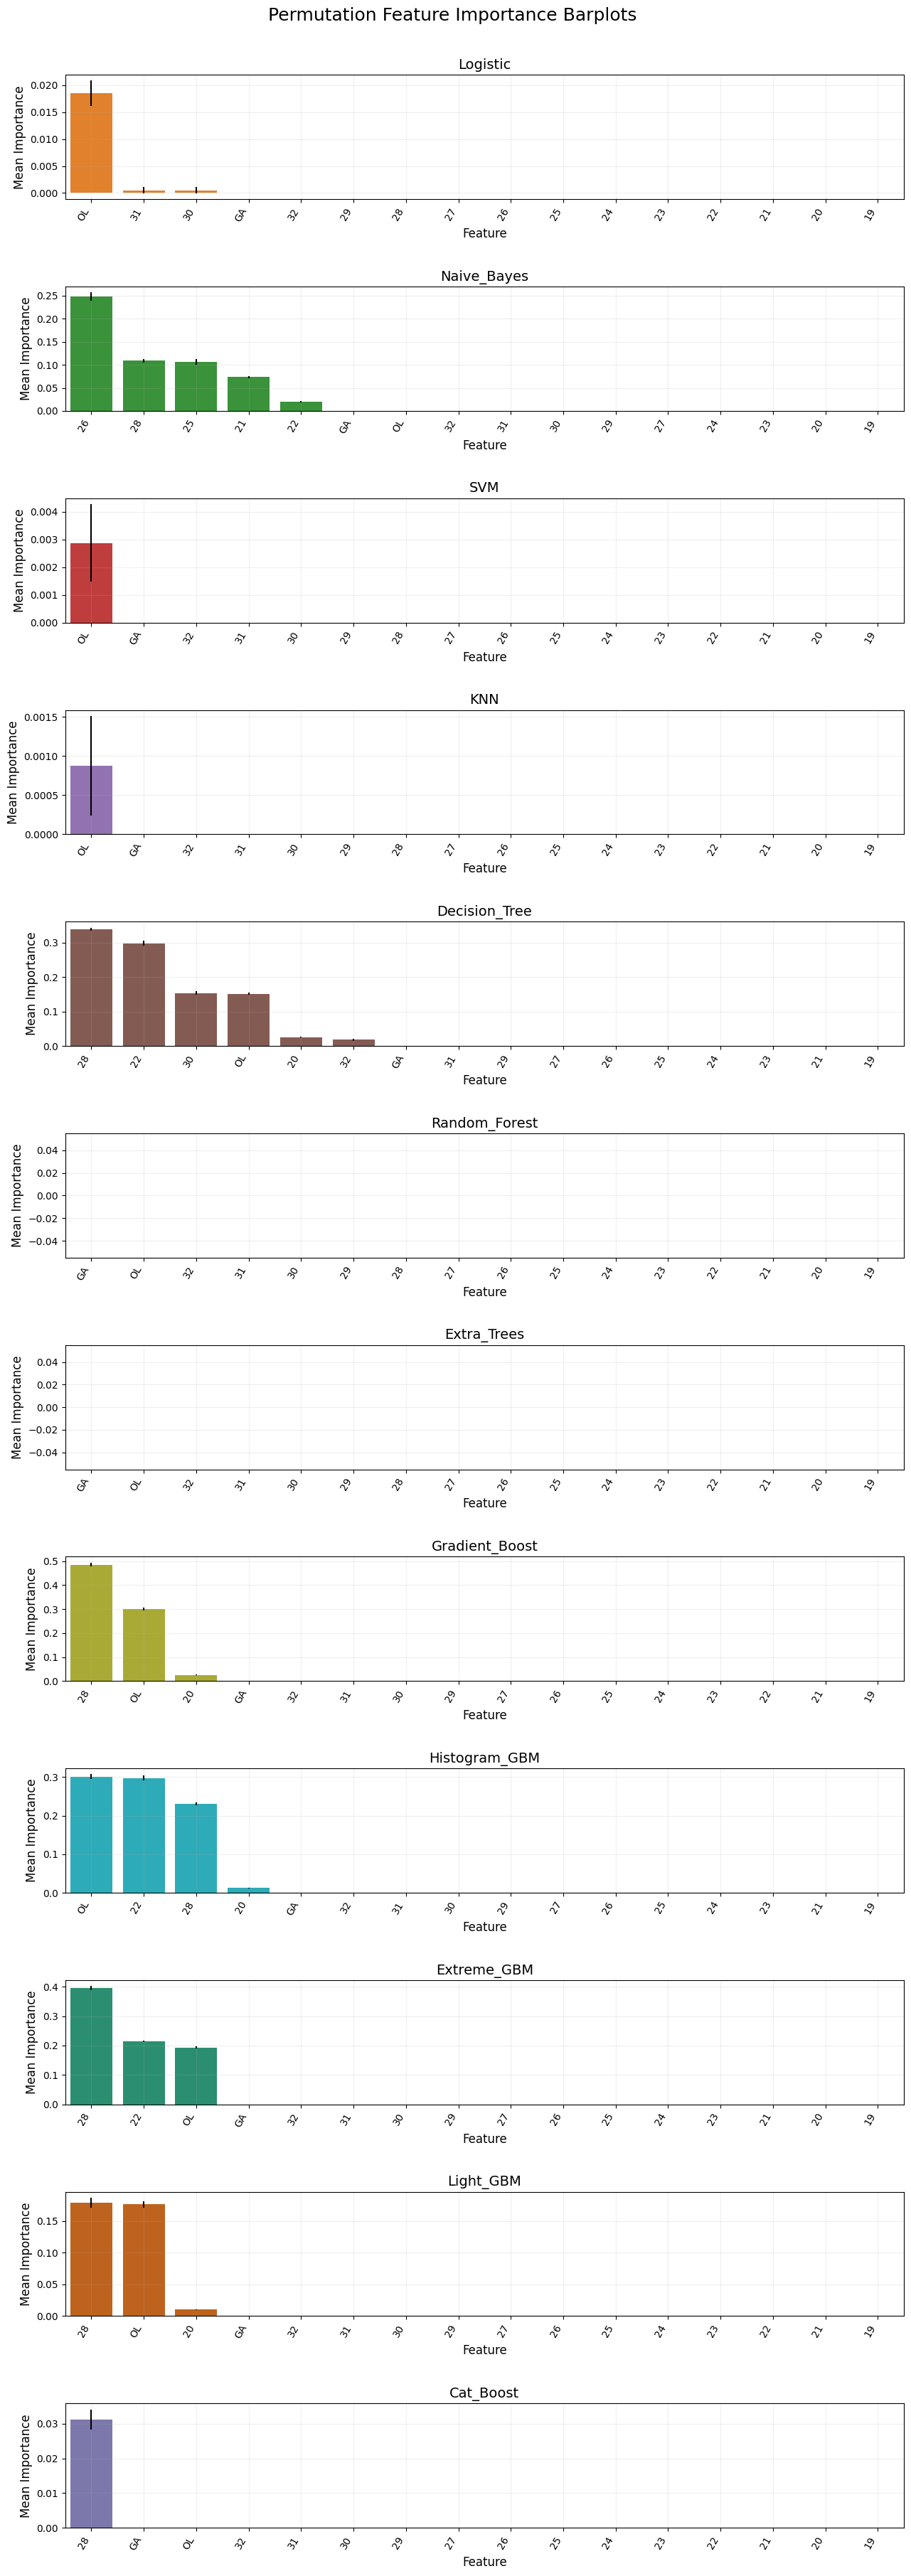

In [111]:
# pfi barplots
pfi_barplot(mean=pfi_mean, std=pfi_std, 
            estimator_names=estimator_names)

In [112]:
# create a function for plotting the boxplots of the permutation feature importance scores for each method
def pfi_boxplot(score, estimator_names):
    # score: list of dataframes of all scores
    # estimator_names: list of estimators

    # plot the boxplot to compare the spread and centers of the importance of the features
    fig, axs = plt.subplots(figsize=(13, 3*len(score)), nrows=len(score), sharey=False)
    
    colors = cm.get_cmap('tab10').colors + cm.get_cmap('Dark2').colors
    
    for (i, ax), est in zip(enumerate(fig.axes), estimator_names):
        sns.boxplot(data=score[i], orient='v', color=colors[1:][i], ax=ax)

        ax.set_xlabel('Feature', size=12)
        ax.set_ylabel('Importance', size=12)
        ax.set_xticklabels(ax.get_xticklabels(), ha='right', rotation='60')
        #ax.set_yscale('log')
        ax.set_title(est, size=14)
        ax.grid(which='major', alpha=0.2)

    plt.suptitle(y=1.005,  t='Permutation Feature Importance Boxplots', size=18)
    plt.tight_layout(h_pad=3.0)

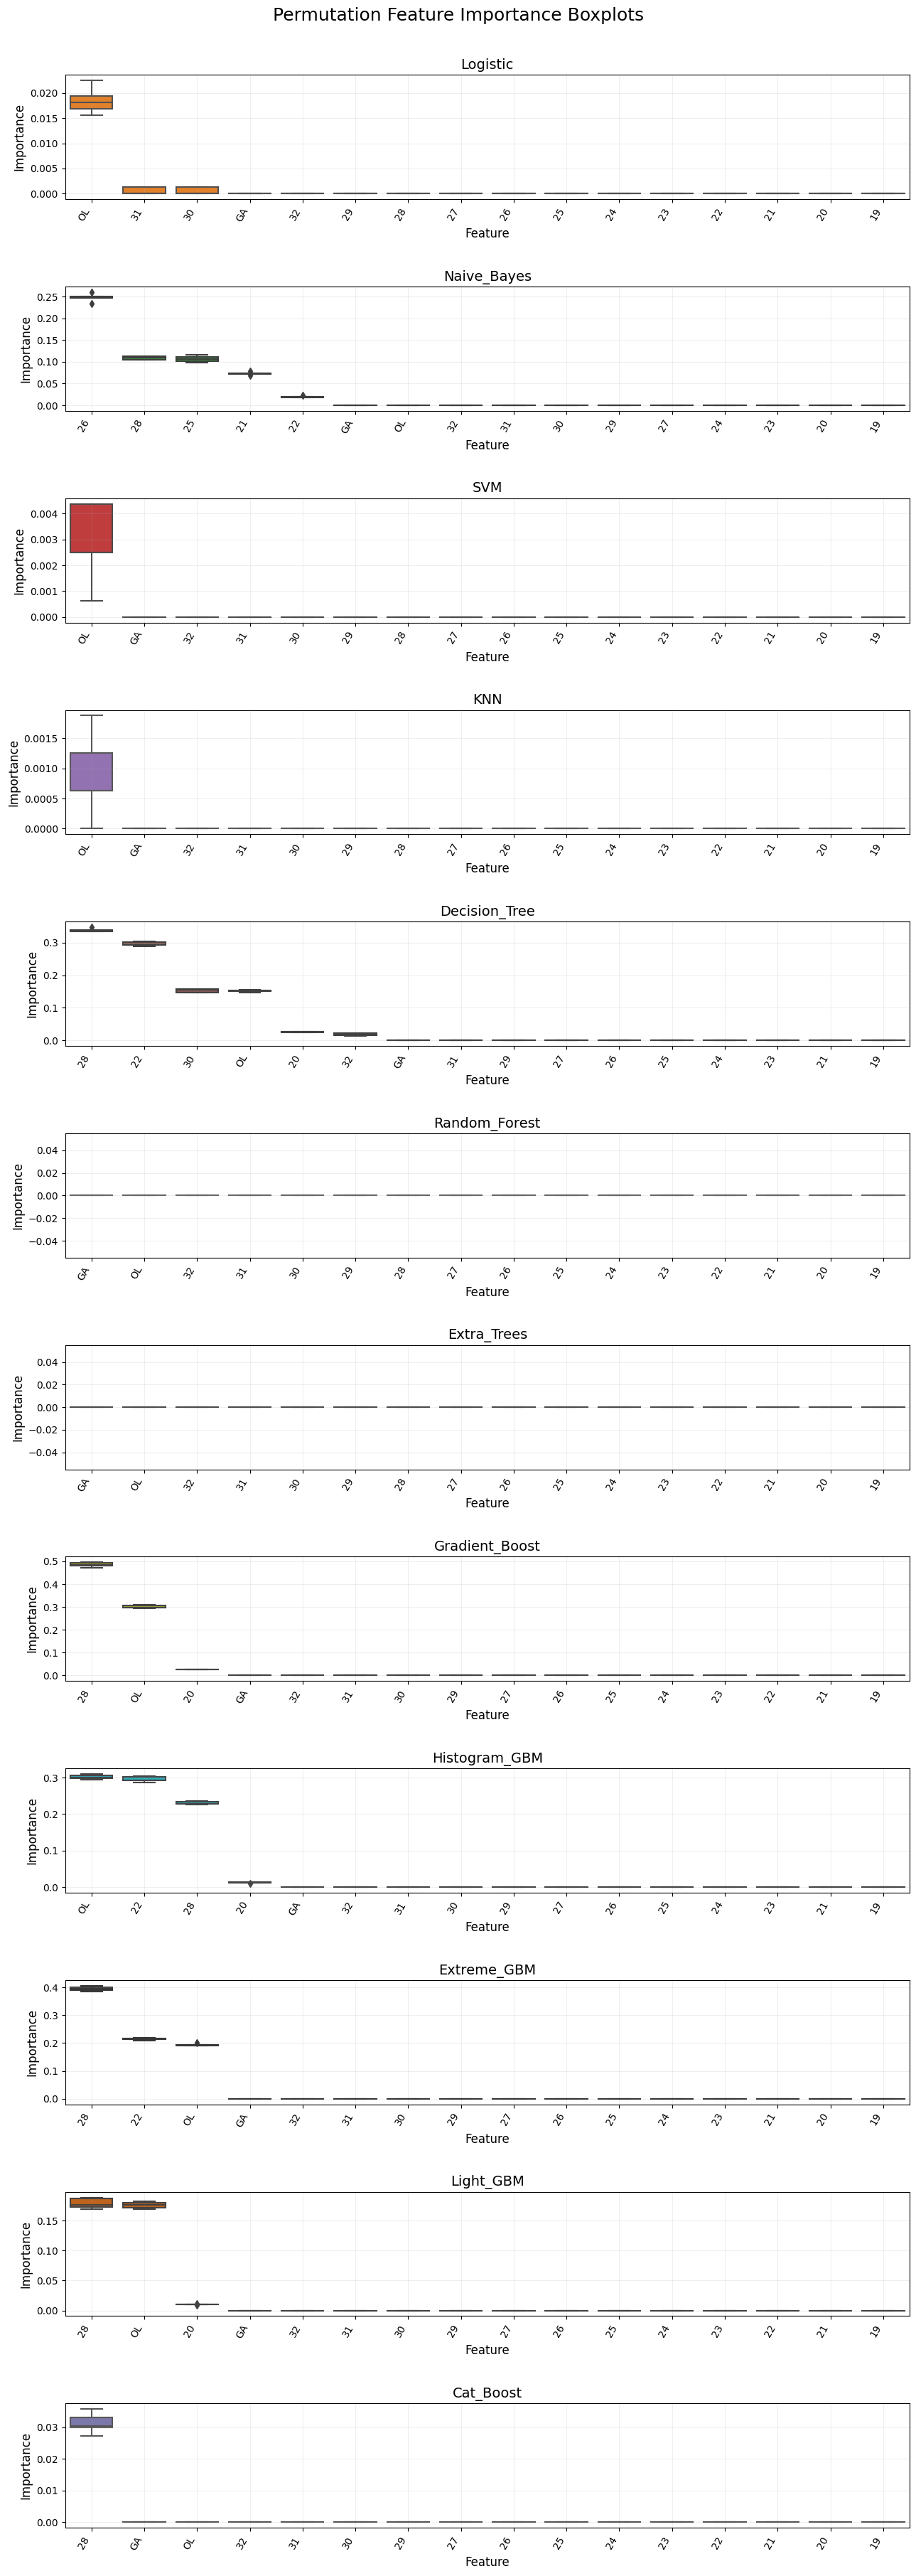

In [113]:
# pfi boxplots
pfi_boxplot(score=pfi_score, 
            estimator_names=estimator_names)

Only a few features are important to most of the estimators indicated by the very low mean importance values for most features.

Some features have negative importance, meaning by random chance, shuffled (noisy) data performed better than the original (ordered) data.

All features for the Random Forest and Extra Trees models have zero importance, meaning that permuting any of the features has no effect on the model performance.

The two cases mentioned above may be due to the manner in which the dataset was generated i.e. by random sampling.

The full chromatogarph of each sample is not neccesary for classifying the oil families.

The estimators may be able to differentiate the classes without seeing some of the hydrocarbon peaks.

## 7. Test Submission

### 7.1 Model Prediction

In [114]:
# model predictions
y_pred_test = model_pred(X_data=X_test, 
                         est_fit=models, 
                         estimator_names=estimator_names)


*******Logistic Estimator Prediction*******
Predicting time: 0.006010532379150391 seconds

*******Naive_Bayes Estimator Prediction*******
Predicting time: 0.005984067916870117 seconds

*******SVM Estimator Prediction*******
Predicting time: 0.007950544357299805 seconds

*******KNN Estimator Prediction*******
Predicting time: 0.0255887508392334 seconds

*******Decision_Tree Estimator Prediction*******
Predicting time: 0.009972095489501953 seconds

*******Random_Forest Estimator Prediction*******
Predicting time: 0.09793925285339355 seconds

*******Extra_Trees Estimator Prediction*******
Predicting time: 0.07062101364135742 seconds

*******Gradient_Boost Estimator Prediction*******
Predicting time: 0.006613492965698242 seconds

*******Histogram_GBM Estimator Prediction*******
Predicting time: 0.03379368782043457 seconds

*******Extreme_GBM Estimator Prediction*******
Predicting time: 0.0219419002532959 seconds

*******Light_GBM Estimator Prediction*******
Predicting time: 0.002615213394

In [115]:
y_pred_test.head()

Logistic   Naive_Bayes           SVM           KNN Decision_Tree  \
Sample                                                                         
0          II_Marine     II_Marine     II_Marine     II_Marine  I_Lacustrine   
1          II_Marine     II_Marine     II_Marine     II_Marine     II_Marine   
2          II_Marine     II_Marine     II_Marine     II_Marine     II_Marine   
3       I_Lacustrine  I_Lacustrine  I_Lacustrine  I_Lacustrine  I_Lacustrine   
4          II_Marine     II_Marine     II_Marine     II_Marine     II_Marine   

       Random_Forest   Extra_Trees Gradient_Boost Histogram_GBM   Extreme_GBM  \
Sample                                                                          
0          II_Marine     II_Marine      II_Marine  I_Lacustrine     II_Marine   
1          II_Marine     II_Marine      II_Marine     II_Marine     II_Marine   
2          II_Marine     II_Marine      II_Marine     II_Marine     II_Marine   
3       I_Lacustrine  I_Lacustrine   I_Lacustrine  I_Lacustrine  I_Lacustrine   
4          II_Marine     II_Marine      II_Marine     II_Marine     II_Marine   

           Light_GBM     Cat_Boost  
Sample                              
0          II_Marine     II_Marine  
1          II_Marine     II_Marine  
2          II_Marine     II_Marine  
3       I_Lacustrine  I_Lacustrine  
4          II_Marine     II_Marine

### 7.2 Inpection Plots

#### 7.2.1 Count Plot

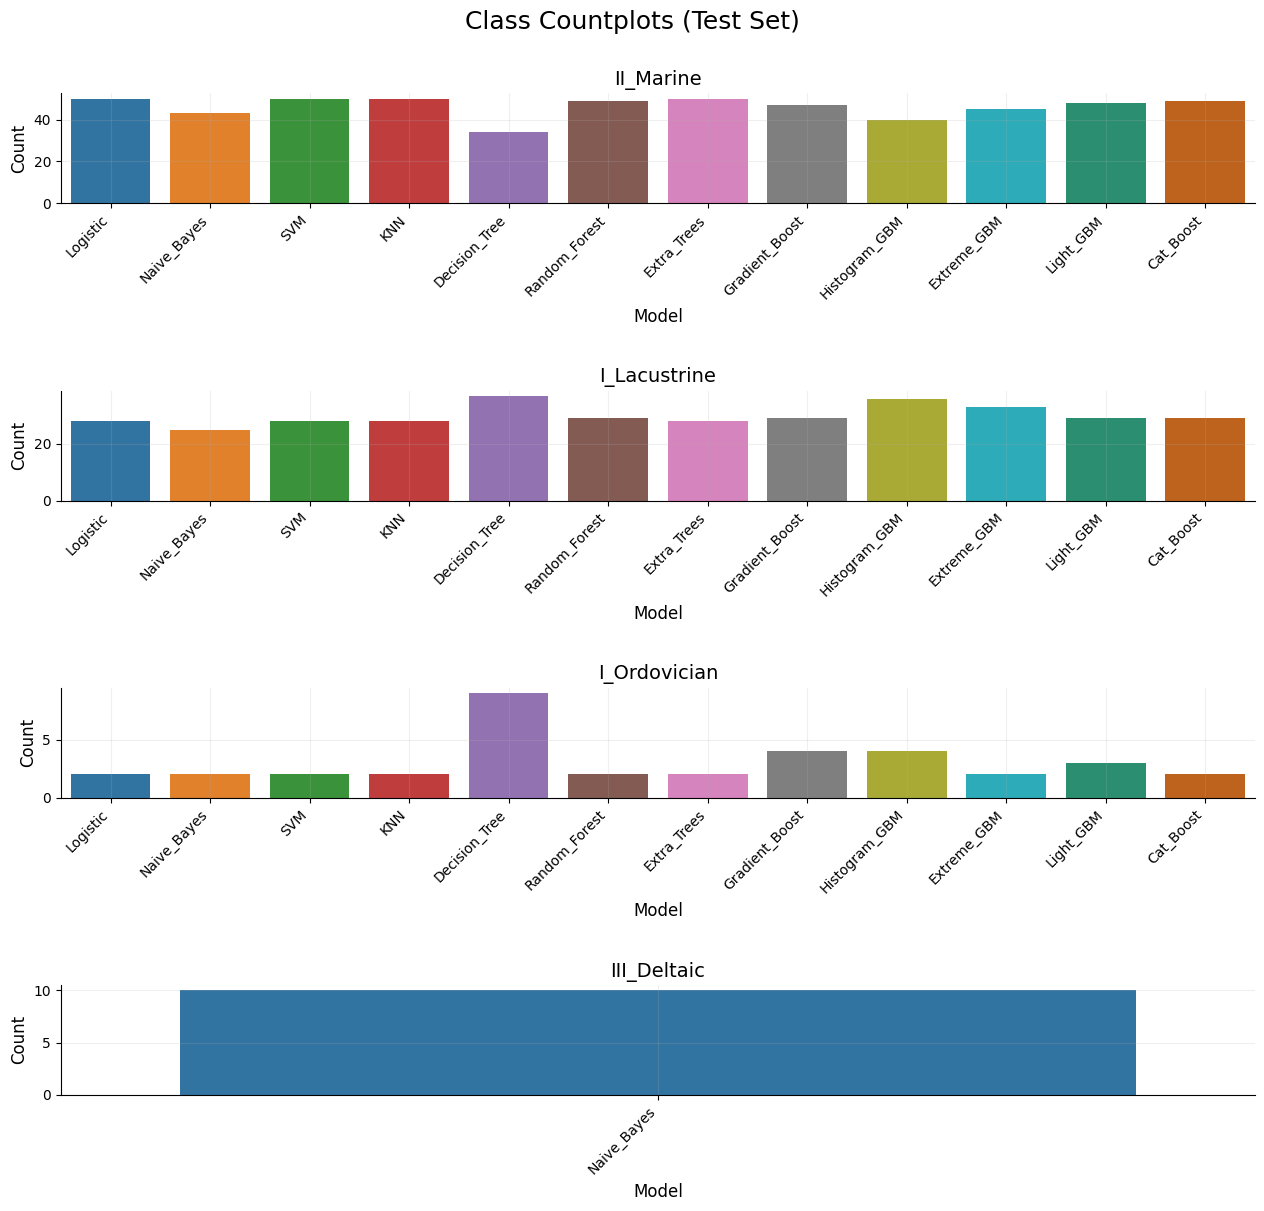

In [116]:
# count plots
count_plot(y_data=y_pred_test, 
           which='Test')

Most models show some agreement in the volume of samples assigned to each class, with the exception of the Decision Tree model which predicts fewer class II_Marine, more class I_Lacustrine, and even much more class I_Ordovician than the rest of the models.

The Histogram GBM shows a similar pattern to the Decision Tree model but with a lesser extent of deviation from trend.

The Naive Bayes is the only model which predicted some samples to be class III_Deltaic, which indicates low confidence in the presence of this class on the test set.

#### 7.2.2 Class Plot

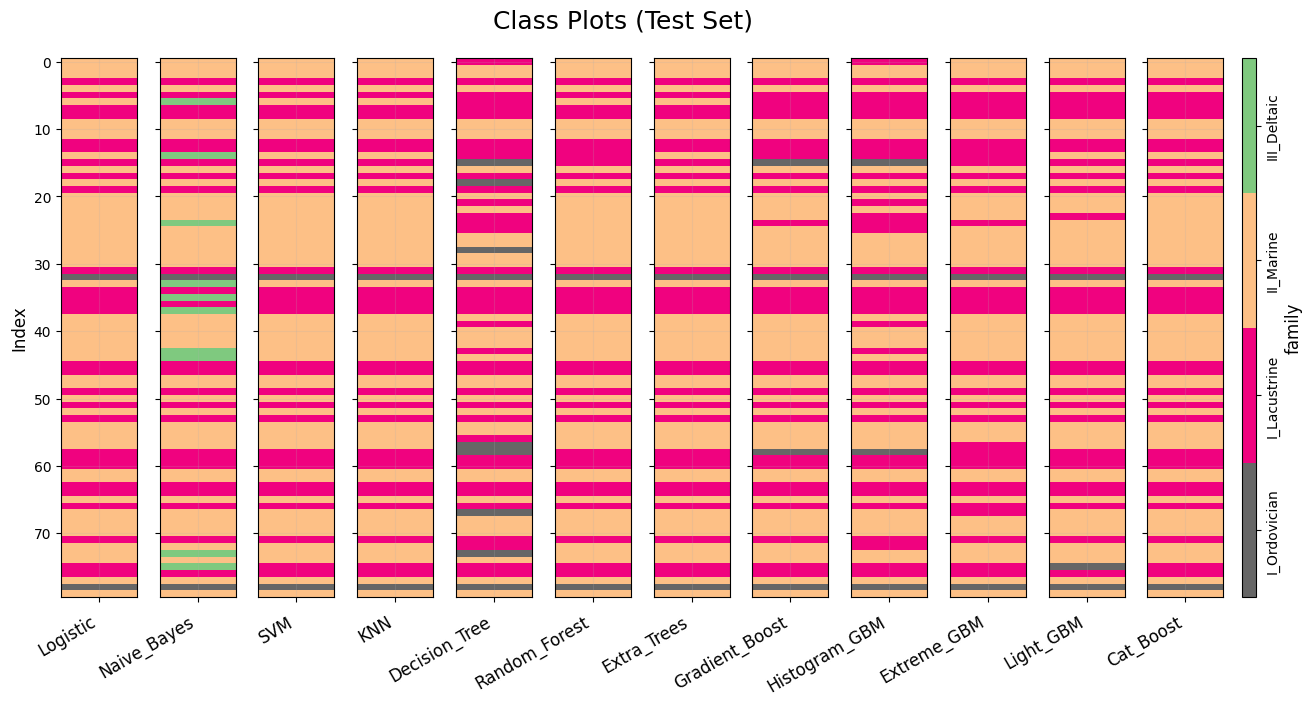

In [117]:
# class plots
class_plot(y_data=y_pred_test, 
           which='Test')

There is much similarity in the classes predicted by the various models.

However, the Naive Bayes, Decision Tree, and Histogram GBM models show some notable differences.

#### 7.2.3 Embedding Plot

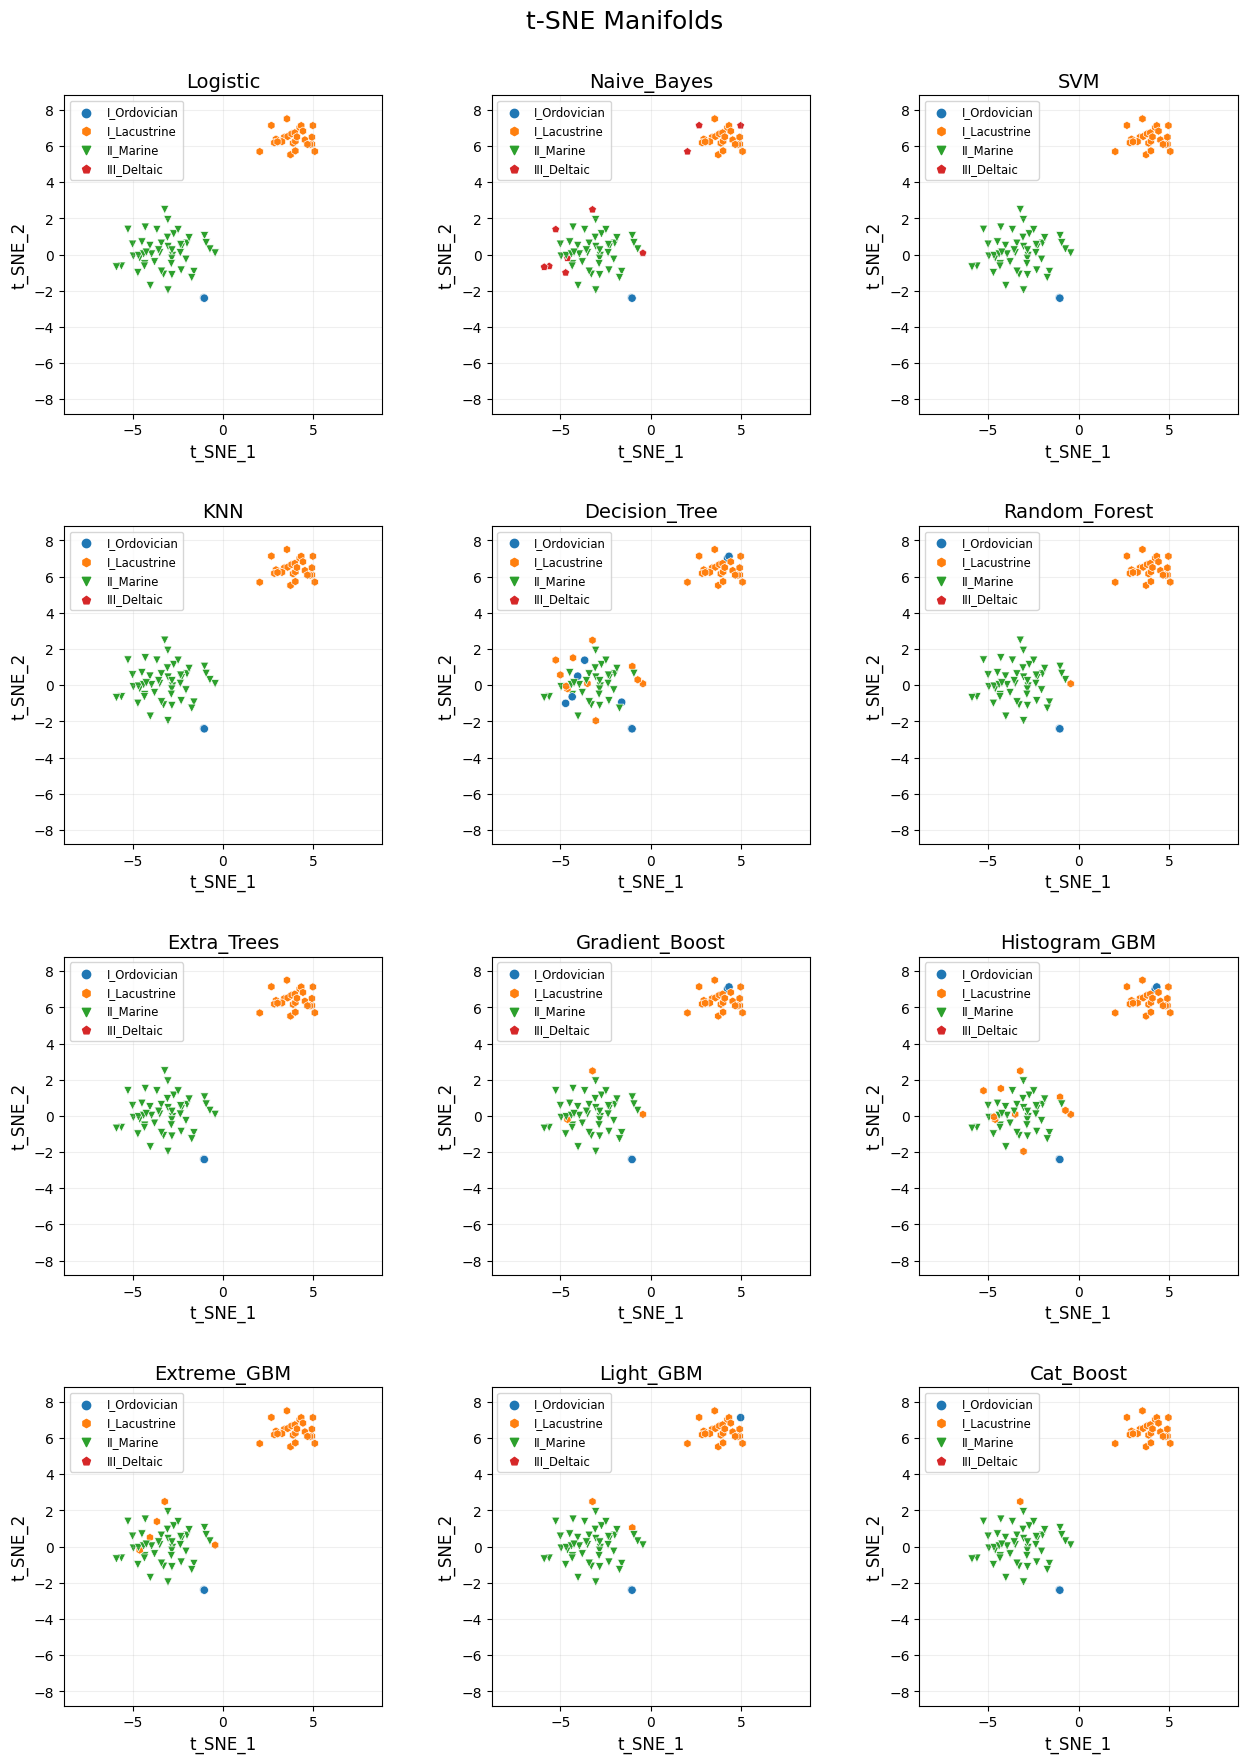

In [118]:
# plot the 2D t-SNE manifold
t_sne_plot(embedded_X=X_tsne_test, 
           categories=y_pred_test, 
           which='predicted', 
           figsize=(13, 17.5), 
           nrows=4, 
           ncols=3)

Some of the models (Logistic, SVM, KNN, and Extra Trees) show homogenous natural clusters revealed by the embedding. 

The remaining models are non-unique in the cluster space for class II_Marine and I_Lacustrine.

### 7.3 Final Vote

In [119]:
# create a function for obtaining the voted classes using high performing estimators
def voted_classes(y_pred, val_scores):
    # y_pred: prediction targets
    # val_scores: accuracy scores of the models on the validation set (list)

    model_idx = np.where(np.array(val_scores) >= 0.9)[0]
    y_slice = y_pred.iloc[:, model_idx]
    y_vote = pd.DataFrame([], index=y_pred.index, columns=[targ])
    
    multi_idx = []

    for i in range(len(y_slice.T.columns)):
        # obtain the class with the highest count for each sample
        class_counts = y_slice.T.iloc[:, [i]].value_counts()
        y_vote.iloc[i] = class_counts[[0]].index[0][0]

        # return indices where more than one class has the highest count
        if len(class_counts)>1 and class_counts[[0]].values[0] == class_counts[[1]].values[0]:
            multi_idx.append(i)
            
    return y_vote, multi_idx

In [120]:
# obtain the voted classes excluding the estimators with the lowest confidence
y_pred_test_vote, multi_idx = voted_classes(y_pred=y_pred_test.drop(['Naive_Bayes', 'Decision_Tree', 'Histogram_GBM'], axis=1), 
                                            val_scores=np.delete(np.array(scores), [1, 4, 8]))

In [121]:
y_pred_test_vote.head()

family
Sample              
0          II_Marine
1          II_Marine
2          II_Marine
3       I_Lacustrine
4          II_Marine

In [122]:
# view indices where more than one class has the highest count
print('Tied Vote Indices: {}'.format(multi_idx))

Tied Vote Indices: []


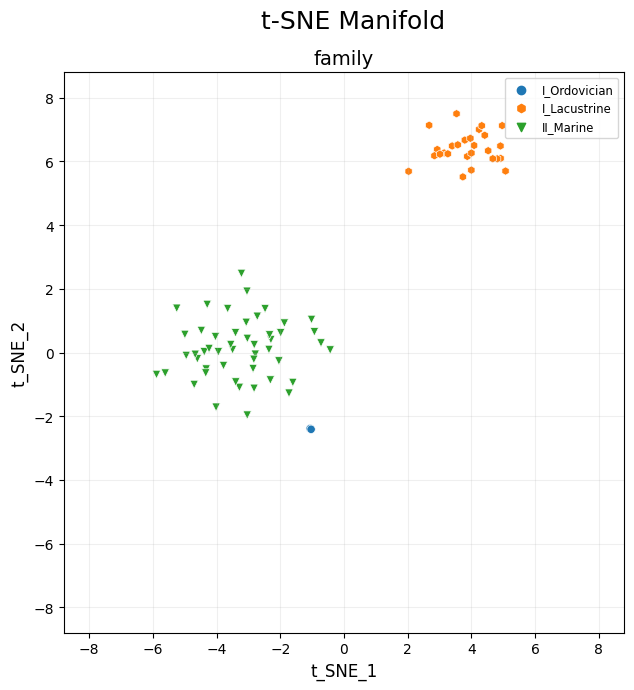

In [123]:
# plot the 2D t-SNE manifold
t_sne_plot(embedded_X=X_tsne_test, 
           categories=y_pred_test_vote, 
           which='true', 
           figsize=(7, 7), 
           nrows=1, 
           ncols=1)

By applying the majority vote rule to the predictions from all the trained models, the voted prediction shows good seperation of the classes on the t-sne manifold.

Voting leverages the strengths of the individual estimators while balancing out their weakness, which is responsible for the homogenous clusters observed. 

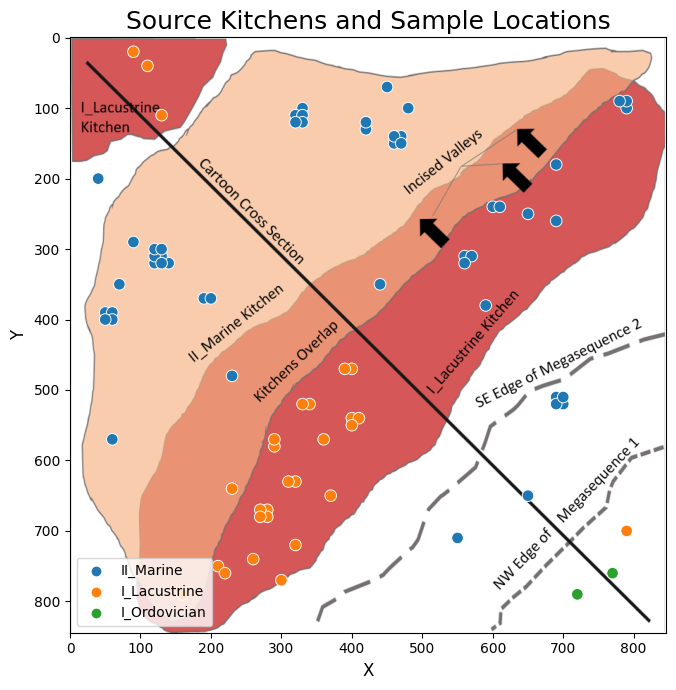

In [124]:
# plot the basemap with sample locations per class
base_map(image=kitchens, 
         data=source, 
         categories=y_pred_test_vote)

The spatial distribution of the predicted oil families shows excellent consistency with the extents of the pseudo-source kitchens.

The only anomaly observed is the presnece of a single class I_Lacustrine sample in what should be the class I_ordovician source kitchen.

Overall, the source families are clustered in a geologically meaningful manner.

## Conclusion

This notebook covered a case demonstration of the application of machine learning to petroleum geochemistry. In this case, the task was to classify oil chromatograph samples into different source kitchen families in the Pluto pseudo-basin. 

To achieve this, several data analytical methods were employed to prepare the dataset for machine learning analysis. Machine learning anomaly detection was used to identify and filter outliers. Iterative machine learning imputation was used to fill data gaps. Synthetic samples were generated by random sampling normal distributions. Feature scales were equalized using min-max normalization to a specified range. Finally, manifold learning was used for feature embedding and dimensionality reduction.

The processed data was employed for multi-class classification using various generic and ensemble algorithms. Classification metrics including the confusion matrix, several metric scores, the receiver operating characteristic, and learning curves were then used in evaluating the performance of these models. The notebook also covers various visualizations and comparisons of the predicted outputs. Futhermore, Permutation feature imporatance was used in evaluating the importance of the input features to the models.

The evaluated models were used in predicting classes on the test dataset, and the final classes were obtained by a majority vote count of predictions of high performing estimators. In this way, the classes assigned to each sample were does predicted with high confidence by the multi-model classification. To visually evaluate the prediction accuracy, the class predictions were plotted on a base map of the source kitchens at the sample locations. The predictions showed clear spatial clustering consistent with the geological concept of source rock distribution.

In sum, machine learning has been used to automate the mundane task of oil chromatograph labeling. Such approach may be deployed for real-life geochemical analysis, ultimately aiding the subsurface scientist in rapid and accurate evaluation of source potential. 